In [40]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

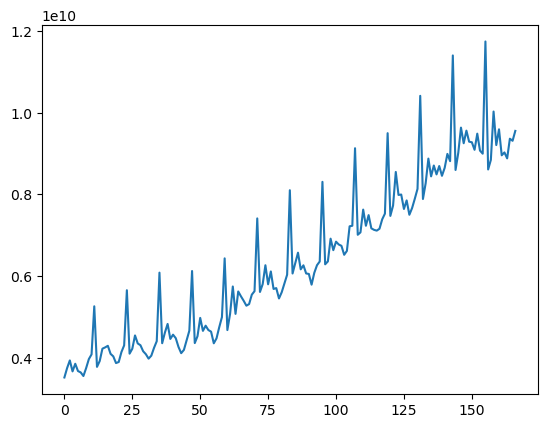

In [41]:
# numpyを使う
series = np.loadtxt("../public/seijyo_ishii_monthly_sales_without_header.csv")
plt.plot(series)
plt.show()

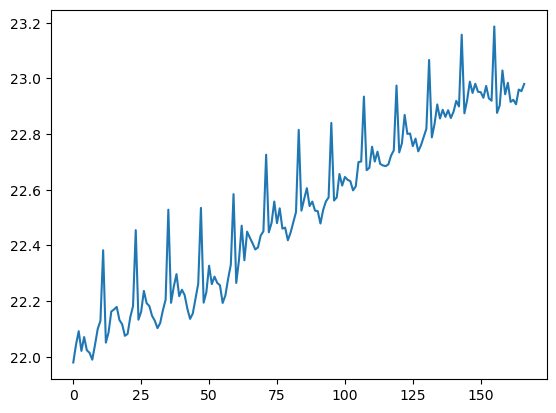

In [42]:
# 対数変換をとる
data = np.loadtxt("../public/seijyo_ishii_monthly_sales_without_header.csv")
series = np.log(data)
plt.plot(series)
plt.show()

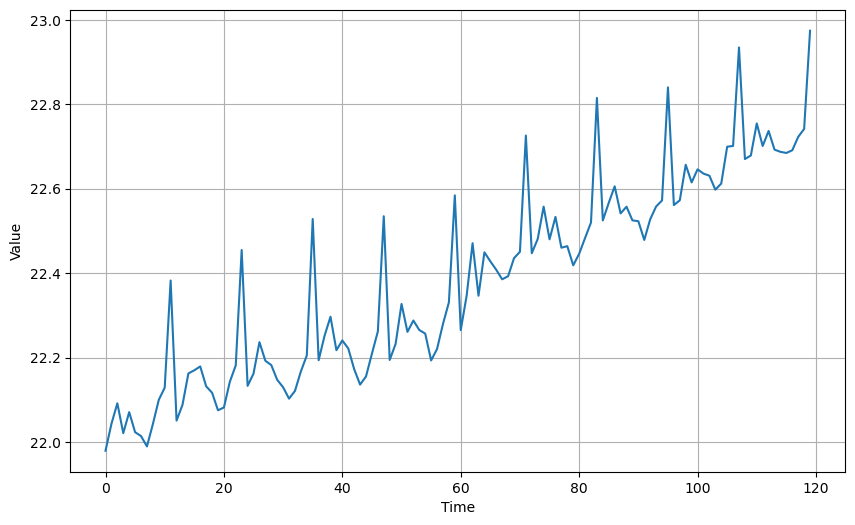

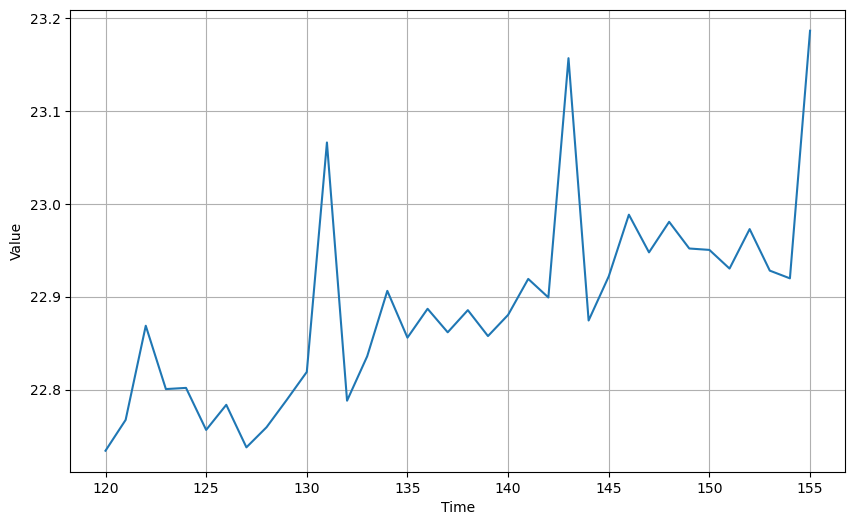

In [43]:
# 前半120時点を学習データ、以降を検証データとして分割

split_time = 120
time = np.arange(156, dtype="float32")    # 2022年12月のデータが取得できれば、168に変更

time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:156]
x_valid = series[split_time:156]

window_size = 20
batch_size = 32
shuffle_buffer_size = 1000

def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

plt.figure(figsize=(10, 6))
plot_series(time_train, x_train) # 学習セット
plt.show()

plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid) # 検証セット
plt.show()

In [44]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
  dataset = tf.data.Dataset.from_tensor_slices(series)
  dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
  dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
  dataset = dataset.shuffle(shuffle_buffer).map(lambda window: (window[:-1], window[-1]))
  dataset = dataset.batch(batch_size).prefetch(1)
  return dataset

In [45]:
# これは2つのDense層を持つモデル。
# 最初の層はwindow_size形状の入力を受け入れ、予測値をもつ出力層が続く。

dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)


model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, input_shape=[window_size], activation="relu"), 
    tf.keras.layers.Dense(10, activation="relu"), 
    tf.keras.layers.Dense(1)
])

model.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(lr=1e-6, momentum=0.9))
model.fit(dataset,epochs=5000,verbose=1)

Epoch 1/5000


/Users/nishiyamashoutou/opt/anaconda3/envs/grad_project/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


4/4 [==============================] - 0s 13ms/step - loss: 656.4366
Epoch 2/5000
4/4 [==============================] - 0s 2ms/step - loss: 349.6466
Epoch 3/5000
4/4 [==============================] - 0s 4ms/step - loss: 205.4545
Epoch 4/5000
4/4 [==============================] - 0s 4ms/step - loss: 157.0675
Epoch 5/5000
4/4 [==============================] - 0s 4ms/step - loss: 108.5436
Epoch 6/5000
4/4 [==============================] - 0s 2ms/step - loss: 65.7609
Epoch 7/5000
4/4 [==============================] - 0s 4ms/step - loss: 32.9970
Epoch 8/5000
4/4 [==============================] - 0s 2ms/step - loss: 12.2342
Epoch 9/5000
4/4 [==============================] - 0s 3ms/step - loss: 2.3658
Epoch 10/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.1012
Epoch 11/5000
4/4 [==============================] - 0s 3ms/step - loss: 1.2263
Epoch 12/5000
4/4 [==============================] - 0s 4ms/step - loss: 2.6326
Epoch 13/5000
4/4 [=============================

4/4 [==============================] - 0s 3ms/step - loss: 0.0124
Epoch 104/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0124
Epoch 105/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0124
Epoch 106/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0124
Epoch 107/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 108/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.0124
Epoch 109/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0125
Epoch 110/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0125
Epoch 111/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 112/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 113/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 114/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 115/5000
4/4 [=======================

4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 205/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 206/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0124
Epoch 207/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 208/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0124
Epoch 209/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0124
Epoch 210/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0125
Epoch 211/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0124
Epoch 212/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 213/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 214/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0124
Epoch 215/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 216/5000
4/4 [=======================

4/4 [==============================] - 0s 3ms/step - loss: 0.0125
Epoch 306/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 307/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 308/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0124
Epoch 309/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0124
Epoch 310/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0124
Epoch 311/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0124
Epoch 312/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 313/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0124
Epoch 314/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 315/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 316/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 317/5000
4/4 [=======================

4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 407/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 408/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 409/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 410/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0124
Epoch 411/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0124
Epoch 412/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0124
Epoch 413/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0124
Epoch 414/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0124
Epoch 415/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0124
Epoch 416/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 417/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 418/5000
4/4 [=======================

4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 508/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0125
Epoch 509/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0125
Epoch 510/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0125
Epoch 511/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0124
Epoch 512/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 513/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 514/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 515/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 516/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 517/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 518/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0124
Epoch 519/5000
4/4 [=======================

4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 609/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0124
Epoch 610/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0124
Epoch 611/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 612/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 613/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 614/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 615/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0124
Epoch 616/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 617/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 618/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 619/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 620/5000
4/4 [=======================

4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 710/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 711/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0124
Epoch 712/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 713/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 714/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0124
Epoch 715/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 716/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 717/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 718/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0124
Epoch 719/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0124
Epoch 720/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 721/5000
4/4 [=======================

4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 811/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 812/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 813/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0124
Epoch 814/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 815/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 816/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 817/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0124
Epoch 818/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 819/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 820/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0124
Epoch 821/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0124
Epoch 822/5000
4/4 [=======================

4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 912/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 913/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 914/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0124
Epoch 915/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0124
Epoch 916/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 917/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 918/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 919/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 920/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 921/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 922/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 923/5000
4/4 [=======================

4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 1013/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 1014/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0124
Epoch 1015/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 1016/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0124
Epoch 1017/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0124
Epoch 1018/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 1019/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0125
Epoch 1020/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0125
Epoch 1021/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0124
Epoch 1022/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 1023/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 1024/5000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 1113/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 1114/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0124
Epoch 1115/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 1116/5000
4/4 [==============================] - 0s 6ms/step - loss: 0.0124
Epoch 1117/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0124
Epoch 1118/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0124
Epoch 1119/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0124
Epoch 1120/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 1121/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0124
Epoch 1122/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0124
Epoch 1123/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 1124/5000
4/4 [===========

4/4 [==============================] - 0s 3ms/step - loss: 0.0125
Epoch 1213/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0124
Epoch 1214/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0124
Epoch 1215/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 1216/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0124
Epoch 1217/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 1218/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0124
Epoch 1219/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 1220/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 1221/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 1222/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 1223/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 1224/5000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 1313/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 1314/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 1315/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 1316/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 1317/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 1318/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 1319/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 1320/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 1321/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 1322/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0124
Epoch 1323/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 1324/5000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 1413/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 1414/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0124
Epoch 1415/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 1416/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 1417/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 1418/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0124
Epoch 1419/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 1420/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0124
Epoch 1421/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 1422/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 1423/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0124
Epoch 1424/5000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 1513/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 1514/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0123
Epoch 1515/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0124
Epoch 1516/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0125
Epoch 1517/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0125
Epoch 1518/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 1519/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 1520/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0124
Epoch 1521/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 1522/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 1523/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 1524/5000
4/4 [===========

4/4 [==============================] - 0s 1ms/step - loss: 0.0124
Epoch 1613/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 1614/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0125
Epoch 1615/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0125
Epoch 1616/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0125
Epoch 1617/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0125
Epoch 1618/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 1619/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 1620/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0124
Epoch 1621/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 1622/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 1623/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0124
Epoch 1624/5000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 1713/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 1714/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 1715/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 1716/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0124
Epoch 1717/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 1718/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 1719/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 1720/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0124
Epoch 1721/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 1722/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 1723/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 1724/5000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 1813/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 1814/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 1815/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0124
Epoch 1816/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 1817/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 1818/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0124
Epoch 1819/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0124
Epoch 1820/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 1821/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 1822/5000
4/4 [==============================] - 0s 5ms/step - loss: 0.0124
Epoch 1823/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 1824/5000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 0.0125
Epoch 1913/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 1914/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 1915/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 1916/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0124
Epoch 1917/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 1918/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 1919/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 1920/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0124
Epoch 1921/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0124
Epoch 1922/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 1923/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 1924/5000
4/4 [===========

4/4 [==============================] - 0s 3ms/step - loss: 0.0124
Epoch 2013/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0124
Epoch 2014/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 2015/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0124
Epoch 2016/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0124
Epoch 2017/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 2018/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 2019/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 2020/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 2021/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0124
Epoch 2022/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0124
Epoch 2023/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 2024/5000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 2113/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 2114/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0124
Epoch 2115/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0124
Epoch 2116/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 2117/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 2118/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0123
Epoch 2119/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0124
Epoch 2120/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 2121/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 2122/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 2123/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0124
Epoch 2124/5000
4/4 [===========

4/4 [==============================] - 0s 3ms/step - loss: 0.0124
Epoch 2213/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 2214/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 2215/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0124
Epoch 2216/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 2217/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 2218/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 2219/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0123
Epoch 2220/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 2221/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 2222/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 2223/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0124
Epoch 2224/5000
4/4 [===========

4/4 [==============================] - 0s 3ms/step - loss: 0.0124
Epoch 2313/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 2314/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 2315/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 2316/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0124
Epoch 2317/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 2318/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 2319/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0123
Epoch 2320/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0124
Epoch 2321/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0123
Epoch 2322/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 2323/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 2324/5000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 2413/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 2414/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 2415/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0125
Epoch 2416/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0124
Epoch 2417/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 2418/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 2419/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 2420/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0123
Epoch 2421/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 2422/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 2423/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 2424/5000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 2513/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 2514/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 2515/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0123
Epoch 2516/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 2517/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 2518/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0124
Epoch 2519/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 2520/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 2521/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 2522/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 2523/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 2524/5000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 2613/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0124
Epoch 2614/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0124
Epoch 2615/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0124
Epoch 2616/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 2617/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0124
Epoch 2618/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0124
Epoch 2619/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 2620/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 2621/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0123
Epoch 2622/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 2623/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 2624/5000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 2713/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0123
Epoch 2714/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0123
Epoch 2715/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 2716/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 2717/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0124
Epoch 2718/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0125
Epoch 2719/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0126
Epoch 2720/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0126
Epoch 2721/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0125
Epoch 2722/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 2723/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 2724/5000
4/4 [===========

4/4 [==============================] - 0s 1ms/step - loss: 0.0124
Epoch 2813/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0124
Epoch 2814/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 2815/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 2816/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0124
Epoch 2817/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 2818/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 2819/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0123
Epoch 2820/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0123
Epoch 2821/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 2822/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0123
Epoch 2823/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0124
Epoch 2824/5000
4/4 [===========

4/4 [==============================] - 0s 3ms/step - loss: 0.0123
Epoch 2913/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 2914/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 2915/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 2916/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 2917/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 2918/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 2919/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 2920/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0124
Epoch 2921/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 2922/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 2923/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 2924/5000
4/4 [===========

4/4 [==============================] - 0s 3ms/step - loss: 0.0123
Epoch 3013/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 3014/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0123
Epoch 3015/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 3016/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0124
Epoch 3017/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 3018/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 3019/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 3020/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 3021/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 3022/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 3023/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 3024/5000
4/4 [===========

4/4 [==============================] - 0s 3ms/step - loss: 0.0124
Epoch 3113/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 3114/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 3115/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0123
Epoch 3116/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 3117/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 3118/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 3119/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0123
Epoch 3120/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 3121/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0124
Epoch 3122/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 3123/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 3124/5000
4/4 [===========

4/4 [==============================] - 0s 1ms/step - loss: 0.0124
Epoch 3213/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 3214/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 3215/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0123
Epoch 3216/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 3217/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 3218/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0123
Epoch 3219/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 3220/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0124
Epoch 3221/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 3222/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 3223/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 3224/5000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 3313/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 3314/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0123
Epoch 3315/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0123
Epoch 3316/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 3317/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 3318/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0123
Epoch 3319/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0123
Epoch 3320/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0124
Epoch 3321/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 3322/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0123
Epoch 3323/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 3324/5000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 3413/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 3414/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 3415/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 3416/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0123
Epoch 3417/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 3418/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 3419/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 3420/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0123
Epoch 3421/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 3422/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 3423/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 3424/5000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 3513/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0124
Epoch 3514/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0125
Epoch 3515/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 3516/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 3517/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0123
Epoch 3518/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 3519/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 3520/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0125
Epoch 3521/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0124
Epoch 3522/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 3523/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 3524/5000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 3613/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 3614/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0124
Epoch 3615/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 3616/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 3617/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0125
Epoch 3618/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0125
Epoch 3619/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 3620/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 3621/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 3622/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 3623/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 3624/5000
4/4 [===========

4/4 [==============================] - 0s 3ms/step - loss: 0.0123
Epoch 3713/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 3714/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 3715/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0123
Epoch 3716/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0124
Epoch 3717/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 3718/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 3719/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0123
Epoch 3720/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 3721/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 3722/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 3723/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0123
Epoch 3724/5000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 3813/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0125
Epoch 3814/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0126
Epoch 3815/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0126
Epoch 3816/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0125
Epoch 3817/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0125
Epoch 3818/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0125
Epoch 3819/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 3820/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0124
Epoch 3821/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 3822/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 3823/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0123
Epoch 3824/5000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 3913/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0123
Epoch 3914/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 3915/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0123
Epoch 3916/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 3917/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0124
Epoch 3918/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0123
Epoch 3919/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 3920/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 3921/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0124
Epoch 3922/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 3923/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0123
Epoch 3924/5000
4/4 [===========

4/4 [==============================] - 0s 3ms/step - loss: 0.0123
Epoch 4013/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 4014/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 4015/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0123
Epoch 4016/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 4017/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 4018/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0123
Epoch 4019/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0123
Epoch 4020/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0123
Epoch 4021/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 4022/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0123
Epoch 4023/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 4024/5000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 4113/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 4114/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 4115/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 4116/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0123
Epoch 4117/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 4118/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 4119/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 4120/5000
4/4 [==============================] - 0s 6ms/step - loss: 0.0124
Epoch 4121/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0124
Epoch 4122/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 4123/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 4124/5000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 4213/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 4214/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 4215/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 4216/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 4217/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 4218/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 4219/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 4220/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 4221/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 4222/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0123
Epoch 4223/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0123
Epoch 4224/5000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 4313/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 4314/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 4315/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0123
Epoch 4316/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 4317/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 4318/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 4319/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0123
Epoch 4320/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0123
Epoch 4321/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 4322/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 4323/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 4324/5000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 4413/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 4414/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 4415/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 4416/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 4417/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0123
Epoch 4418/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 4419/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 4420/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 4421/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 4422/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0123
Epoch 4423/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 4424/5000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 4513/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 4514/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 4515/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 4516/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 4517/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0123
Epoch 4518/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 4519/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 4520/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0123
Epoch 4521/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 4522/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 4523/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 4524/5000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 4613/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 4614/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 4615/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 4616/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 4617/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 4618/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 4619/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 4620/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 4621/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 4622/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 4623/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 4624/5000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 4713/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 4714/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 4715/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 4716/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 4717/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 4718/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 4719/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 4720/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 4721/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 4722/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 4723/5000
4/4 [==============================] - 0s 5ms/step - loss: 0.0123
Epoch 4724/5000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 4813/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 4814/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 4815/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 4816/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0123
Epoch 4817/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0123
Epoch 4818/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 4819/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 4820/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0123
Epoch 4821/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 4822/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 4823/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 4824/5000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 4913/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 4914/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 4915/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0124
Epoch 4916/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0124
Epoch 4917/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 4918/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 4919/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 4920/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 4921/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 4922/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 4923/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 4924/5000
4/4 [===========

1/1 [==============================] - 0s 15ms/step


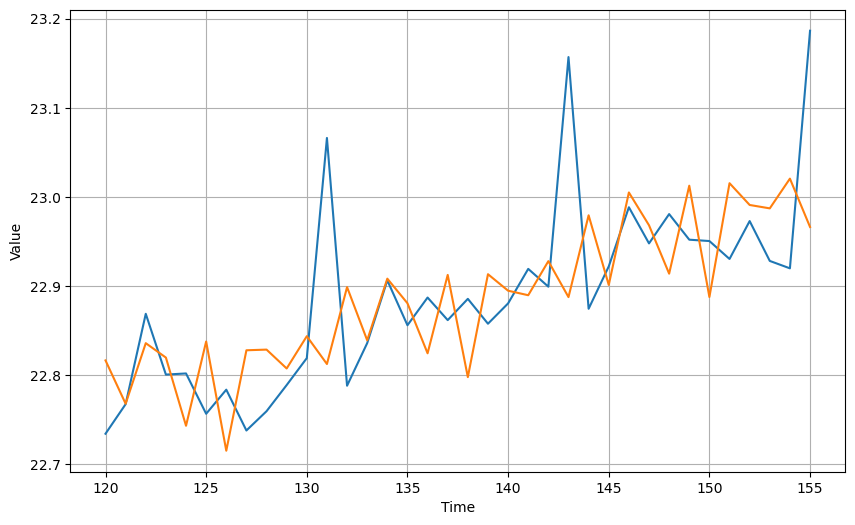

In [46]:
forecast = []
for time in range(156 - window_size):     # 2022年12月のデータが取得できれば168に変更
  forecast.append(model.predict(series[time:time + window_size][np.newaxis]))

forecast = forecast[split_time-window_size:]
results = np.array(forecast)[:, 0, 0]


plt.figure(figsize=(10, 6))

plot_series(time_valid, x_valid)
plot_series(time_valid, results)

In [47]:
# MAPE
from sklearn.metrics import mean_absolute_percentage_error

print('MAPE:')
print(mean_absolute_percentage_error(x_valid, results))

MAPE:
0.002874347602443377


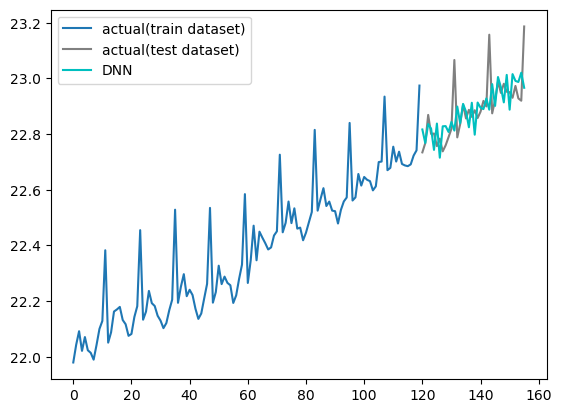

In [48]:
# グラフ化
fig, ax = plt.subplots()
ax.plot(time_train, x_train, label="actual(train dataset)")
ax.plot(time_valid, x_valid, label="actual(test dataset)", color="gray")
# ax.plot(df_log_train[24:].index, train_pred[24:], color="c")
ax.plot(time_valid, results, label="DNN", color="c") 
# ax.fill_between(
#     df_log_test.index,
#     test_pred_ci[:, 0],
#     test_pred_ci[:, 1],
#     color='c',
#     alpha=.2)
ax.legend()

In [49]:
# PRelu
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, PReLU

dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

model = Sequential()
model.add(Dense(10, input_shape=[window_size]))
model.add(PReLU())
model.add(Dense(10))
model.add(PReLU())
model.add(Dense(1))

model.compile(loss="mape", optimizer=tf.keras.optimizers.SGD(lr=1e-6, momentum=0.9))
model.fit(dataset,epochs=5000,verbose=1)

Epoch 1/5000


/Users/nishiyamashoutou/opt/anaconda3/envs/grad_project/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


4/4 [==============================] - 1s 25ms/step - loss: 142.4808
Epoch 2/5000
4/4 [==============================] - 0s 3ms/step - loss: 141.8953
Epoch 3/5000
4/4 [==============================] - 0s 4ms/step - loss: 140.8628
Epoch 4/5000
4/4 [==============================] - 0s 9ms/step - loss: 139.5512
Epoch 5/5000
4/4 [==============================] - 0s 2ms/step - loss: 138.0720
Epoch 6/5000
4/4 [==============================] - 0s 3ms/step - loss: 136.4989
Epoch 7/5000
4/4 [==============================] - 0s 3ms/step - loss: 134.8797
Epoch 8/5000
4/4 [==============================] - 0s 24ms/step - loss: 133.2453
Epoch 9/5000
4/4 [==============================] - 0s 9ms/step - loss: 131.6148
Epoch 10/5000
4/4 [==============================] - 0s 4ms/step - loss: 130.0012
Epoch 11/5000
4/4 [==============================] - 0s 3ms/step - loss: 128.4101
Epoch 12/5000
4/4 [==============================] - 0s 4ms/step - loss: 126.8471
Epoch 13/5000
4/4 [=================

4/4 [==============================] - 0s 2ms/step - loss: 0.3660
Epoch 103/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3551
Epoch 104/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3630
Epoch 105/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.3553
Epoch 106/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.3627
Epoch 107/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3565
Epoch 108/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.3520
Epoch 109/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.3537
Epoch 110/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3651
Epoch 111/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3569
Epoch 112/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3707
Epoch 113/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3522
Epoch 114/5000
4/4 [=======================

4/4 [==============================] - 0s 3ms/step - loss: 0.3657
Epoch 204/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.3461
Epoch 205/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.3970
Epoch 206/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3558
Epoch 207/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.3807
Epoch 208/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.3598
Epoch 209/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.3679
Epoch 210/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3665
Epoch 211/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.3639
Epoch 212/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.3608
Epoch 213/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3551
Epoch 214/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.3609
Epoch 215/5000
4/4 [=======================

4/4 [==============================] - 0s 2ms/step - loss: 0.3523
Epoch 305/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3534
Epoch 306/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3545
Epoch 307/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.3626
Epoch 308/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3629
Epoch 309/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3733
Epoch 310/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3521
Epoch 311/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.3637
Epoch 312/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3564
Epoch 313/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.3525
Epoch 314/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.3522
Epoch 315/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.3505
Epoch 316/5000
4/4 [=======================

4/4 [==============================] - 0s 2ms/step - loss: 0.3523
Epoch 406/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3592
Epoch 407/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3650
Epoch 408/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3474
Epoch 409/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3700
Epoch 410/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.3606
Epoch 411/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.3863
Epoch 412/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.3585
Epoch 413/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.4065
Epoch 414/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3632
Epoch 415/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.3608
Epoch 416/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.3576
Epoch 417/5000
4/4 [=======================

4/4 [==============================] - 0s 2ms/step - loss: 0.3748
Epoch 507/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.3784
Epoch 508/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.3555
Epoch 509/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3928
Epoch 510/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3483
Epoch 511/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3736
Epoch 512/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3537
Epoch 513/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3655
Epoch 514/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3575
Epoch 515/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3692
Epoch 516/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.3977
Epoch 517/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3586
Epoch 518/5000
4/4 [=======================

4/4 [==============================] - 0s 2ms/step - loss: 0.3665
Epoch 608/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.4146
Epoch 609/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.3623
Epoch 610/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3635
Epoch 611/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3588
Epoch 612/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3727
Epoch 613/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3647
Epoch 614/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3514
Epoch 615/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3791
Epoch 616/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.3479
Epoch 617/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.3618
Epoch 618/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3494
Epoch 619/5000
4/4 [=======================

4/4 [==============================] - 0s 1ms/step - loss: 0.3736
Epoch 709/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.3510
Epoch 710/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.3748
Epoch 711/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3604
Epoch 712/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3896
Epoch 713/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3641
Epoch 714/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.4126
Epoch 715/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3777
Epoch 716/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.3823
Epoch 717/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3936
Epoch 718/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.3837
Epoch 719/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3813
Epoch 720/5000
4/4 [=======================

4/4 [==============================] - 0s 2ms/step - loss: 0.3507
Epoch 810/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3523
Epoch 811/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3542
Epoch 812/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3516
Epoch 813/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.3499
Epoch 814/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3531
Epoch 815/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3879
Epoch 816/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3487
Epoch 817/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.3997
Epoch 818/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3793
Epoch 819/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3844
Epoch 820/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3704
Epoch 821/5000
4/4 [=======================

4/4 [==============================] - 0s 2ms/step - loss: 0.3657
Epoch 911/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.4181
Epoch 912/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.3768
Epoch 913/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3827
Epoch 914/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.3514
Epoch 915/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3573
Epoch 916/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3478
Epoch 917/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.3590
Epoch 918/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3627
Epoch 919/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3507
Epoch 920/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.3498
Epoch 921/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3754
Epoch 922/5000
4/4 [=======================

4/4 [==============================] - 0s 1ms/step - loss: 0.3645
Epoch 1012/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3487
Epoch 1013/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.3634
Epoch 1014/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3548
Epoch 1015/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3730
Epoch 1016/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3684
Epoch 1017/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.3930
Epoch 1018/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3648
Epoch 1019/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.4383
Epoch 1020/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3923
Epoch 1021/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.3731
Epoch 1022/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.3558
Epoch 1023/5000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 0.3688
Epoch 1112/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.3651
Epoch 1113/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3544
Epoch 1114/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3505
Epoch 1115/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3495
Epoch 1116/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3496
Epoch 1117/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.3487
Epoch 1118/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3580
Epoch 1119/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.3475
Epoch 1120/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3630
Epoch 1121/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3467
Epoch 1122/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.3852
Epoch 1123/5000
4/4 [===========

4/4 [==============================] - 0s 3ms/step - loss: 0.3548
Epoch 1212/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3486
Epoch 1213/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.3495
Epoch 1214/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3495
Epoch 1215/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.3549
Epoch 1216/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.3508
Epoch 1217/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3807
Epoch 1218/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3696
Epoch 1219/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.3542
Epoch 1220/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.3605
Epoch 1221/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3665
Epoch 1222/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3603
Epoch 1223/5000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 0.3591
Epoch 1312/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.3476
Epoch 1313/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3720
Epoch 1314/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.3888
Epoch 1315/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.3500
Epoch 1316/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.3748
Epoch 1317/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3536
Epoch 1318/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.3967
Epoch 1319/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.3828
Epoch 1320/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3477
Epoch 1321/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3609
Epoch 1322/5000
4/4 [==============================] - 0s 6ms/step - loss: 0.3595
Epoch 1323/5000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 0.3639
Epoch 1412/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.3556
Epoch 1413/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3468
Epoch 1414/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.3614
Epoch 1415/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.3748
Epoch 1416/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3533
Epoch 1417/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3543
Epoch 1418/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.3518
Epoch 1419/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.3498
Epoch 1420/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.3518
Epoch 1421/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3473
Epoch 1422/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3546
Epoch 1423/5000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 0.3524
Epoch 1512/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3498
Epoch 1513/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.3485
Epoch 1514/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3786
Epoch 1515/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.3650
Epoch 1516/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3876
Epoch 1517/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.3573
Epoch 1518/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.3772
Epoch 1519/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3660
Epoch 1520/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3629
Epoch 1521/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.3687
Epoch 1522/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.3495
Epoch 1523/5000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 0.3711
Epoch 1612/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3599
Epoch 1613/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3599
Epoch 1614/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3470
Epoch 1615/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3536
Epoch 1616/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3477
Epoch 1617/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.3466
Epoch 1618/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3477
Epoch 1619/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3526
Epoch 1620/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.3711
Epoch 1621/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.3508
Epoch 1622/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.3569
Epoch 1623/5000
4/4 [===========

4/4 [==============================] - 0s 3ms/step - loss: 0.4844
Epoch 1712/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.3733
Epoch 1713/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.3941
Epoch 1714/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.4147
Epoch 1715/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.3833
Epoch 1716/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.3746
Epoch 1717/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.3587
Epoch 1718/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.3782
Epoch 1719/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.3532
Epoch 1720/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3493
Epoch 1721/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.3521
Epoch 1722/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3668
Epoch 1723/5000
4/4 [===========

4/4 [==============================] - 0s 7ms/step - loss: 0.3506
Epoch 1812/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.3516
Epoch 1813/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3465
Epoch 1814/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.3479
Epoch 1815/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.3485
Epoch 1816/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3516
Epoch 1817/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3582
Epoch 1818/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3521
Epoch 1819/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.4186
Epoch 1820/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.3646
Epoch 1821/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3918
Epoch 1822/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3510
Epoch 1823/5000
4/4 [===========

4/4 [==============================] - 0s 1ms/step - loss: 0.3609
Epoch 1912/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.3479
Epoch 1913/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3467
Epoch 1914/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3530
Epoch 1915/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3497
Epoch 1916/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.3513
Epoch 1917/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3556
Epoch 1918/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.4073
Epoch 1919/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3677
Epoch 1920/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.3545
Epoch 1921/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.3514
Epoch 1922/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.3685
Epoch 1923/5000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 0.3823
Epoch 2012/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3466
Epoch 2013/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3429
Epoch 2014/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3830
Epoch 2015/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3543
Epoch 2016/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.4110
Epoch 2017/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.3709
Epoch 2018/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.3936
Epoch 2019/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.4264
Epoch 2020/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3967
Epoch 2021/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3839
Epoch 2022/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3830
Epoch 2023/5000
4/4 [===========

4/4 [==============================] - 0s 3ms/step - loss: 0.3449
Epoch 2112/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3773
Epoch 2113/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.3443
Epoch 2114/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.4460
Epoch 2115/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3769
Epoch 2116/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.4374
Epoch 2117/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.3551
Epoch 2118/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.3812
Epoch 2119/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3531
Epoch 2120/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3576
Epoch 2121/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.3533
Epoch 2122/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3484
Epoch 2123/5000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 0.3784
Epoch 2212/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.3753
Epoch 2213/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.4232
Epoch 2214/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3551
Epoch 2215/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3593
Epoch 2216/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.3472
Epoch 2217/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.3462
Epoch 2218/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3503
Epoch 2219/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3476
Epoch 2220/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3414
Epoch 2221/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.3818
Epoch 2222/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.3499
Epoch 2223/5000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 0.3460
Epoch 2312/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.3679
Epoch 2313/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3539
Epoch 2314/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3877
Epoch 2315/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.3647
Epoch 2316/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.3612
Epoch 2317/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3434
Epoch 2318/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.3538
Epoch 2319/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3494
Epoch 2320/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3503
Epoch 2321/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3460
Epoch 2322/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.3445
Epoch 2323/5000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 0.3552
Epoch 2412/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.4038
Epoch 2413/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.3882
Epoch 2414/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3587
Epoch 2415/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.4106
Epoch 2416/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3591
Epoch 2417/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.3606
Epoch 2418/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.3569
Epoch 2419/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.3469
Epoch 2420/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3559
Epoch 2421/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.3571
Epoch 2422/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3458
Epoch 2423/5000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 0.3473
Epoch 2512/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.3489
Epoch 2513/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3464
Epoch 2514/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.3543
Epoch 2515/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3504
Epoch 2516/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3566
Epoch 2517/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3463
Epoch 2518/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3566
Epoch 2519/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.3523
Epoch 2520/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.3462
Epoch 2521/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3512
Epoch 2522/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3443
Epoch 2523/5000
4/4 [===========

4/4 [==============================] - 0s 3ms/step - loss: 0.3478
Epoch 2612/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3484
Epoch 2613/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3490
Epoch 2614/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3478
Epoch 2615/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3426
Epoch 2616/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3482
Epoch 2617/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3579
Epoch 2618/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3385
Epoch 2619/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.4198
Epoch 2620/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.3589
Epoch 2621/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3577
Epoch 2622/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.3606
Epoch 2623/5000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 0.3657
Epoch 2712/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3705
Epoch 2713/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3472
Epoch 2714/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3555
Epoch 2715/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3493
Epoch 2716/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3473
Epoch 2717/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.3450
Epoch 2718/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3543
Epoch 2719/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3487
Epoch 2720/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.3717
Epoch 2721/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.3585
Epoch 2722/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.3595
Epoch 2723/5000
4/4 [===========

4/4 [==============================] - 0s 3ms/step - loss: 0.3773
Epoch 2812/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.3595
Epoch 2813/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.3838
Epoch 2814/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.3587
Epoch 2815/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3442
Epoch 2816/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.3601
Epoch 2817/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3485
Epoch 2818/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.3763
Epoch 2819/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.3708
Epoch 2820/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.3498
Epoch 2821/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.3911
Epoch 2822/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3587
Epoch 2823/5000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 0.3548
Epoch 2912/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3560
Epoch 2913/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.3610
Epoch 2914/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.3490
Epoch 2915/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.3681
Epoch 2916/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.3516
Epoch 2917/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.3590
Epoch 2918/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.3437
Epoch 2919/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.3476
Epoch 2920/5000
4/4 [==============================] - 0s 7ms/step - loss: 0.3713
Epoch 2921/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.3557
Epoch 2922/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.3874
Epoch 2923/5000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 0.3977
Epoch 3012/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3707
Epoch 3013/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3450
Epoch 3014/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3526
Epoch 3015/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3488
Epoch 3016/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3486
Epoch 3017/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3432
Epoch 3018/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3461
Epoch 3019/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3461
Epoch 3020/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3421
Epoch 3021/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3647
Epoch 3022/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3546
Epoch 3023/5000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 0.3461
Epoch 3112/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.3829
Epoch 3113/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.3525
Epoch 3114/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3960
Epoch 3115/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3461
Epoch 3116/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3507
Epoch 3117/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.3445
Epoch 3118/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.3436
Epoch 3119/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3637
Epoch 3120/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3471
Epoch 3121/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.3698
Epoch 3122/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3497
Epoch 3123/5000
4/4 [===========

4/4 [==============================] - 0s 1ms/step - loss: 0.3549
Epoch 3212/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3484
Epoch 3213/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3439
Epoch 3214/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3650
Epoch 3215/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3495
Epoch 3216/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.3462
Epoch 3217/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3439
Epoch 3218/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3459
Epoch 3219/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3486
Epoch 3220/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.3465
Epoch 3221/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3477
Epoch 3222/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.3543
Epoch 3223/5000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 0.3473
Epoch 3312/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.3470
Epoch 3313/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.3408
Epoch 3314/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3974
Epoch 3315/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3598
Epoch 3316/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.4301
Epoch 3317/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3615
Epoch 3318/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3678
Epoch 3319/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3369
Epoch 3320/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3487
Epoch 3321/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.3555
Epoch 3322/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3449
Epoch 3323/5000
4/4 [===========

4/4 [==============================] - 0s 1ms/step - loss: 0.3751
Epoch 3412/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3539
Epoch 3413/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3605
Epoch 3414/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.3541
Epoch 3415/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.3864
Epoch 3416/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3672
Epoch 3417/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3808
Epoch 3418/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.3717
Epoch 3419/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3553
Epoch 3420/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.3526
Epoch 3421/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.3447
Epoch 3422/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3456
Epoch 3423/5000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 0.3680
Epoch 3512/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.3372
Epoch 3513/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.3960
Epoch 3514/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.3349
Epoch 3515/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3945
Epoch 3516/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3508
Epoch 3517/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3565
Epoch 3518/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.3472
Epoch 3519/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.3443
Epoch 3520/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.3427
Epoch 3521/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.3457
Epoch 3522/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3464
Epoch 3523/5000
4/4 [===========

4/4 [==============================] - 0s 3ms/step - loss: 0.3587
Epoch 3612/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3560
Epoch 3613/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3526
Epoch 3614/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.3528
Epoch 3615/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3502
Epoch 3616/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3772
Epoch 3617/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3599
Epoch 3618/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.3803
Epoch 3619/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3486
Epoch 3620/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.3425
Epoch 3621/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3571
Epoch 3622/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.3476
Epoch 3623/5000
4/4 [===========

4/4 [==============================] - 0s 3ms/step - loss: 0.3711
Epoch 3712/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3680
Epoch 3713/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.3552
Epoch 3714/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3645
Epoch 3715/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.3436
Epoch 3716/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.3467
Epoch 3717/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.3510
Epoch 3718/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3554
Epoch 3719/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3518
Epoch 3720/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3563
Epoch 3721/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.3481
Epoch 3722/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3680
Epoch 3723/5000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 0.3493
Epoch 3812/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3430
Epoch 3813/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3428
Epoch 3814/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.3445
Epoch 3815/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3506
Epoch 3816/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.3525
Epoch 3817/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.3499
Epoch 3818/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3466
Epoch 3819/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3447
Epoch 3820/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.3444
Epoch 3821/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3488
Epoch 3822/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3456
Epoch 3823/5000
4/4 [===========

4/4 [==============================] - 0s 3ms/step - loss: 0.3399
Epoch 3912/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.3478
Epoch 3913/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3433
Epoch 3914/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.3470
Epoch 3915/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3485
Epoch 3916/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3451
Epoch 3917/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3872
Epoch 3918/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3618
Epoch 3919/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.3763
Epoch 3920/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3687
Epoch 3921/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3668
Epoch 3922/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3443
Epoch 3923/5000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 0.3472
Epoch 4012/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.3569
Epoch 4013/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.3727
Epoch 4014/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.3686
Epoch 4015/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3676
Epoch 4016/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3494
Epoch 4017/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.4071
Epoch 4018/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.3813
Epoch 4019/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.4011
Epoch 4020/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3620
Epoch 4021/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.3510
Epoch 4022/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3446
Epoch 4023/5000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 0.3819
Epoch 4112/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3751
Epoch 4113/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.3496
Epoch 4114/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.4063
Epoch 4115/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3497
Epoch 4116/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3610
Epoch 4117/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3579
Epoch 4118/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3617
Epoch 4119/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.3631
Epoch 4120/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3921
Epoch 4121/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3435
Epoch 4122/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.4303
Epoch 4123/5000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 0.3434
Epoch 4212/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.3461
Epoch 4213/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.3852
Epoch 4214/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.3458
Epoch 4215/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3710
Epoch 4216/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3637
Epoch 4217/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3837
Epoch 4218/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3675
Epoch 4219/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3486
Epoch 4220/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3527
Epoch 4221/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.3430
Epoch 4222/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3447
Epoch 4223/5000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 0.3497
Epoch 4312/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.3549
Epoch 4313/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3434
Epoch 4314/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.3438
Epoch 4315/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3733
Epoch 4316/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3438
Epoch 4317/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3688
Epoch 4318/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3690
Epoch 4319/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.3508
Epoch 4320/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.3479
Epoch 4321/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.3464
Epoch 4322/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3442
Epoch 4323/5000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 0.3471
Epoch 4412/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.3569
Epoch 4413/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.3525
Epoch 4414/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.3413
Epoch 4415/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3454
Epoch 4416/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.3475
Epoch 4417/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.3784
Epoch 4418/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3617
Epoch 4419/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.3815
Epoch 4420/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.3538
Epoch 4421/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3818
Epoch 4422/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.3524
Epoch 4423/5000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 0.3389
Epoch 4512/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3808
Epoch 4513/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3660
Epoch 4514/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.3561
Epoch 4515/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.4051
Epoch 4516/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.3466
Epoch 4517/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3764
Epoch 4518/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3440
Epoch 4519/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3458
Epoch 4520/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3598
Epoch 4521/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3474
Epoch 4522/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.3562
Epoch 4523/5000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 0.3413
Epoch 4612/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.3432
Epoch 4613/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3435
Epoch 4614/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.3516
Epoch 4615/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.3404
Epoch 4616/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.3412
Epoch 4617/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3429
Epoch 4618/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3519
Epoch 4619/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.3418
Epoch 4620/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3465
Epoch 4621/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3706
Epoch 4622/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.3465
Epoch 4623/5000
4/4 [===========

4/4 [==============================] - 0s 3ms/step - loss: 0.4080
Epoch 4712/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3500
Epoch 4713/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.3845
Epoch 4714/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.3515
Epoch 4715/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3470
Epoch 4716/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.3450
Epoch 4717/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3541
Epoch 4718/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3466
Epoch 4719/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3443
Epoch 4720/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3438
Epoch 4721/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3526
Epoch 4722/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3378
Epoch 4723/5000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 0.3456
Epoch 4812/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3420
Epoch 4813/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3571
Epoch 4814/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3537
Epoch 4815/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3779
Epoch 4816/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3857
Epoch 4817/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3438
Epoch 4818/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.4387
Epoch 4819/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3881
Epoch 4820/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3873
Epoch 4821/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.3771
Epoch 4822/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.3534
Epoch 4823/5000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 0.3599
Epoch 4912/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3733
Epoch 4913/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.3411
Epoch 4914/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.3430
Epoch 4915/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3404
Epoch 4916/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.3410
Epoch 4917/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3440
Epoch 4918/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3479
Epoch 4919/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3445
Epoch 4920/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3460
Epoch 4921/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3417
Epoch 4922/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3475
Epoch 4923/5000
4/4 [===========

1/1 [==============================] - 0s 15ms/step


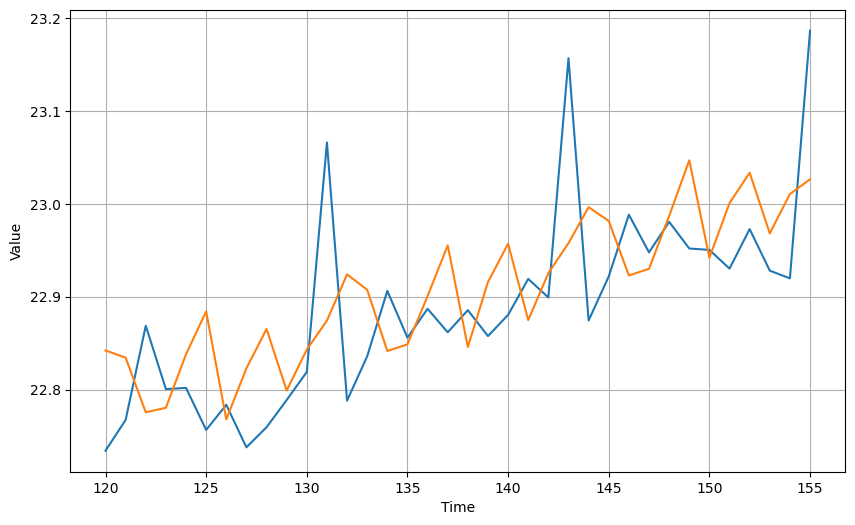

In [50]:
forecast = []
for time in range(156 - window_size):     # 2022年12月のデータが取得できれば168に変更
  forecast.append(model.predict(series[time:time + window_size][np.newaxis]))

forecast = forecast[split_time-window_size:]
results = np.array(forecast)[:, 0, 0]


plt.figure(figsize=(10, 6))

plot_series(time_valid, x_valid)
plot_series(time_valid, results)

In [51]:
# MAPE
from sklearn.metrics import mean_absolute_percentage_error

print('MAPE:')
print(mean_absolute_percentage_error(x_valid, results))

MAPE:
0.003046237648138125


In [52]:
# PRelu
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, PReLU

dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

model = Sequential()
model.add(Dense(10, input_shape=[window_size]))
model.add(PReLU())
model.add(Dense(10))
model.add(PReLU())
model.add(Dense(1))

model.compile(loss="mape", optimizer=tf.keras.optimizers.SGD(lr=1e-6, momentum=0.9))
model.fit(dataset,epochs=50000,verbose=1)

Epoch 1/50000


/Users/nishiyamashoutou/opt/anaconda3/envs/grad_project/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


4/4 [==============================] - 0s 10ms/step - loss: 72.5054
Epoch 2/50000
4/4 [==============================] - 0s 3ms/step - loss: 71.2250
Epoch 3/50000
4/4 [==============================] - 0s 3ms/step - loss: 68.9442
Epoch 4/50000
4/4 [==============================] - 0s 2ms/step - loss: 66.2121
Epoch 5/50000
4/4 [==============================] - 0s 2ms/step - loss: 63.2717
Epoch 6/50000
4/4 [==============================] - 0s 2ms/step - loss: 60.0601
Epoch 7/50000
4/4 [==============================] - 0s 2ms/step - loss: 56.6447
Epoch 8/50000
4/4 [==============================] - 0s 3ms/step - loss: 53.0725
Epoch 9/50000
4/4 [==============================] - 0s 2ms/step - loss: 49.3716
Epoch 10/50000
4/4 [==============================] - 0s 3ms/step - loss: 45.5605
Epoch 11/50000
4/4 [==============================] - 0s 2ms/step - loss: 41.7143
Epoch 12/50000
4/4 [==============================] - 0s 3ms/step - loss: 38.0423
Epoch 13/50000
4/4 [==================

4/4 [==============================] - 0s 2ms/step - loss: 0.4722
Epoch 103/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.4728
Epoch 104/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.4416
Epoch 105/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4501
Epoch 106/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4604
Epoch 107/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4410
Epoch 108/50000
4/4 [==============================] - 0s 1ms/step - loss: 0.4449
Epoch 109/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4485
Epoch 110/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4709
Epoch 111/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4429
Epoch 112/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4557
Epoch 113/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4659
Epoch 114/50000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 0.5167
Epoch 203/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4411
Epoch 204/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4919
Epoch 205/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4492
Epoch 206/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4499
Epoch 207/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4456
Epoch 208/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4397
Epoch 209/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4661
Epoch 210/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4713
Epoch 211/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4653
Epoch 212/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4616
Epoch 213/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4499
Epoch 214/50000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 0.4356
Epoch 303/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4421
Epoch 304/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.4421
Epoch 305/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.4444
Epoch 306/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4615
Epoch 307/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4470
Epoch 308/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4370
Epoch 309/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4741
Epoch 310/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4453
Epoch 311/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4605
Epoch 312/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4871
Epoch 313/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.4571
Epoch 314/50000
4/4 [===========

4/4 [==============================] - 0s 3ms/step - loss: 0.4963
Epoch 403/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4807
Epoch 404/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4529
Epoch 405/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.4366
Epoch 406/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.4454
Epoch 407/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4329
Epoch 408/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4394
Epoch 409/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4390
Epoch 410/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4354
Epoch 411/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4333
Epoch 412/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4436
Epoch 413/50000
4/4 [==============================] - 0s 1ms/step - loss: 0.4348
Epoch 414/50000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 0.4462
Epoch 503/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4478
Epoch 504/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4377
Epoch 505/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.4884
Epoch 506/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4556
Epoch 507/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.5628
Epoch 508/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4410
Epoch 509/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.5144
Epoch 510/50000
4/4 [==============================] - 0s 1ms/step - loss: 0.4835
Epoch 511/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4963
Epoch 512/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4547
Epoch 513/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.4355
Epoch 514/50000
4/4 [===========

4/4 [==============================] - 0s 3ms/step - loss: 0.4371
Epoch 603/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4488
Epoch 604/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4378
Epoch 605/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.4423
Epoch 606/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.4407
Epoch 607/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.4359
Epoch 608/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.4518
Epoch 609/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4506
Epoch 610/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.4999
Epoch 611/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4364
Epoch 612/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4316
Epoch 613/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4365
Epoch 614/50000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 0.4362
Epoch 703/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.4360
Epoch 704/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4363
Epoch 705/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.4355
Epoch 706/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.4346
Epoch 707/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.4416
Epoch 708/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.4430
Epoch 709/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.4466
Epoch 710/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4438
Epoch 711/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.4452
Epoch 712/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.4501
Epoch 713/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.4421
Epoch 714/50000
4/4 [===========

4/4 [==============================] - 0s 3ms/step - loss: 0.4563
Epoch 803/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4490
Epoch 804/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4393
Epoch 805/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4298
Epoch 806/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4429
Epoch 807/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4368
Epoch 808/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4440
Epoch 809/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4205
Epoch 810/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.4917
Epoch 811/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.4055
Epoch 812/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.5185
Epoch 813/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.4587
Epoch 814/50000
4/4 [===========

4/4 [==============================] - 0s 3ms/step - loss: 0.4777
Epoch 903/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4711
Epoch 904/50000
4/4 [==============================] - 0s 1ms/step - loss: 0.4349
Epoch 905/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4393
Epoch 906/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.4267
Epoch 907/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.5556
Epoch 908/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4516
Epoch 909/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.4776
Epoch 910/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.4344
Epoch 911/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4490
Epoch 912/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4278
Epoch 913/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4439
Epoch 914/50000
4/4 [===========

4/4 [==============================] - 0s 3ms/step - loss: 0.4356
Epoch 1003/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4228
Epoch 1004/50000
4/4 [==============================] - 0s 1ms/step - loss: 0.4636
Epoch 1005/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.4289
Epoch 1006/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.4399
Epoch 1007/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4539
Epoch 1008/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4360
Epoch 1009/50000
4/4 [==============================] - 0s 1ms/step - loss: 0.4652
Epoch 1010/50000
4/4 [==============================] - 0s 1ms/step - loss: 0.4564
Epoch 1011/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4468
Epoch 1012/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4606
Epoch 1013/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4429
Epoch 1014/50000
4/4 

4/4 [==============================] - 0s 2ms/step - loss: 0.4412
Epoch 1101/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.4535
Epoch 1102/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4397
Epoch 1103/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4325
Epoch 1104/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4502
Epoch 1105/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.4315
Epoch 1106/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.4350
Epoch 1107/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.4329
Epoch 1108/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4227
Epoch 1109/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4258
Epoch 1110/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.4476
Epoch 1111/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.4338
Epoch 1112/50000
4/4 

4/4 [==============================] - 0s 2ms/step - loss: 0.4543
Epoch 1199/50000
4/4 [==============================] - 0s 1ms/step - loss: 0.4419
Epoch 1200/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4420
Epoch 1201/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4200
Epoch 1202/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.4620
Epoch 1203/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4325
Epoch 1204/50000
4/4 [==============================] - 0s 1ms/step - loss: 0.4275
Epoch 1205/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4514
Epoch 1206/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4487
Epoch 1207/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.4445
Epoch 1208/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4692
Epoch 1209/50000
4/4 [==============================] - 0s 1ms/step - loss: 0.4235
Epoch 1210/50000
4/4 

4/4 [==============================] - 0s 3ms/step - loss: 0.4307
Epoch 1297/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4289
Epoch 1298/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4205
Epoch 1299/50000
4/4 [==============================] - 0s 1ms/step - loss: 0.4319
Epoch 1300/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4321
Epoch 1301/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.4272
Epoch 1302/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4296
Epoch 1303/50000
4/4 [==============================] - 0s 1ms/step - loss: 0.4253
Epoch 1304/50000
4/4 [==============================] - 0s 1ms/step - loss: 0.4344
Epoch 1305/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4247
Epoch 1306/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4359
Epoch 1307/50000
4/4 [==============================] - 0s 1ms/step - loss: 0.4540
Epoch 1308/50000
4/4 

4/4 [==============================] - 0s 3ms/step - loss: 0.4283
Epoch 1395/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4209
Epoch 1396/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4162
Epoch 1397/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4271
Epoch 1398/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4362
Epoch 1399/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4390
Epoch 1400/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4444
Epoch 1401/50000
4/4 [==============================] - 0s 1ms/step - loss: 0.5151
Epoch 1402/50000
4/4 [==============================] - 0s 1ms/step - loss: 0.4577
Epoch 1403/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4357
Epoch 1404/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4251
Epoch 1405/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4204
Epoch 1406/50000
4/4 

4/4 [==============================] - 0s 2ms/step - loss: 0.4332
Epoch 1493/50000
4/4 [==============================] - 0s 1ms/step - loss: 0.4205
Epoch 1494/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4525
Epoch 1495/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4277
Epoch 1496/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.4213
Epoch 1497/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4419
Epoch 1498/50000
4/4 [==============================] - 0s 1ms/step - loss: 0.4205
Epoch 1499/50000
4/4 [==============================] - 0s 1ms/step - loss: 0.4272
Epoch 1500/50000
4/4 [==============================] - 0s 1ms/step - loss: 0.4299
Epoch 1501/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4410
Epoch 1502/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.4208
Epoch 1503/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4173
Epoch 1504/50000
4/4 

4/4 [==============================] - 0s 3ms/step - loss: 0.4250
Epoch 1591/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4202
Epoch 1592/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4309
Epoch 1593/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4131
Epoch 1594/50000
4/4 [==============================] - 0s 1ms/step - loss: 0.4213
Epoch 1595/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4118
Epoch 1596/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4342
Epoch 1597/50000
4/4 [==============================] - 0s 1ms/step - loss: 0.4146
Epoch 1598/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.4329
Epoch 1599/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4187
Epoch 1600/50000
4/4 [==============================] - 0s 1ms/step - loss: 0.4200
Epoch 1601/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4208
Epoch 1602/50000
4/4 

4/4 [==============================] - 0s 2ms/step - loss: 0.4646
Epoch 1689/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4387
Epoch 1690/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4174
Epoch 1691/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.4751
Epoch 1692/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.4179
Epoch 1693/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4891
Epoch 1694/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4512
Epoch 1695/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.5071
Epoch 1696/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4219
Epoch 1697/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4327
Epoch 1698/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4261
Epoch 1699/50000
4/4 [==============================] - 0s 1ms/step - loss: 0.4356
Epoch 1700/50000
4/4 

4/4 [==============================] - 0s 2ms/step - loss: 0.4393
Epoch 1787/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4105
Epoch 1788/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.4261
Epoch 1789/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4424
Epoch 1790/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.4329
Epoch 1791/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4322
Epoch 1792/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.4253
Epoch 1793/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.4299
Epoch 1794/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4143
Epoch 1795/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4386
Epoch 1796/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4127
Epoch 1797/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.4313
Epoch 1798/50000
4/4 

4/4 [==============================] - 0s 3ms/step - loss: 0.4127
Epoch 1885/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4092
Epoch 1886/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4174
Epoch 1887/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.4270
Epoch 1888/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.4260
Epoch 1889/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4253
Epoch 1890/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4335
Epoch 1891/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.4198
Epoch 1892/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4464
Epoch 1893/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4273
Epoch 1894/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.4445
Epoch 1895/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4236
Epoch 1896/50000
4/4 

4/4 [==============================] - 0s 3ms/step - loss: 0.4076
Epoch 1983/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.4097
Epoch 1984/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4149
Epoch 1985/50000
4/4 [==============================] - 0s 1ms/step - loss: 0.4242
Epoch 1986/50000
4/4 [==============================] - 0s 1ms/step - loss: 0.4038
Epoch 1987/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4798
Epoch 1988/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4190
Epoch 1989/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.4854
Epoch 1990/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4645
Epoch 1991/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4894
Epoch 1992/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4517
Epoch 1993/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4186
Epoch 1994/50000
4/4 

4/4 [==============================] - 0s 2ms/step - loss: 0.4141
Epoch 2081/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4561
Epoch 2082/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4210
Epoch 2083/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4362
Epoch 2084/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4255
Epoch 2085/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4321
Epoch 2086/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4605
Epoch 2087/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4428
Epoch 2088/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4413
Epoch 2089/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4043
Epoch 2090/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4190
Epoch 2091/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4280
Epoch 2092/50000
4/4 

4/4 [==============================] - 0s 2ms/step - loss: 0.4214
Epoch 2179/50000
4/4 [==============================] - 0s 5ms/step - loss: 0.4736
Epoch 2180/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4112
Epoch 2181/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.4073
Epoch 2182/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.4054
Epoch 2183/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4069
Epoch 2184/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4148
Epoch 2185/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4264
Epoch 2186/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.4235
Epoch 2187/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4128
Epoch 2188/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4183
Epoch 2189/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4148
Epoch 2190/50000
4/4 

4/4 [==============================] - 0s 2ms/step - loss: 0.4285
Epoch 2277/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4065
Epoch 2278/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4082
Epoch 2279/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4051
Epoch 2280/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4241
Epoch 2281/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4089
Epoch 2282/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.5147
Epoch 2283/50000
4/4 [==============================] - 0s 1ms/step - loss: 0.4111
Epoch 2284/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.5259
Epoch 2285/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4324
Epoch 2286/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.4348
Epoch 2287/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4659
Epoch 2288/50000
4/4 

4/4 [==============================] - 0s 2ms/step - loss: 0.4188
Epoch 2375/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4123
Epoch 2376/50000
4/4 [==============================] - 0s 1ms/step - loss: 0.4038
Epoch 2377/50000
4/4 [==============================] - 0s 1ms/step - loss: 0.4070
Epoch 2378/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4105
Epoch 2379/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4207
Epoch 2380/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.4137
Epoch 2381/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4064
Epoch 2382/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4023
Epoch 2383/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4386
Epoch 2384/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4071
Epoch 2385/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4037
Epoch 2386/50000
4/4 

4/4 [==============================] - 0s 2ms/step - loss: 0.4023
Epoch 2473/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.4155
Epoch 2474/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4044
Epoch 2475/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4024
Epoch 2476/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4443
Epoch 2477/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.4093
Epoch 2478/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4188
Epoch 2479/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4197
Epoch 2480/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4077
Epoch 2481/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4021
Epoch 2482/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4017
Epoch 2483/50000
4/4 [==============================] - 0s 1ms/step - loss: 0.4070
Epoch 2484/50000
4/4 

4/4 [==============================] - 0s 2ms/step - loss: 0.4531
Epoch 2571/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3958
Epoch 2572/50000
4/4 [==============================] - 0s 1ms/step - loss: 0.4153
Epoch 2573/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4009
Epoch 2574/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3999
Epoch 2575/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4264
Epoch 2576/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4049
Epoch 2577/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4697
Epoch 2578/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.4165
Epoch 2579/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.4222
Epoch 2580/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4026
Epoch 2581/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4023
Epoch 2582/50000
4/4 

4/4 [==============================] - 0s 2ms/step - loss: 0.4162
Epoch 2669/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4010
Epoch 2670/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.4031
Epoch 2671/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4209
Epoch 2672/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4186
Epoch 2673/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4201
Epoch 2674/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.4187
Epoch 2675/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4119
Epoch 2676/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4658
Epoch 2677/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4036
Epoch 2678/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4305
Epoch 2679/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4009
Epoch 2680/50000
4/4 

4/4 [==============================] - 0s 2ms/step - loss: 0.4119
Epoch 2767/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4204
Epoch 2768/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4000
Epoch 2769/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4098
Epoch 2770/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4049
Epoch 2771/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4187
Epoch 2772/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4375
Epoch 2773/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3972
Epoch 2774/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4131
Epoch 2775/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4429
Epoch 2776/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4330
Epoch 2777/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4988
Epoch 2778/50000
4/4 

4/4 [==============================] - 0s 3ms/step - loss: 0.4096
Epoch 2865/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.4040
Epoch 2866/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4347
Epoch 2867/50000
4/4 [==============================] - 0s 1ms/step - loss: 0.4373
Epoch 2868/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4216
Epoch 2869/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4405
Epoch 2870/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4133
Epoch 2871/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4225
Epoch 2872/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.4594
Epoch 2873/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4799
Epoch 2874/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4211
Epoch 2875/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4112
Epoch 2876/50000
4/4 

4/4 [==============================] - 0s 2ms/step - loss: 0.3998
Epoch 2963/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3962
Epoch 2964/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4006
Epoch 2965/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3991
Epoch 2966/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3904
Epoch 2967/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4285
Epoch 2968/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.4129
Epoch 2969/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.4012
Epoch 2970/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3958
Epoch 2971/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4167
Epoch 2972/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4069
Epoch 2973/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4201
Epoch 2974/50000
4/4 

4/4 [==============================] - 0s 3ms/step - loss: 0.3987
Epoch 3061/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4002
Epoch 3062/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3961
Epoch 3063/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3926
Epoch 3064/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.4045
Epoch 3065/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.4028
Epoch 3066/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4412
Epoch 3067/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3964
Epoch 3068/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4040
Epoch 3069/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.4108
Epoch 3070/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3968
Epoch 3071/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3961
Epoch 3072/50000
4/4 

4/4 [==============================] - 0s 3ms/step - loss: 0.3921
Epoch 3159/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3914
Epoch 3160/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3953
Epoch 3161/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3943
Epoch 3162/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4000
Epoch 3163/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3980
Epoch 3164/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4226
Epoch 3165/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3895
Epoch 3166/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.4101
Epoch 3167/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3985
Epoch 3168/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.4012
Epoch 3169/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.4019
Epoch 3170/50000
4/4 

4/4 [==============================] - 0s 3ms/step - loss: 0.4220
Epoch 3257/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3882
Epoch 3258/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.3835
Epoch 3259/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.4464
Epoch 3260/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4145
Epoch 3261/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4642
Epoch 3262/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3913
Epoch 3263/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4085
Epoch 3264/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3964
Epoch 3265/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4058
Epoch 3266/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.4413
Epoch 3267/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.4189
Epoch 3268/50000
4/4 

4/4 [==============================] - 0s 2ms/step - loss: 0.3964
Epoch 3355/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3912
Epoch 3356/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3937
Epoch 3357/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4142
Epoch 3358/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3964
Epoch 3359/50000
4/4 [==============================] - 0s 1ms/step - loss: 0.4242
Epoch 3360/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3849
Epoch 3361/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3954
Epoch 3362/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3938
Epoch 3363/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3849
Epoch 3364/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4011
Epoch 3365/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3993
Epoch 3366/50000
4/4 

4/4 [==============================] - 0s 2ms/step - loss: 0.3955
Epoch 3453/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4033
Epoch 3454/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3927
Epoch 3455/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3956
Epoch 3456/50000
4/4 [==============================] - 0s 6ms/step - loss: 0.3968
Epoch 3457/50000
4/4 [==============================] - 0s 1ms/step - loss: 0.3862
Epoch 3458/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4024
Epoch 3459/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4059
Epoch 3460/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3881
Epoch 3461/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3924
Epoch 3462/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3908
Epoch 3463/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4199
Epoch 3464/50000
4/4 

4/4 [==============================] - 0s 3ms/step - loss: 0.4042
Epoch 3551/50000
4/4 [==============================] - 0s 1ms/step - loss: 0.3948
Epoch 3552/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3891
Epoch 3553/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3894
Epoch 3554/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3973
Epoch 3555/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4051
Epoch 3556/50000
4/4 [==============================] - 0s 1ms/step - loss: 0.3958
Epoch 3557/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3892
Epoch 3558/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3936
Epoch 3559/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4072
Epoch 3560/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4023
Epoch 3561/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3904
Epoch 3562/50000
4/4 

4/4 [==============================] - 0s 2ms/step - loss: 0.4002
Epoch 3649/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3907
Epoch 3650/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3987
Epoch 3651/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.4133
Epoch 3652/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3868
Epoch 3653/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4130
Epoch 3654/50000
4/4 [==============================] - 0s 1ms/step - loss: 0.3836
Epoch 3655/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4067
Epoch 3656/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3905
Epoch 3657/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3952
Epoch 3658/50000
4/4 [==============================] - 0s 1ms/step - loss: 0.3861
Epoch 3659/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3901
Epoch 3660/50000
4/4 

4/4 [==============================] - 0s 2ms/step - loss: 0.3938
Epoch 3747/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3903
Epoch 3748/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3889
Epoch 3749/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3940
Epoch 3750/50000
4/4 [==============================] - 0s 1ms/step - loss: 0.3956
Epoch 3751/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4087
Epoch 3752/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3813
Epoch 3753/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4178
Epoch 3754/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3892
Epoch 3755/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3836
Epoch 3756/50000
4/4 [==============================] - 0s 1ms/step - loss: 0.3964
Epoch 3757/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3891
Epoch 3758/50000
4/4 

4/4 [==============================] - 0s 2ms/step - loss: 0.3928
Epoch 3845/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3857
Epoch 3846/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3888
Epoch 3847/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.4194
Epoch 3848/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.4199
Epoch 3849/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.4004
Epoch 3850/50000
4/4 [==============================] - 0s 5ms/step - loss: 0.3910
Epoch 3851/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3831
Epoch 3852/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3922
Epoch 3853/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3921
Epoch 3854/50000
4/4 [==============================] - 0s 1ms/step - loss: 0.3966
Epoch 3855/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3886
Epoch 3856/50000
4/4 

4/4 [==============================] - 0s 2ms/step - loss: 0.4081
Epoch 3943/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3741
Epoch 3944/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4421
Epoch 3945/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3920
Epoch 3946/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3972
Epoch 3947/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3910
Epoch 3948/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4019
Epoch 3949/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3928
Epoch 3950/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3946
Epoch 3951/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3842
Epoch 3952/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4073
Epoch 3953/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3997
Epoch 3954/50000
4/4 

4/4 [==============================] - 0s 2ms/step - loss: 0.3847
Epoch 4041/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3932
Epoch 4042/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3908
Epoch 4043/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4009
Epoch 4044/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4030
Epoch 4045/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3881
Epoch 4046/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4430
Epoch 4047/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3912
Epoch 4048/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4042
Epoch 4049/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3998
Epoch 4050/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.3892
Epoch 4051/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.3794
Epoch 4052/50000
4/4 

4/4 [==============================] - 0s 3ms/step - loss: 0.4240
Epoch 4139/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3926
Epoch 4140/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.4103
Epoch 4141/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4220
Epoch 4142/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4105
Epoch 4143/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4948
Epoch 4144/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4056
Epoch 4145/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4151
Epoch 4146/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3862
Epoch 4147/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3883
Epoch 4148/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3819
Epoch 4149/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3848
Epoch 4150/50000
4/4 

4/4 [==============================] - 0s 2ms/step - loss: 0.3830
Epoch 4237/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3883
Epoch 4238/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3918
Epoch 4239/50000
4/4 [==============================] - 0s 1ms/step - loss: 0.3778
Epoch 4240/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3792
Epoch 4241/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3789
Epoch 4242/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3833
Epoch 4243/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3796
Epoch 4244/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3810
Epoch 4245/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3838
Epoch 4246/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3788
Epoch 4247/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3795
Epoch 4248/50000
4/4 

4/4 [==============================] - 0s 2ms/step - loss: 0.3779
Epoch 4335/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4247
Epoch 4336/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3810
Epoch 4337/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3843
Epoch 4338/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3819
Epoch 4339/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3816
Epoch 4340/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3879
Epoch 4341/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3828
Epoch 4342/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3789
Epoch 4343/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3803
Epoch 4344/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3886
Epoch 4345/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3774
Epoch 4346/50000
4/4 

4/4 [==============================] - 0s 3ms/step - loss: 0.3982
Epoch 4433/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3772
Epoch 4434/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.4468
Epoch 4435/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3786
Epoch 4436/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4191
Epoch 4437/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3810
Epoch 4438/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3947
Epoch 4439/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3831
Epoch 4440/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3798
Epoch 4441/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3765
Epoch 4442/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3857
Epoch 4443/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3999
Epoch 4444/50000
4/4 

4/4 [==============================] - 0s 3ms/step - loss: 0.3785
Epoch 4531/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3687
Epoch 4532/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3983
Epoch 4533/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3740
Epoch 4534/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3744
Epoch 4535/50000
4/4 [==============================] - 0s 1ms/step - loss: 0.3724
Epoch 4536/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3745
Epoch 4537/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3814
Epoch 4538/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3791
Epoch 4539/50000
4/4 [==============================] - 0s 1ms/step - loss: 0.3797
Epoch 4540/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4309
Epoch 4541/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3850
Epoch 4542/50000
4/4 

4/4 [==============================] - 0s 3ms/step - loss: 0.3751
Epoch 4629/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3791
Epoch 4630/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3733
Epoch 4631/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3797
Epoch 4632/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3734
Epoch 4633/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3972
Epoch 4634/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3764
Epoch 4635/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3835
Epoch 4636/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3732
Epoch 4637/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3819
Epoch 4638/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3730
Epoch 4639/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3720
Epoch 4640/50000
4/4 

4/4 [==============================] - 0s 3ms/step - loss: 0.3822
Epoch 4727/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.4179
Epoch 4728/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3892
Epoch 4729/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3750
Epoch 4730/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3902
Epoch 4731/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3888
Epoch 4732/50000
4/4 [==============================] - 0s 5ms/step - loss: 0.4043
Epoch 4733/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4117
Epoch 4734/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3741
Epoch 4735/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3747
Epoch 4736/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.3807
Epoch 4737/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3975
Epoch 4738/50000
4/4 

4/4 [==============================] - 0s 1ms/step - loss: 0.3788
Epoch 4825/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4031
Epoch 4826/50000
4/4 [==============================] - 0s 1ms/step - loss: 0.3924
Epoch 4827/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3666
Epoch 4828/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4023
Epoch 4829/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3797
Epoch 4830/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3880
Epoch 4831/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3765
Epoch 4832/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3703
Epoch 4833/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3695
Epoch 4834/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3867
Epoch 4835/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3695
Epoch 4836/50000
4/4 

4/4 [==============================] - 0s 2ms/step - loss: 0.3676
Epoch 4923/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3731
Epoch 4924/50000
4/4 [==============================] - 0s 1ms/step - loss: 0.3696
Epoch 4925/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3838
Epoch 4926/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3754
Epoch 4927/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3723
Epoch 4928/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3852
Epoch 4929/50000
4/4 [==============================] - 0s 1ms/step - loss: 0.3778
Epoch 4930/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3917
Epoch 4931/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3727
Epoch 4932/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3878
Epoch 4933/50000
4/4 [==============================] - 0s 1ms/step - loss: 0.3760
Epoch 4934/50000
4/4 

4/4 [==============================] - 0s 3ms/step - loss: 0.4011
Epoch 5021/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3817
Epoch 5022/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3776
Epoch 5023/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3913
Epoch 5024/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3630
Epoch 5025/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3649
Epoch 5026/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4279
Epoch 5027/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3783
Epoch 5028/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3763
Epoch 5029/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4245
Epoch 5030/50000
4/4 [==============================] - 0s 1ms/step - loss: 0.3771
Epoch 5031/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4275
Epoch 5032/50000
4/4 

4/4 [==============================] - 0s 3ms/step - loss: 0.3768
Epoch 5119/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3718
Epoch 5120/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3743
Epoch 5121/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3782
Epoch 5122/50000
4/4 [==============================] - 0s 1ms/step - loss: 0.3854
Epoch 5123/50000
4/4 [==============================] - 0s 1ms/step - loss: 0.3650
Epoch 5124/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3831
Epoch 5125/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3785
Epoch 5126/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3929
Epoch 5127/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3798
Epoch 5128/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3718
Epoch 5129/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3721
Epoch 5130/50000
4/4 

4/4 [==============================] - 0s 3ms/step - loss: 0.3804
Epoch 5217/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3599
Epoch 5218/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4041
Epoch 5219/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3778
Epoch 5220/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3795
Epoch 5221/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3781
Epoch 5222/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3744
Epoch 5223/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3761
Epoch 5224/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3895
Epoch 5225/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3679
Epoch 5226/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3656
Epoch 5227/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3671
Epoch 5228/50000
4/4 

4/4 [==============================] - 0s 2ms/step - loss: 0.3614
Epoch 5315/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3999
Epoch 5316/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3794
Epoch 5317/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3687
Epoch 5318/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.4101
Epoch 5319/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3720
Epoch 5320/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3720
Epoch 5321/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3597
Epoch 5322/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4064
Epoch 5323/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3795
Epoch 5324/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3691
Epoch 5325/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3634
Epoch 5326/50000
4/4 

4/4 [==============================] - 0s 2ms/step - loss: 0.3376
Epoch 5413/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3744
Epoch 5414/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3660
Epoch 5415/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3534
Epoch 5416/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3385
Epoch 5417/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3736
Epoch 5418/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3820
Epoch 5419/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3858
Epoch 5420/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3258
Epoch 5421/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3323
Epoch 5422/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3550
Epoch 5423/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3691
Epoch 5424/50000
4/4 

4/4 [==============================] - 0s 2ms/step - loss: 0.3467
Epoch 5511/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3809
Epoch 5512/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3491
Epoch 5513/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3768
Epoch 5514/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3417
Epoch 5515/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4137
Epoch 5516/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3694
Epoch 5517/50000
4/4 [==============================] - 0s 1ms/step - loss: 0.3542
Epoch 5518/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3563
Epoch 5519/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3376
Epoch 5520/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3416
Epoch 5521/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3300
Epoch 5522/50000
4/4 

4/4 [==============================] - 0s 2ms/step - loss: 0.3243
Epoch 5609/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3406
Epoch 5610/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3401
Epoch 5611/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3286
Epoch 5612/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3728
Epoch 5613/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3879
Epoch 5614/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3635
Epoch 5615/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3886
Epoch 5616/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.4224
Epoch 5617/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3754
Epoch 5618/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3980
Epoch 5619/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3594
Epoch 5620/50000
4/4 

4/4 [==============================] - 0s 3ms/step - loss: 0.3268
Epoch 5707/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3351
Epoch 5708/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3265
Epoch 5709/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3238
Epoch 5710/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3398
Epoch 5711/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3360
Epoch 5712/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3242
Epoch 5713/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3432
Epoch 5714/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3328
Epoch 5715/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3631
Epoch 5716/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.3228
Epoch 5717/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3693
Epoch 5718/50000
4/4 

4/4 [==============================] - 0s 2ms/step - loss: 0.3564
Epoch 5805/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3698
Epoch 5806/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3468
Epoch 5807/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3796
Epoch 5808/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3516
Epoch 5809/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3339
Epoch 5810/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3402
Epoch 5811/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3513
Epoch 5812/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3412
Epoch 5813/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3514
Epoch 5814/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3334
Epoch 5815/50000
4/4 [==============================] - 0s 1ms/step - loss: 0.3856
Epoch 5816/50000
4/4 

4/4 [==============================] - 0s 2ms/step - loss: 0.3735
Epoch 5903/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3314
Epoch 5904/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3515
Epoch 5905/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3408
Epoch 5906/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3262
Epoch 5907/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3257
Epoch 5908/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3364
Epoch 5909/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3359
Epoch 5910/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3471
Epoch 5911/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3604
Epoch 5912/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3293
Epoch 5913/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3311
Epoch 5914/50000
4/4 

4/4 [==============================] - 0s 2ms/step - loss: 0.3227
Epoch 6001/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3267
Epoch 6002/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3245
Epoch 6003/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3280
Epoch 6004/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3226
Epoch 6005/50000
4/4 [==============================] - 0s 1ms/step - loss: 0.3247
Epoch 6006/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3417
Epoch 6007/50000
4/4 [==============================] - 0s 1ms/step - loss: 0.3343
Epoch 6008/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3211
Epoch 6009/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3291
Epoch 6010/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3243
Epoch 6011/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3231
Epoch 6012/50000
4/4 

4/4 [==============================] - 0s 3ms/step - loss: 0.3733
Epoch 6099/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3457
Epoch 6100/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3202
Epoch 6101/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3372
Epoch 6102/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3249
Epoch 6103/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3257
Epoch 6104/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3365
Epoch 6105/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3289
Epoch 6106/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3250
Epoch 6107/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3278
Epoch 6108/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3572
Epoch 6109/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3367
Epoch 6110/50000
4/4 

4/4 [==============================] - 0s 2ms/step - loss: 0.3429
Epoch 6197/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3537
Epoch 6198/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3325
Epoch 6199/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3337
Epoch 6200/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3459
Epoch 6201/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3275
Epoch 6202/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3631
Epoch 6203/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3450
Epoch 6204/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3495
Epoch 6205/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.3737
Epoch 6206/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3642
Epoch 6207/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3447
Epoch 6208/50000
4/4 

4/4 [==============================] - 0s 3ms/step - loss: 0.3230
Epoch 6295/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3249
Epoch 6296/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3207
Epoch 6297/50000
4/4 [==============================] - 0s 1ms/step - loss: 0.3232
Epoch 6298/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3244
Epoch 6299/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3227
Epoch 6300/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3251
Epoch 6301/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3243
Epoch 6302/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.3292
Epoch 6303/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3272
Epoch 6304/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3400
Epoch 6305/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3647
Epoch 6306/50000
4/4 

4/4 [==============================] - 0s 3ms/step - loss: 0.3249
Epoch 6393/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3702
Epoch 6394/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3304
Epoch 6395/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3265
Epoch 6396/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3292
Epoch 6397/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3223
Epoch 6398/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.3403
Epoch 6399/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3282
Epoch 6400/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3205
Epoch 6401/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.3269
Epoch 6402/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3378
Epoch 6403/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3266
Epoch 6404/50000
4/4 

4/4 [==============================] - 0s 2ms/step - loss: 0.3380
Epoch 6491/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3297
Epoch 6492/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3345
Epoch 6493/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3309
Epoch 6494/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3535
Epoch 6495/50000
4/4 [==============================] - 0s 5ms/step - loss: 0.3702
Epoch 6496/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.3417
Epoch 6497/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3380
Epoch 6498/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3575
Epoch 6499/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3287
Epoch 6500/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3410
Epoch 6501/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3267
Epoch 6502/50000
4/4 

4/4 [==============================] - 0s 3ms/step - loss: 0.3197
Epoch 6589/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3319
Epoch 6590/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3221
Epoch 6591/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3526
Epoch 6592/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3335
Epoch 6593/50000
4/4 [==============================] - 0s 1ms/step - loss: 0.3866
Epoch 6594/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3259
Epoch 6595/50000
4/4 [==============================] - 0s 1ms/step - loss: 0.3276
Epoch 6596/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3393
Epoch 6597/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3315
Epoch 6598/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3374
Epoch 6599/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3350
Epoch 6600/50000
4/4 

4/4 [==============================] - 0s 2ms/step - loss: 0.3215
Epoch 6687/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3211
Epoch 6688/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3221
Epoch 6689/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3239
Epoch 6690/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3219
Epoch 6691/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3182
Epoch 6692/50000
4/4 [==============================] - 0s 1ms/step - loss: 0.3267
Epoch 6693/50000
4/4 [==============================] - 0s 1ms/step - loss: 0.3226
Epoch 6694/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3431
Epoch 6695/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3249
Epoch 6696/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3695
Epoch 6697/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3486
Epoch 6698/50000
4/4 

4/4 [==============================] - 0s 2ms/step - loss: 0.3529
Epoch 6785/50000
4/4 [==============================] - 0s 1ms/step - loss: 0.3378
Epoch 6786/50000
4/4 [==============================] - 0s 1ms/step - loss: 0.3270
Epoch 6787/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3444
Epoch 6788/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3435
Epoch 6789/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3500
Epoch 6790/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3238
Epoch 6791/50000
4/4 [==============================] - 0s 1ms/step - loss: 0.3440
Epoch 6792/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3311
Epoch 6793/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3404
Epoch 6794/50000
4/4 [==============================] - 0s 1ms/step - loss: 0.3233
Epoch 6795/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3252
Epoch 6796/50000
4/4 

4/4 [==============================] - 0s 6ms/step - loss: 0.3307
Epoch 6883/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3260
Epoch 6884/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3430
Epoch 6885/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3207
Epoch 6886/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3305
Epoch 6887/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3284
Epoch 6888/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3739
Epoch 6889/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3205
Epoch 6890/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3239
Epoch 6891/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3264
Epoch 6892/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3304
Epoch 6893/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3176
Epoch 6894/50000
4/4 

4/4 [==============================] - 0s 2ms/step - loss: 0.3198
Epoch 6981/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3203
Epoch 6982/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3352
Epoch 6983/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3212
Epoch 6984/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3200
Epoch 6985/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3216
Epoch 6986/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3698
Epoch 6987/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.3285
Epoch 6988/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3255
Epoch 6989/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3478
Epoch 6990/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3454
Epoch 6991/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3495
Epoch 6992/50000
4/4 

4/4 [==============================] - 0s 2ms/step - loss: 0.3428
Epoch 7079/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3217
Epoch 7080/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3242
Epoch 7081/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3217
Epoch 7082/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3287
Epoch 7083/50000
4/4 [==============================] - 0s 1ms/step - loss: 0.3377
Epoch 7084/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3350
Epoch 7085/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3229
Epoch 7086/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3353
Epoch 7087/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3296
Epoch 7088/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3457
Epoch 7089/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3322
Epoch 7090/50000
4/4 

4/4 [==============================] - 0s 2ms/step - loss: 0.3188
Epoch 7177/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3250
Epoch 7178/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3193
Epoch 7179/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3555
Epoch 7180/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3297
Epoch 7181/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3318
Epoch 7182/50000
4/4 [==============================] - 0s 1ms/step - loss: 0.3249
Epoch 7183/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3296
Epoch 7184/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3769
Epoch 7185/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3544
Epoch 7186/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3245
Epoch 7187/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3294
Epoch 7188/50000
4/4 

4/4 [==============================] - 0s 2ms/step - loss: 0.3240
Epoch 7275/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3238
Epoch 7276/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3158
Epoch 7277/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3240
Epoch 7278/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3331
Epoch 7279/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3202
Epoch 7280/50000
4/4 [==============================] - 0s 1ms/step - loss: 0.3626
Epoch 7281/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3255
Epoch 7282/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3293
Epoch 7283/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3249
Epoch 7284/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3313
Epoch 7285/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3181
Epoch 7286/50000
4/4 

4/4 [==============================] - 0s 2ms/step - loss: 0.3310
Epoch 7373/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3212
Epoch 7374/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3394
Epoch 7375/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3203
Epoch 7376/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3266
Epoch 7377/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3222
Epoch 7378/50000
4/4 [==============================] - 0s 1ms/step - loss: 0.3168
Epoch 7379/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3200
Epoch 7380/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3243
Epoch 7381/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3263
Epoch 7382/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3342
Epoch 7383/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3312
Epoch 7384/50000
4/4 

4/4 [==============================] - 0s 2ms/step - loss: 0.3188
Epoch 7471/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3238
Epoch 7472/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3373
Epoch 7473/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3334
Epoch 7474/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3289
Epoch 7475/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3195
Epoch 7476/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3247
Epoch 7477/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3160
Epoch 7478/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3586
Epoch 7479/50000
4/4 [==============================] - 0s 1ms/step - loss: 0.3223
Epoch 7480/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3353
Epoch 7481/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3213
Epoch 7482/50000
4/4 

4/4 [==============================] - 0s 2ms/step - loss: 0.3337
Epoch 7569/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3224
Epoch 7570/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3207
Epoch 7571/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3206
Epoch 7572/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3205
Epoch 7573/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3252
Epoch 7574/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3189
Epoch 7575/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3172
Epoch 7576/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3277
Epoch 7577/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3321
Epoch 7578/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3272
Epoch 7579/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3495
Epoch 7580/50000
4/4 

4/4 [==============================] - 0s 2ms/step - loss: 0.3643
Epoch 7667/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3254
Epoch 7668/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3258
Epoch 7669/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3221
Epoch 7670/50000
4/4 [==============================] - 0s 9ms/step - loss: 0.3254
Epoch 7671/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3206
Epoch 7672/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3226
Epoch 7673/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3221
Epoch 7674/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3228
Epoch 7675/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3164
Epoch 7676/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3200
Epoch 7677/50000
4/4 [==============================] - 0s 1ms/step - loss: 0.3160
Epoch 7678/50000
4/4 

4/4 [==============================] - 0s 3ms/step - loss: 0.3326
Epoch 7765/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3202
Epoch 7766/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3148
Epoch 7767/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3252
Epoch 7768/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3172
Epoch 7769/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3162
Epoch 7770/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3197
Epoch 7771/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3390
Epoch 7772/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3279
Epoch 7773/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3196
Epoch 7774/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3302
Epoch 7775/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3224
Epoch 7776/50000
4/4 

4/4 [==============================] - 0s 3ms/step - loss: 0.3260
Epoch 7863/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3285
Epoch 7864/50000
4/4 [==============================] - 0s 1ms/step - loss: 0.3838
Epoch 7865/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3450
Epoch 7866/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3221
Epoch 7867/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3320
Epoch 7868/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3189
Epoch 7869/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3216
Epoch 7870/50000
4/4 [==============================] - 0s 1ms/step - loss: 0.3236
Epoch 7871/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3245
Epoch 7872/50000
4/4 [==============================] - 0s 1ms/step - loss: 0.3158
Epoch 7873/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3171
Epoch 7874/50000
4/4 

4/4 [==============================] - 0s 2ms/step - loss: 0.3254
Epoch 7961/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3213
Epoch 7962/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3219
Epoch 7963/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3173
Epoch 7964/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3338
Epoch 7965/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3161
Epoch 7966/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3203
Epoch 7967/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3238
Epoch 7968/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3216
Epoch 7969/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3165
Epoch 7970/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3174
Epoch 7971/50000
4/4 [==============================] - 0s 1ms/step - loss: 0.3290
Epoch 7972/50000
4/4 

4/4 [==============================] - 0s 2ms/step - loss: 0.3621
Epoch 8059/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3164
Epoch 8060/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3159
Epoch 8061/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3244
Epoch 8062/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3150
Epoch 8063/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3223
Epoch 8064/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3170
Epoch 8065/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3418
Epoch 8066/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3267
Epoch 8067/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3238
Epoch 8068/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3373
Epoch 8069/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3137
Epoch 8070/50000
4/4 

4/4 [==============================] - 0s 4ms/step - loss: 0.3288
Epoch 8157/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3466
Epoch 8158/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.3331
Epoch 8159/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3141
Epoch 8160/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3869
Epoch 8161/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3201
Epoch 8162/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3381
Epoch 8163/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.3182
Epoch 8164/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3451
Epoch 8165/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.3330
Epoch 8166/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3174
Epoch 8167/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3224
Epoch 8168/50000
4/4 

4/4 [==============================] - 0s 2ms/step - loss: 0.3190
Epoch 8255/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3285
Epoch 8256/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3520
Epoch 8257/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3499
Epoch 8258/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3394
Epoch 8259/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.3313
Epoch 8260/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3172
Epoch 8261/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3289
Epoch 8262/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3154
Epoch 8263/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3174
Epoch 8264/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.3168
Epoch 8265/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3180
Epoch 8266/50000
4/4 

4/4 [==============================] - 0s 3ms/step - loss: 0.3714
Epoch 8353/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3261
Epoch 8354/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3291
Epoch 8355/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3295
Epoch 8356/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3197
Epoch 8357/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.3223
Epoch 8358/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3109
Epoch 8359/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.3642
Epoch 8360/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3158
Epoch 8361/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.3697
Epoch 8362/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4114
Epoch 8363/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3714
Epoch 8364/50000
4/4 

4/4 [==============================] - 0s 2ms/step - loss: 0.3383
Epoch 8451/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4073
Epoch 8452/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3465
Epoch 8453/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3506
Epoch 8454/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3587
Epoch 8455/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3303
Epoch 8456/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3359
Epoch 8457/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3125
Epoch 8458/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3227
Epoch 8459/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3183
Epoch 8460/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3360
Epoch 8461/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3230
Epoch 8462/50000
4/4 

4/4 [==============================] - 0s 2ms/step - loss: 0.3239
Epoch 8549/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3205
Epoch 8550/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3377
Epoch 8551/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3256
Epoch 8552/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3183
Epoch 8553/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3348
Epoch 8554/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3158
Epoch 8555/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3135
Epoch 8556/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3430
Epoch 8557/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3220
Epoch 8558/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3210
Epoch 8559/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3463
Epoch 8560/50000
4/4 

4/4 [==============================] - 0s 2ms/step - loss: 0.3140
Epoch 8647/50000
4/4 [==============================] - 0s 1ms/step - loss: 0.3177
Epoch 8648/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3172
Epoch 8649/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3307
Epoch 8650/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3120
Epoch 8651/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3383
Epoch 8652/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3247
Epoch 8653/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3404
Epoch 8654/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3257
Epoch 8655/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3186
Epoch 8656/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3550
Epoch 8657/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3881
Epoch 8658/50000
4/4 

4/4 [==============================] - 0s 2ms/step - loss: 0.3265
Epoch 8745/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3202
Epoch 8746/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3149
Epoch 8747/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3151
Epoch 8748/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.3200
Epoch 8749/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3122
Epoch 8750/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3128
Epoch 8751/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.3133
Epoch 8752/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3125
Epoch 8753/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3192
Epoch 8754/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.3130
Epoch 8755/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3180
Epoch 8756/50000
4/4 

4/4 [==============================] - 0s 2ms/step - loss: 0.3442
Epoch 8843/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3133
Epoch 8844/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3117
Epoch 8845/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3151
Epoch 8846/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3245
Epoch 8847/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3171
Epoch 8848/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3184
Epoch 8849/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.3187
Epoch 8850/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3117
Epoch 8851/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3148
Epoch 8852/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3144
Epoch 8853/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3263
Epoch 8854/50000
4/4 

4/4 [==============================] - 0s 2ms/step - loss: 0.3309
Epoch 8941/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3346
Epoch 8942/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3224
Epoch 8943/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3432
Epoch 8944/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3314
Epoch 8945/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3337
Epoch 8946/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3311
Epoch 8947/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3230
Epoch 8948/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3164
Epoch 8949/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3338
Epoch 8950/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3282
Epoch 8951/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3185
Epoch 8952/50000
4/4 

4/4 [==============================] - 0s 2ms/step - loss: 0.3090
Epoch 9039/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3777
Epoch 9040/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3361
Epoch 9041/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3498
Epoch 9042/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3707
Epoch 9043/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3434
Epoch 9044/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3290
Epoch 9045/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3411
Epoch 9046/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.3613
Epoch 9047/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3231
Epoch 9048/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3257
Epoch 9049/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3422
Epoch 9050/50000
4/4 

4/4 [==============================] - 0s 2ms/step - loss: 0.3164
Epoch 9137/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3168
Epoch 9138/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3213
Epoch 9139/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3189
Epoch 9140/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3246
Epoch 9141/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3226
Epoch 9142/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.3351
Epoch 9143/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3105
Epoch 9144/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3405
Epoch 9145/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3283
Epoch 9146/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3143
Epoch 9147/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3175
Epoch 9148/50000
4/4 

4/4 [==============================] - 0s 2ms/step - loss: 0.3204
Epoch 9235/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3177
Epoch 9236/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3139
Epoch 9237/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3104
Epoch 9238/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3465
Epoch 9239/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3205
Epoch 9240/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3121
Epoch 9241/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.3283
Epoch 9242/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3210
Epoch 9243/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3247
Epoch 9244/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3284
Epoch 9245/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3240
Epoch 9246/50000
4/4 

4/4 [==============================] - 0s 2ms/step - loss: 0.3193
Epoch 9333/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3207
Epoch 9334/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3165
Epoch 9335/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3193
Epoch 9336/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3103
Epoch 9337/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3123
Epoch 9338/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3159
Epoch 9339/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3254
Epoch 9340/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3156
Epoch 9341/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3240
Epoch 9342/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3131
Epoch 9343/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3130
Epoch 9344/50000
4/4 

4/4 [==============================] - 0s 2ms/step - loss: 0.3201
Epoch 9431/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3495
Epoch 9432/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3381
Epoch 9433/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3406
Epoch 9434/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3546
Epoch 9435/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3313
Epoch 9436/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3303
Epoch 9437/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3170
Epoch 9438/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3143
Epoch 9439/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3358
Epoch 9440/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3240
Epoch 9441/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3177
Epoch 9442/50000
4/4 

4/4 [==============================] - 0s 2ms/step - loss: 0.3132
Epoch 9529/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3112
Epoch 9530/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3118
Epoch 9531/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3125
Epoch 9532/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3151
Epoch 9533/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3147
Epoch 9534/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3281
Epoch 9535/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3224
Epoch 9536/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3099
Epoch 9537/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3158
Epoch 9538/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3248
Epoch 9539/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3163
Epoch 9540/50000
4/4 

4/4 [==============================] - 0s 4ms/step - loss: 0.3229
Epoch 9627/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.3199
Epoch 9628/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.3180
Epoch 9629/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3226
Epoch 9630/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3101
Epoch 9631/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3116
Epoch 9632/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3144
Epoch 9633/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3100
Epoch 9634/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.3183
Epoch 9635/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3128
Epoch 9636/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3128
Epoch 9637/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3233
Epoch 9638/50000
4/4 

4/4 [==============================] - 0s 3ms/step - loss: 0.3109
Epoch 9725/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.3135
Epoch 9726/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3121
Epoch 9727/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3213
Epoch 9728/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.3087
Epoch 9729/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3289
Epoch 9730/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.3107
Epoch 9731/50000
4/4 [==============================] - 0s 5ms/step - loss: 0.3271
Epoch 9732/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.3182
Epoch 9733/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3104
Epoch 9734/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3120
Epoch 9735/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3099
Epoch 9736/50000
4/4 

4/4 [==============================] - 0s 3ms/step - loss: 0.3134
Epoch 9823/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3170
Epoch 9824/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3714
Epoch 9825/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3345
Epoch 9826/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3466
Epoch 9827/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3113
Epoch 9828/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3227
Epoch 9829/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3317
Epoch 9830/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.3318
Epoch 9831/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3193
Epoch 9832/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3126
Epoch 9833/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3394
Epoch 9834/50000
4/4 

4/4 [==============================] - 0s 3ms/step - loss: 0.3108
Epoch 9921/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3116
Epoch 9922/50000
4/4 [==============================] - 0s 1ms/step - loss: 0.3100
Epoch 9923/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3107
Epoch 9924/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3119
Epoch 9925/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3149
Epoch 9926/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3108
Epoch 9927/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3390
Epoch 9928/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3490
Epoch 9929/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3402
Epoch 9930/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3222
Epoch 9931/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3146
Epoch 9932/50000
4/4 

4/4 [==============================] - 0s 3ms/step - loss: 0.3198
Epoch 10019/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3641
Epoch 10020/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3260
Epoch 10021/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3746
Epoch 10022/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3492
Epoch 10023/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3238
Epoch 10024/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.3247
Epoch 10025/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3752
Epoch 10026/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.3212
Epoch 10027/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.3268
Epoch 10028/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3193
Epoch 10029/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3102
Epoch 1003

4/4 [==============================] - 0s 2ms/step - loss: 0.3084
Epoch 10116/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4375
Epoch 10117/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3882
Epoch 10118/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.4019
Epoch 10119/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3730
Epoch 10120/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3132
Epoch 10121/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3538
Epoch 10122/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3619
Epoch 10123/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3229
Epoch 10124/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3735
Epoch 10125/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3262
Epoch 10126/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3143
Epoch 1012

4/4 [==============================] - 0s 2ms/step - loss: 0.3102
Epoch 10213/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3197
Epoch 10214/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3224
Epoch 10215/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3111
Epoch 10216/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3101
Epoch 10217/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3082
Epoch 10218/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3159
Epoch 10219/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3065
Epoch 10220/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3673
Epoch 10221/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3306
Epoch 10222/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.3426
Epoch 10223/50000
4/4 [==============================] - 0s 5ms/step - loss: 0.3085
Epoch 1022

4/4 [==============================] - 0s 2ms/step - loss: 0.3361
Epoch 10310/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3210
Epoch 10311/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3187
Epoch 10312/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3183
Epoch 10313/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.4046
Epoch 10314/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3381
Epoch 10315/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3639
Epoch 10316/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3251
Epoch 10317/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3091
Epoch 10318/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3211
Epoch 10319/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3164
Epoch 10320/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3177
Epoch 1032

4/4 [==============================] - 0s 2ms/step - loss: 0.3298
Epoch 10407/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3104
Epoch 10408/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3239
Epoch 10409/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3104
Epoch 10410/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3074
Epoch 10411/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3165
Epoch 10412/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3086
Epoch 10413/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3073
Epoch 10414/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3105
Epoch 10415/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3088
Epoch 10416/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3212
Epoch 10417/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3095
Epoch 1041

4/4 [==============================] - 0s 2ms/step - loss: 0.3215
Epoch 10504/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3238
Epoch 10505/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3292
Epoch 10506/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3146
Epoch 10507/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3256
Epoch 10508/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3097
Epoch 10509/50000
4/4 [==============================] - 0s 1ms/step - loss: 0.3072
Epoch 10510/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3416
Epoch 10511/50000
4/4 [==============================] - 0s 1ms/step - loss: 0.3075
Epoch 10512/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3148
Epoch 10513/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3202
Epoch 10514/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3198
Epoch 1051

4/4 [==============================] - 0s 2ms/step - loss: 0.3102
Epoch 10601/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3395
Epoch 10602/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3474
Epoch 10603/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3256
Epoch 10604/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3538
Epoch 10605/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3087
Epoch 10606/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3164
Epoch 10607/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3067
Epoch 10608/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3134
Epoch 10609/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3082
Epoch 10610/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3689
Epoch 10611/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3228
Epoch 1061

4/4 [==============================] - 0s 2ms/step - loss: 0.3318
Epoch 10698/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3063
Epoch 10699/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3231
Epoch 10700/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3214
Epoch 10701/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3308
Epoch 10702/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3146
Epoch 10703/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3166
Epoch 10704/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3161
Epoch 10705/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3502
Epoch 10706/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3209
Epoch 10707/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3270
Epoch 10708/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3198
Epoch 1070

4/4 [==============================] - 0s 3ms/step - loss: 0.3144
Epoch 10795/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3385
Epoch 10796/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3029
Epoch 10797/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3206
Epoch 10798/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3071
Epoch 10799/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3076
Epoch 10800/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3112
Epoch 10801/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3108
Epoch 10802/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3139
Epoch 10803/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3178
Epoch 10804/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3094
Epoch 10805/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3530
Epoch 1080

4/4 [==============================] - 0s 1ms/step - loss: 0.3653
Epoch 10892/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3231
Epoch 10893/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3593
Epoch 10894/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3260
Epoch 10895/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3104
Epoch 10896/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3189
Epoch 10897/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3176
Epoch 10898/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3202
Epoch 10899/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3168
Epoch 10900/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3172
Epoch 10901/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3177
Epoch 10902/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.3063
Epoch 1090

4/4 [==============================] - 0s 2ms/step - loss: 0.3097
Epoch 10989/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3054
Epoch 10990/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3218
Epoch 10991/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3146
Epoch 10992/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3095
Epoch 10993/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3639
Epoch 10994/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3516
Epoch 10995/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3167
Epoch 10996/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3595
Epoch 10997/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3445
Epoch 10998/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3111
Epoch 10999/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3325
Epoch 1100

4/4 [==============================] - 0s 2ms/step - loss: 0.3102
Epoch 11086/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3704
Epoch 11087/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3144
Epoch 11088/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3228
Epoch 11089/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3163
Epoch 11090/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3088
Epoch 11091/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3247
Epoch 11092/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3122
Epoch 11093/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3182
Epoch 11094/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3278
Epoch 11095/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3097
Epoch 11096/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3215
Epoch 1109

4/4 [==============================] - 0s 2ms/step - loss: 0.3070
Epoch 11183/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3088
Epoch 11184/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3062
Epoch 11185/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3177
Epoch 11186/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3100
Epoch 11187/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3061
Epoch 11188/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3015
Epoch 11189/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3916
Epoch 11190/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.3273
Epoch 11191/50000
4/4 [==============================] - 0s 5ms/step - loss: 0.3571
Epoch 11192/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3799
Epoch 11193/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3290
Epoch 1119

4/4 [==============================] - 0s 3ms/step - loss: 0.3774
Epoch 11280/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3422
Epoch 11281/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3065
Epoch 11282/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3716
Epoch 11283/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3296
Epoch 11284/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3229
Epoch 11285/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3562
Epoch 11286/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3455
Epoch 11287/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3115
Epoch 11288/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3007
Epoch 11289/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3540
Epoch 11290/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3294
Epoch 1129

4/4 [==============================] - 0s 2ms/step - loss: 0.2990
Epoch 11377/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3374
Epoch 11378/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3406
Epoch 11379/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3233
Epoch 11380/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3259
Epoch 11381/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3046
Epoch 11382/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3046
Epoch 11383/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3073
Epoch 11384/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3187
Epoch 11385/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3153
Epoch 11386/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3060
Epoch 11387/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3365
Epoch 1138

4/4 [==============================] - 0s 2ms/step - loss: 0.3116
Epoch 11474/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2969
Epoch 11475/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3409
Epoch 11476/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3510
Epoch 11477/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3127
Epoch 11478/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3444
Epoch 11479/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3377
Epoch 11480/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3422
Epoch 11481/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3215
Epoch 11482/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3268
Epoch 11483/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3053
Epoch 11484/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3208
Epoch 1148

4/4 [==============================] - 0s 2ms/step - loss: 0.3282
Epoch 11571/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3144
Epoch 11572/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3547
Epoch 11573/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3211
Epoch 11574/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3168
Epoch 11575/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3142
Epoch 11576/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3287
Epoch 11577/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3156
Epoch 11578/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3151
Epoch 11579/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3382
Epoch 11580/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3014
Epoch 11581/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3347
Epoch 1158

4/4 [==============================] - 0s 2ms/step - loss: 0.3163
Epoch 11668/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3320
Epoch 11669/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3138
Epoch 11670/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3078
Epoch 11671/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3100
Epoch 11672/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3621
Epoch 11673/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3347
Epoch 11674/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3276
Epoch 11675/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3056
Epoch 11676/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3177
Epoch 11677/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3227
Epoch 11678/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3314
Epoch 1167

4/4 [==============================] - 0s 2ms/step - loss: 0.3108
Epoch 11765/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3054
Epoch 11766/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3723
Epoch 11767/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3723
Epoch 11768/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4104
Epoch 11769/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3336
Epoch 11770/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3101
Epoch 11771/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3178
Epoch 11772/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3055
Epoch 11773/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3139
Epoch 11774/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3130
Epoch 11775/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3120
Epoch 1177

4/4 [==============================] - 0s 2ms/step - loss: 0.3601
Epoch 11862/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3174
Epoch 11863/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3150
Epoch 11864/50000
4/4 [==============================] - 0s 1ms/step - loss: 0.3730
Epoch 11865/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3285
Epoch 11866/50000
4/4 [==============================] - 0s 1ms/step - loss: 0.3334
Epoch 11867/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3716
Epoch 11868/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3414
Epoch 11869/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3239
Epoch 11870/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.4151
Epoch 11871/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3025
Epoch 11872/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4338
Epoch 1187

4/4 [==============================] - 0s 2ms/step - loss: 0.3024
Epoch 11959/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3292
Epoch 11960/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3251
Epoch 11961/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3219
Epoch 11962/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3499
Epoch 11963/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3077
Epoch 11964/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3429
Epoch 11965/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3056
Epoch 11966/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3465
Epoch 11967/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3556
Epoch 11968/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3481
Epoch 11969/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3408
Epoch 1197

4/4 [==============================] - 0s 3ms/step - loss: 0.3033
Epoch 12056/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3129
Epoch 12057/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3075
Epoch 12058/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3082
Epoch 12059/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3149
Epoch 12060/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3044
Epoch 12061/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.3081
Epoch 12062/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.3147
Epoch 12063/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3112
Epoch 12064/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3174
Epoch 12065/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3062
Epoch 12066/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3197
Epoch 1206

4/4 [==============================] - 0s 2ms/step - loss: 0.3052
Epoch 12153/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3291
Epoch 12154/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3077
Epoch 12155/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3014
Epoch 12156/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3095
Epoch 12157/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3102
Epoch 12158/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3086
Epoch 12159/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2984
Epoch 12160/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3616
Epoch 12161/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3169
Epoch 12162/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3180
Epoch 12163/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3050
Epoch 1216

4/4 [==============================] - 0s 2ms/step - loss: 0.3383
Epoch 12250/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3082
Epoch 12251/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3259
Epoch 12252/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3305
Epoch 12253/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3047
Epoch 12254/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3282
Epoch 12255/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3037
Epoch 12256/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3100
Epoch 12257/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.3054
Epoch 12258/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3135
Epoch 12259/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3217
Epoch 12260/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3058
Epoch 1226

4/4 [==============================] - 0s 2ms/step - loss: 0.3356
Epoch 12347/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3282
Epoch 12348/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3139
Epoch 12349/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3223
Epoch 12350/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3167
Epoch 12351/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3259
Epoch 12352/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3069
Epoch 12353/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3304
Epoch 12354/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3069
Epoch 12355/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3248
Epoch 12356/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3035
Epoch 12357/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3046
Epoch 1235

4/4 [==============================] - 0s 3ms/step - loss: 0.2972
Epoch 12444/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3294
Epoch 12445/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3024
Epoch 12446/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3157
Epoch 12447/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3235
Epoch 12448/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3075
Epoch 12449/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3484
Epoch 12450/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3138
Epoch 12451/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3085
Epoch 12452/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3202
Epoch 12453/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3012
Epoch 12454/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3035
Epoch 1245

4/4 [==============================] - 0s 2ms/step - loss: 0.3360
Epoch 12541/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3458
Epoch 12542/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3131
Epoch 12543/50000
4/4 [==============================] - 0s 5ms/step - loss: 0.3463
Epoch 12544/50000
4/4 [==============================] - 0s 7ms/step - loss: 0.3279
Epoch 12545/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3133
Epoch 12546/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3665
Epoch 12547/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3472
Epoch 12548/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3186
Epoch 12549/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.5153
Epoch 12550/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3155
Epoch 12551/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.4010
Epoch 1255

4/4 [==============================] - 0s 2ms/step - loss: 0.3114
Epoch 12638/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.3026
Epoch 12639/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3112
Epoch 12640/50000
4/4 [==============================] - 0s 5ms/step - loss: 0.3055
Epoch 12641/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3182
Epoch 12642/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3008
Epoch 12643/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3132
Epoch 12644/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3049
Epoch 12645/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3079
Epoch 12646/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.3033
Epoch 12647/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3127
Epoch 12648/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.3088
Epoch 1264

4/4 [==============================] - 0s 2ms/step - loss: 0.3705
Epoch 12735/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.3623
Epoch 12736/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3245
Epoch 12737/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3194
Epoch 12738/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3318
Epoch 12739/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3282
Epoch 12740/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3299
Epoch 12741/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3576
Epoch 12742/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3386
Epoch 12743/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3174
Epoch 12744/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3183
Epoch 12745/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3656
Epoch 1274

4/4 [==============================] - 0s 2ms/step - loss: 0.3630
Epoch 12832/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3179
Epoch 12833/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3135
Epoch 12834/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3632
Epoch 12835/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3001
Epoch 12836/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3113
Epoch 12837/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2983
Epoch 12838/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3685
Epoch 12839/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3132
Epoch 12840/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3130
Epoch 12841/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3012
Epoch 12842/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3079
Epoch 1284

4/4 [==============================] - 0s 3ms/step - loss: 0.3036
Epoch 12929/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3309
Epoch 12930/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3020
Epoch 12931/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3014
Epoch 12932/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3018
Epoch 12933/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3063
Epoch 12934/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3318
Epoch 12935/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3163
Epoch 12936/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3548
Epoch 12937/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3202
Epoch 12938/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3095
Epoch 12939/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3039
Epoch 1294

4/4 [==============================] - 0s 2ms/step - loss: 0.3380
Epoch 13026/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3158
Epoch 13027/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.3122
Epoch 13028/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3122
Epoch 13029/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3212
Epoch 13030/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3503
Epoch 13031/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3067
Epoch 13032/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3232
Epoch 13033/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3801
Epoch 13034/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3227
Epoch 13035/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3337
Epoch 13036/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3290
Epoch 1303

4/4 [==============================] - 0s 2ms/step - loss: 0.3194
Epoch 13123/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3344
Epoch 13124/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3034
Epoch 13125/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.3004
Epoch 13126/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3132
Epoch 13127/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3073
Epoch 13128/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3028
Epoch 13129/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3013
Epoch 13130/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3023
Epoch 13131/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3240
Epoch 13132/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3124
Epoch 13133/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.3056
Epoch 1313

4/4 [==============================] - 0s 2ms/step - loss: 0.3219
Epoch 13220/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3389
Epoch 13221/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3076
Epoch 13222/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3038
Epoch 13223/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3035
Epoch 13224/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3065
Epoch 13225/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3152
Epoch 13226/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.3185
Epoch 13227/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3156
Epoch 13228/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2991
Epoch 13229/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3547
Epoch 13230/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3172
Epoch 1323

4/4 [==============================] - 0s 2ms/step - loss: 0.3017
Epoch 13317/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3011
Epoch 13318/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3117
Epoch 13319/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3052
Epoch 13320/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3104
Epoch 13321/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3086
Epoch 13322/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3111
Epoch 13323/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3497
Epoch 13324/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3125
Epoch 13325/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3738
Epoch 13326/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.3734
Epoch 13327/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3411
Epoch 1332

4/4 [==============================] - 0s 2ms/step - loss: 0.3260
Epoch 13414/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3232
Epoch 13415/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3090
Epoch 13416/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3035
Epoch 13417/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3067
Epoch 13418/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3196
Epoch 13419/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3010
Epoch 13420/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3346
Epoch 13421/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3027
Epoch 13422/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3004
Epoch 13423/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3195
Epoch 13424/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3023
Epoch 1342

4/4 [==============================] - 0s 2ms/step - loss: 0.3064
Epoch 13511/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2988
Epoch 13512/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3009
Epoch 13513/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3024
Epoch 13514/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3081
Epoch 13515/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3002
Epoch 13516/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3026
Epoch 13517/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3020
Epoch 13518/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3340
Epoch 13519/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2996
Epoch 13520/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3040
Epoch 13521/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3012
Epoch 1352

4/4 [==============================] - 0s 2ms/step - loss: 0.3041
Epoch 13608/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3056
Epoch 13609/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3429
Epoch 13610/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3002
Epoch 13611/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3021
Epoch 13612/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3323
Epoch 13613/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3503
Epoch 13614/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3022
Epoch 13615/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3303
Epoch 13616/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3157
Epoch 13617/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3050
Epoch 13618/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.3029
Epoch 1361

4/4 [==============================] - 0s 2ms/step - loss: 0.3022
Epoch 13705/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3101
Epoch 13706/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3560
Epoch 13707/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3352
Epoch 13708/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3237
Epoch 13709/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3494
Epoch 13710/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3058
Epoch 13711/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3207
Epoch 13712/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2983
Epoch 13713/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3144
Epoch 13714/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3119
Epoch 13715/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3098
Epoch 1371

4/4 [==============================] - 0s 2ms/step - loss: 0.3154
Epoch 13802/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3025
Epoch 13803/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3006
Epoch 13804/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2992
Epoch 13805/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3025
Epoch 13806/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3038
Epoch 13807/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3099
Epoch 13808/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3176
Epoch 13809/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3177
Epoch 13810/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3255
Epoch 13811/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3343
Epoch 13812/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3102
Epoch 1381

4/4 [==============================] - 0s 4ms/step - loss: 0.3116
Epoch 13899/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.3029
Epoch 13900/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3099
Epoch 13901/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3028
Epoch 13902/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3033
Epoch 13903/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3136
Epoch 13904/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3086
Epoch 13905/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.3145
Epoch 13906/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3004
Epoch 13907/50000
4/4 [==============================] - 0s 5ms/step - loss: 0.2986
Epoch 13908/50000
4/4 [==============================] - 0s 5ms/step - loss: 0.3064
Epoch 13909/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2978
Epoch 1391

4/4 [==============================] - 0s 2ms/step - loss: 0.3082
Epoch 13996/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3000
Epoch 13997/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3129
Epoch 13998/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3167
Epoch 13999/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2983
Epoch 14000/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3006
Epoch 14001/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3042
Epoch 14002/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2968
Epoch 14003/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3111
Epoch 14004/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3010
Epoch 14005/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3135
Epoch 14006/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.3149
Epoch 1400

4/4 [==============================] - 0s 2ms/step - loss: 0.2991
Epoch 14093/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3061
Epoch 14094/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3037
Epoch 14095/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3057
Epoch 14096/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3073
Epoch 14097/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2990
Epoch 14098/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3444
Epoch 14099/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3223
Epoch 14100/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3331
Epoch 14101/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3028
Epoch 14102/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3006
Epoch 14103/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2998
Epoch 1410

4/4 [==============================] - 0s 2ms/step - loss: 0.3129
Epoch 14190/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2980
Epoch 14191/50000
4/4 [==============================] - 0s 1ms/step - loss: 0.3023
Epoch 14192/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2952
Epoch 14193/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3260
Epoch 14194/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3089
Epoch 14195/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3065
Epoch 14196/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.3044
Epoch 14197/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2988
Epoch 14198/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2991
Epoch 14199/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3013
Epoch 14200/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3048
Epoch 1420

4/4 [==============================] - 0s 2ms/step - loss: 0.3047
Epoch 14287/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2990
Epoch 14288/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3072
Epoch 14289/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3115
Epoch 14290/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2963
Epoch 14291/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3226
Epoch 14292/50000
4/4 [==============================] - 0s 6ms/step - loss: 0.3399
Epoch 14293/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3073
Epoch 14294/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3091
Epoch 14295/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3018
Epoch 14296/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3126
Epoch 14297/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3117
Epoch 1429

4/4 [==============================] - 0s 2ms/step - loss: 0.3005
Epoch 14384/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3106
Epoch 14385/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3051
Epoch 14386/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.3163
Epoch 14387/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.3044
Epoch 14388/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2981
Epoch 14389/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3106
Epoch 14390/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3010
Epoch 14391/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3020
Epoch 14392/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3108
Epoch 14393/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3085
Epoch 14394/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2966
Epoch 1439

4/4 [==============================] - 0s 2ms/step - loss: 0.3149
Epoch 14481/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3731
Epoch 14482/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3035
Epoch 14483/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3054
Epoch 14484/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2995
Epoch 14485/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3096
Epoch 14486/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2973
Epoch 14487/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3133
Epoch 14488/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3253
Epoch 14489/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2989
Epoch 14490/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3312
Epoch 14491/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3388
Epoch 1449

4/4 [==============================] - 0s 2ms/step - loss: 0.3408
Epoch 14578/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3268
Epoch 14579/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3271
Epoch 14580/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3514
Epoch 14581/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3245
Epoch 14582/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3013
Epoch 14583/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3227
Epoch 14584/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3104
Epoch 14585/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3092
Epoch 14586/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3178
Epoch 14587/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2974
Epoch 14588/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2998
Epoch 1458

4/4 [==============================] - 0s 2ms/step - loss: 0.3134
Epoch 14675/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2979
Epoch 14676/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3046
Epoch 14677/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3115
Epoch 14678/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2990
Epoch 14679/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2930
Epoch 14680/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3077
Epoch 14681/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2995
Epoch 14682/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3016
Epoch 14683/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3099
Epoch 14684/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3128
Epoch 14685/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3045
Epoch 1468

4/4 [==============================] - 0s 2ms/step - loss: 0.3239
Epoch 14772/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2986
Epoch 14773/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3086
Epoch 14774/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3506
Epoch 14775/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2957
Epoch 14776/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3109
Epoch 14777/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3532
Epoch 14778/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3180
Epoch 14779/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3676
Epoch 14780/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.3041
Epoch 14781/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3041
Epoch 14782/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3120
Epoch 1478

4/4 [==============================] - 0s 3ms/step - loss: 0.2960
Epoch 14869/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2963
Epoch 14870/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3041
Epoch 14871/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3038
Epoch 14872/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3222
Epoch 14873/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3111
Epoch 14874/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3095
Epoch 14875/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3058
Epoch 14876/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3635
Epoch 14877/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2974
Epoch 14878/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3708
Epoch 14879/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3070
Epoch 1488

4/4 [==============================] - 0s 2ms/step - loss: 0.3075
Epoch 14966/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2991
Epoch 14967/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2981
Epoch 14968/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3145
Epoch 14969/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2957
Epoch 14970/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3244
Epoch 14971/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3028
Epoch 14972/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2999
Epoch 14973/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2991
Epoch 14974/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2951
Epoch 14975/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3254
Epoch 14976/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3089
Epoch 1497

4/4 [==============================] - 0s 2ms/step - loss: 0.3098
Epoch 15063/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3944
Epoch 15064/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3454
Epoch 15065/50000
4/4 [==============================] - 0s 1ms/step - loss: 0.3093
Epoch 15066/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3127
Epoch 15067/50000
4/4 [==============================] - 0s 1ms/step - loss: 0.3111
Epoch 15068/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3003
Epoch 15069/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3129
Epoch 15070/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3047
Epoch 15071/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2976
Epoch 15072/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3098
Epoch 15073/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3023
Epoch 1507

4/4 [==============================] - 0s 2ms/step - loss: 0.2984
Epoch 15160/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3173
Epoch 15161/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3141
Epoch 15162/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3025
Epoch 15163/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3029
Epoch 15164/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3099
Epoch 15165/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3072
Epoch 15166/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3255
Epoch 15167/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2959
Epoch 15168/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3301
Epoch 15169/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3513
Epoch 15170/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3278
Epoch 1517

4/4 [==============================] - 0s 3ms/step - loss: 0.3193
Epoch 15257/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3176
Epoch 15258/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3255
Epoch 15259/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2951
Epoch 15260/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3140
Epoch 15261/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3154
Epoch 15262/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2961
Epoch 15263/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2968
Epoch 15264/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3022
Epoch 15265/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3155
Epoch 15266/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3107
Epoch 15267/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3334
Epoch 1526

4/4 [==============================] - 0s 2ms/step - loss: 0.3331
Epoch 15354/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3292
Epoch 15355/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3629
Epoch 15356/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3030
Epoch 15357/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3133
Epoch 15358/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.3323
Epoch 15359/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3002
Epoch 15360/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2944
Epoch 15361/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2993
Epoch 15362/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3208
Epoch 15363/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3101
Epoch 15364/50000
4/4 [==============================] - 0s 5ms/step - loss: 0.2989
Epoch 1536

4/4 [==============================] - 0s 2ms/step - loss: 0.3226
Epoch 15451/50000
4/4 [==============================] - 0s 5ms/step - loss: 0.3417
Epoch 15452/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2966
Epoch 15453/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2948
Epoch 15454/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3033
Epoch 15455/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3127
Epoch 15456/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3106
Epoch 15457/50000
4/4 [==============================] - 0s 5ms/step - loss: 0.2958
Epoch 15458/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2963
Epoch 15459/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2962
Epoch 15460/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2974
Epoch 15461/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2969
Epoch 1546

4/4 [==============================] - 0s 2ms/step - loss: 0.3061
Epoch 15548/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3185
Epoch 15549/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3002
Epoch 15550/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2948
Epoch 15551/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3312
Epoch 15552/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2995
Epoch 15553/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2983
Epoch 15554/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3228
Epoch 15555/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2955
Epoch 15556/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3334
Epoch 15557/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3197
Epoch 15558/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2913
Epoch 1555

4/4 [==============================] - 0s 2ms/step - loss: 0.3006
Epoch 15645/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3090
Epoch 15646/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3194
Epoch 15647/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3321
Epoch 15648/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3268
Epoch 15649/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3047
Epoch 15650/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3473
Epoch 15651/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3084
Epoch 15652/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3037
Epoch 15653/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3166
Epoch 15654/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3061
Epoch 15655/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3691
Epoch 1565

4/4 [==============================] - 0s 2ms/step - loss: 0.2956
Epoch 15742/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3110
Epoch 15743/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3444
Epoch 15744/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3044
Epoch 15745/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3056
Epoch 15746/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3137
Epoch 15747/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3060
Epoch 15748/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3276
Epoch 15749/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3049
Epoch 15750/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3068
Epoch 15751/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2962
Epoch 15752/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3028
Epoch 1575

4/4 [==============================] - 0s 3ms/step - loss: 0.3025
Epoch 15839/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2966
Epoch 15840/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.3777
Epoch 15841/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3490
Epoch 15842/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.3133
Epoch 15843/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3222
Epoch 15844/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2976
Epoch 15845/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2964
Epoch 15846/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3027
Epoch 15847/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2983
Epoch 15848/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3364
Epoch 15849/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3367
Epoch 1585

4/4 [==============================] - 0s 2ms/step - loss: 0.2964
Epoch 15936/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3056
Epoch 15937/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.3112
Epoch 15938/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2993
Epoch 15939/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2972
Epoch 15940/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2985
Epoch 15941/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3049
Epoch 15942/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3138
Epoch 15943/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3287
Epoch 15944/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2952
Epoch 15945/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3097
Epoch 15946/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3092
Epoch 1594

4/4 [==============================] - 0s 2ms/step - loss: 0.3236
Epoch 16033/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.3019
Epoch 16034/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2947
Epoch 16035/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3029
Epoch 16036/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2925
Epoch 16037/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3001
Epoch 16038/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2960
Epoch 16039/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3130
Epoch 16040/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2970
Epoch 16041/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2990
Epoch 16042/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2938
Epoch 16043/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2991
Epoch 1604

4/4 [==============================] - 0s 3ms/step - loss: 0.2968
Epoch 16130/50000
4/4 [==============================] - 0s 6ms/step - loss: 0.2962
Epoch 16131/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2997
Epoch 16132/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3138
Epoch 16133/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2950
Epoch 16134/50000
4/4 [==============================] - 0s 5ms/step - loss: 0.2964
Epoch 16135/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2943
Epoch 16136/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3035
Epoch 16137/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3045
Epoch 16138/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3008
Epoch 16139/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2964
Epoch 16140/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2949
Epoch 1614

4/4 [==============================] - 0s 2ms/step - loss: 0.3018
Epoch 16227/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2987
Epoch 16228/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2937
Epoch 16229/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2992
Epoch 16230/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2995
Epoch 16231/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3154
Epoch 16232/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3297
Epoch 16233/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3138
Epoch 16234/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3262
Epoch 16235/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2949
Epoch 16236/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2954
Epoch 16237/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3096
Epoch 1623

4/4 [==============================] - 0s 3ms/step - loss: 0.2950
Epoch 16324/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3028
Epoch 16325/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2962
Epoch 16326/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3094
Epoch 16327/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3016
Epoch 16328/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2979
Epoch 16329/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2939
Epoch 16330/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3037
Epoch 16331/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2988
Epoch 16332/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3006
Epoch 16333/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3149
Epoch 16334/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3056
Epoch 1633

4/4 [==============================] - 0s 3ms/step - loss: 0.2925
Epoch 16421/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3192
Epoch 16422/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2929
Epoch 16423/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.3128
Epoch 16424/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3054
Epoch 16425/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.3006
Epoch 16426/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3003
Epoch 16427/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3104
Epoch 16428/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2983
Epoch 16429/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2968
Epoch 16430/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2938
Epoch 16431/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3054
Epoch 1643

4/4 [==============================] - 0s 3ms/step - loss: 0.3094
Epoch 16518/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3015
Epoch 16519/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3335
Epoch 16520/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2880
Epoch 16521/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.3888
Epoch 16522/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3230
Epoch 16523/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3434
Epoch 16524/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3137
Epoch 16525/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2965
Epoch 16526/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2950
Epoch 16527/50000
4/4 [==============================] - 0s 5ms/step - loss: 0.2997
Epoch 16528/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2915
Epoch 1652

4/4 [==============================] - 0s 3ms/step - loss: 0.2960
Epoch 16615/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2940
Epoch 16616/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2922
Epoch 16617/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2928
Epoch 16618/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3010
Epoch 16619/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3070
Epoch 16620/50000
4/4 [==============================] - 0s 5ms/step - loss: 0.3296
Epoch 16621/50000
4/4 [==============================] - 0s 5ms/step - loss: 0.2945
Epoch 16622/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.3258
Epoch 16623/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3436
Epoch 16624/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3356
Epoch 16625/50000
4/4 [==============================] - 0s 5ms/step - loss: 0.3279
Epoch 1662

4/4 [==============================] - 0s 3ms/step - loss: 0.2926
Epoch 16712/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2975
Epoch 16713/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2996
Epoch 16714/50000
4/4 [==============================] - 0s 5ms/step - loss: 0.2935
Epoch 16715/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2970
Epoch 16716/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.3156
Epoch 16717/50000
4/4 [==============================] - 0s 6ms/step - loss: 0.2938
Epoch 16718/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3289
Epoch 16719/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3217
Epoch 16720/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.3001
Epoch 16721/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3122
Epoch 16722/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2963
Epoch 1672

4/4 [==============================] - 0s 5ms/step - loss: 0.3684
Epoch 16809/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3056
Epoch 16810/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3103
Epoch 16811/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3494
Epoch 16812/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3373
Epoch 16813/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3101
Epoch 16814/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3330
Epoch 16815/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3093
Epoch 16816/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2953
Epoch 16817/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2968
Epoch 16818/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3130
Epoch 16819/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3176
Epoch 1682

4/4 [==============================] - 0s 2ms/step - loss: 0.3030
Epoch 16906/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3591
Epoch 16907/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3210
Epoch 16908/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2958
Epoch 16909/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3160
Epoch 16910/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3203
Epoch 16911/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3151
Epoch 16912/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3017
Epoch 16913/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2931
Epoch 16914/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3441
Epoch 16915/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3504
Epoch 16916/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3348
Epoch 1691

4/4 [==============================] - 0s 2ms/step - loss: 0.3153
Epoch 17003/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2919
Epoch 17004/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3172
Epoch 17005/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3256
Epoch 17006/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2998
Epoch 17007/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2977
Epoch 17008/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2926
Epoch 17009/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2926
Epoch 17010/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2924
Epoch 17011/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2931
Epoch 17012/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2977
Epoch 17013/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2977
Epoch 1701

4/4 [==============================] - 0s 2ms/step - loss: 0.3551
Epoch 17100/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3053
Epoch 17101/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3065
Epoch 17102/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3571
Epoch 17103/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3145
Epoch 17104/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3138
Epoch 17105/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3172
Epoch 17106/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2920
Epoch 17107/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3069
Epoch 17108/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2954
Epoch 17109/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3246
Epoch 17110/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3237
Epoch 1711

4/4 [==============================] - 0s 2ms/step - loss: 0.3185
Epoch 17197/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2909
Epoch 17198/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2963
Epoch 17199/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2909
Epoch 17200/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3022
Epoch 17201/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2952
Epoch 17202/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2977
Epoch 17203/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2935
Epoch 17204/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3367
Epoch 17205/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3257
Epoch 17206/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3105
Epoch 17207/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3331
Epoch 1720

4/4 [==============================] - 0s 2ms/step - loss: 0.3018
Epoch 17294/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3053
Epoch 17295/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2973
Epoch 17296/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3041
Epoch 17297/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3242
Epoch 17298/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3051
Epoch 17299/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2865
Epoch 17300/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3478
Epoch 17301/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2930
Epoch 17302/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3189
Epoch 17303/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2887
Epoch 17304/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2978
Epoch 1730

4/4 [==============================] - 0s 2ms/step - loss: 0.3144
Epoch 17391/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3482
Epoch 17392/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3061
Epoch 17393/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3069
Epoch 17394/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2999
Epoch 17395/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2912
Epoch 17396/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3068
Epoch 17397/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3151
Epoch 17398/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3280
Epoch 17399/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3017
Epoch 17400/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3003
Epoch 17401/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2983
Epoch 1740

4/4 [==============================] - 0s 2ms/step - loss: 0.2988
Epoch 17488/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2930
Epoch 17489/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2957
Epoch 17490/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3033
Epoch 17491/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2930
Epoch 17492/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2926
Epoch 17493/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2984
Epoch 17494/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3035
Epoch 17495/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3268
Epoch 17496/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3147
Epoch 17497/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3052
Epoch 17498/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3883
Epoch 1749

4/4 [==============================] - 0s 3ms/step - loss: 0.3048
Epoch 17585/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3045
Epoch 17586/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2940
Epoch 17587/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2984
Epoch 17588/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3030
Epoch 17589/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3057
Epoch 17590/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3116
Epoch 17591/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2907
Epoch 17592/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2908
Epoch 17593/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2914
Epoch 17594/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3096
Epoch 17595/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2948
Epoch 1759

4/4 [==============================] - 0s 2ms/step - loss: 0.3202
Epoch 17682/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3071
Epoch 17683/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3217
Epoch 17684/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2908
Epoch 17685/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3105
Epoch 17686/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2920
Epoch 17687/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3223
Epoch 17688/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2895
Epoch 17689/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3111
Epoch 17690/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3020
Epoch 17691/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2857
Epoch 17692/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2967
Epoch 1769

4/4 [==============================] - 0s 2ms/step - loss: 0.2878
Epoch 17779/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3066
Epoch 17780/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2931
Epoch 17781/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3058
Epoch 17782/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2897
Epoch 17783/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2982
Epoch 17784/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3290
Epoch 17785/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2950
Epoch 17786/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3041
Epoch 17787/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3413
Epoch 17788/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2909
Epoch 17789/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3149
Epoch 1779

4/4 [==============================] - 0s 2ms/step - loss: 0.3102
Epoch 17876/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2969
Epoch 17877/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2943
Epoch 17878/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2997
Epoch 17879/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3159
Epoch 17880/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3248
Epoch 17881/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3433
Epoch 17882/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2989
Epoch 17883/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2901
Epoch 17884/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2931
Epoch 17885/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2944
Epoch 17886/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2988
Epoch 1788

4/4 [==============================] - 0s 8ms/step - loss: 0.2878
Epoch 17973/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3120
Epoch 17974/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3023
Epoch 17975/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3030
Epoch 17976/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2888
Epoch 17977/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3007
Epoch 17978/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3613
Epoch 17979/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3309
Epoch 17980/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3157
Epoch 17981/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3265
Epoch 17982/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2936
Epoch 17983/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.3283
Epoch 1798

4/4 [==============================] - 0s 2ms/step - loss: 0.3079
Epoch 18070/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2902
Epoch 18071/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2981
Epoch 18072/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2911
Epoch 18073/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2889
Epoch 18074/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3064
Epoch 18075/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2962
Epoch 18076/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2987
Epoch 18077/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3027
Epoch 18078/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2883
Epoch 18079/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2965
Epoch 18080/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3080
Epoch 1808

4/4 [==============================] - 0s 2ms/step - loss: 0.2875
Epoch 18167/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2985
Epoch 18168/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2998
Epoch 18169/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2933
Epoch 18170/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2921
Epoch 18171/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2902
Epoch 18172/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3003
Epoch 18173/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2981
Epoch 18174/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3018
Epoch 18175/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2904
Epoch 18176/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2894
Epoch 18177/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2972
Epoch 1817

4/4 [==============================] - 0s 2ms/step - loss: 0.3109
Epoch 18264/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2940
Epoch 18265/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2895
Epoch 18266/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3063
Epoch 18267/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2908
Epoch 18268/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2918
Epoch 18269/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2894
Epoch 18270/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3001
Epoch 18271/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2907
Epoch 18272/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2962
Epoch 18273/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3140
Epoch 18274/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2889
Epoch 1827

4/4 [==============================] - 0s 2ms/step - loss: 0.2884
Epoch 18361/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3161
Epoch 18362/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2956
Epoch 18363/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2942
Epoch 18364/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3147
Epoch 18365/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2868
Epoch 18366/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2939
Epoch 18367/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2901
Epoch 18368/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2944
Epoch 18369/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2906
Epoch 18370/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3172
Epoch 18371/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3263
Epoch 1837

4/4 [==============================] - 0s 2ms/step - loss: 0.2979
Epoch 18458/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2902
Epoch 18459/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2931
Epoch 18460/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2958
Epoch 18461/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2902
Epoch 18462/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2937
Epoch 18463/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2960
Epoch 18464/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2886
Epoch 18465/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2911
Epoch 18466/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2938
Epoch 18467/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2934
Epoch 18468/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3134
Epoch 1846

4/4 [==============================] - 0s 2ms/step - loss: 0.3197
Epoch 18555/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3137
Epoch 18556/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3051
Epoch 18557/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3344
Epoch 18558/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2949
Epoch 18559/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2919
Epoch 18560/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3152
Epoch 18561/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2957
Epoch 18562/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3246
Epoch 18563/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3154
Epoch 18564/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2943
Epoch 18565/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3020
Epoch 1856

4/4 [==============================] - 0s 2ms/step - loss: 0.3099
Epoch 18652/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3133
Epoch 18653/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3095
Epoch 18654/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3006
Epoch 18655/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3088
Epoch 18656/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2934
Epoch 18657/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2958
Epoch 18658/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2910
Epoch 18659/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3014
Epoch 18660/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2899
Epoch 18661/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2994
Epoch 18662/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2925
Epoch 1866

4/4 [==============================] - 0s 2ms/step - loss: 0.3278
Epoch 18749/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3163
Epoch 18750/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2892
Epoch 18751/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3187
Epoch 18752/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3353
Epoch 18753/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3282
Epoch 18754/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3355
Epoch 18755/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2913
Epoch 18756/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2885
Epoch 18757/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3067
Epoch 18758/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2960
Epoch 18759/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2978
Epoch 1876

4/4 [==============================] - 0s 3ms/step - loss: 0.3424
Epoch 18846/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3711
Epoch 18847/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3152
Epoch 18848/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3436
Epoch 18849/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3169
Epoch 18850/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2897
Epoch 18851/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2879
Epoch 18852/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3549
Epoch 18853/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3020
Epoch 18854/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3220
Epoch 18855/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3027
Epoch 18856/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2959
Epoch 1885

4/4 [==============================] - 0s 2ms/step - loss: 0.3033
Epoch 18943/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3064
Epoch 18944/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3191
Epoch 18945/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3093
Epoch 18946/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2999
Epoch 18947/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3053
Epoch 18948/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3329
Epoch 18949/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3080
Epoch 18950/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2999
Epoch 18951/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3202
Epoch 18952/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2884
Epoch 18953/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2899
Epoch 1895

4/4 [==============================] - 0s 2ms/step - loss: 0.3006
Epoch 19040/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3042
Epoch 19041/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2921
Epoch 19042/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3003
Epoch 19043/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2952
Epoch 19044/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2947
Epoch 19045/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3058
Epoch 19046/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2935
Epoch 19047/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2944
Epoch 19048/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3026
Epoch 19049/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2990
Epoch 19050/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3078
Epoch 1905

4/4 [==============================] - 0s 3ms/step - loss: 0.3158
Epoch 19137/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2956
Epoch 19138/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3055
Epoch 19139/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3098
Epoch 19140/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2979
Epoch 19141/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2830
Epoch 19142/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3310
Epoch 19143/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3061
Epoch 19144/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3136
Epoch 19145/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3018
Epoch 19146/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2897
Epoch 19147/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2879
Epoch 1914

4/4 [==============================] - 0s 2ms/step - loss: 0.2914
Epoch 19234/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2883
Epoch 19235/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3029
Epoch 19236/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2913
Epoch 19237/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2915
Epoch 19238/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3042
Epoch 19239/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3013
Epoch 19240/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3124
Epoch 19241/50000
4/4 [==============================] - 0s 1ms/step - loss: 0.2947
Epoch 19242/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3027
Epoch 19243/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3364
Epoch 19244/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3152
Epoch 1924

4/4 [==============================] - 0s 2ms/step - loss: 0.3621
Epoch 19331/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.3093
Epoch 19332/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3515
Epoch 19333/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3283
Epoch 19334/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3004
Epoch 19335/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3227
Epoch 19336/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3068
Epoch 19337/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2873
Epoch 19338/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2889
Epoch 19339/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3032
Epoch 19340/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2917
Epoch 19341/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3319
Epoch 1934

4/4 [==============================] - 0s 6ms/step - loss: 0.3030
Epoch 19428/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2904
Epoch 19429/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2889
Epoch 19430/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3043
Epoch 19431/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2996
Epoch 19432/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3096
Epoch 19433/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2875
Epoch 19434/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3144
Epoch 19435/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3068
Epoch 19436/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.3059
Epoch 19437/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2938
Epoch 19438/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.3197
Epoch 1943

4/4 [==============================] - 0s 3ms/step - loss: 0.2955
Epoch 19525/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2871
Epoch 19526/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3153
Epoch 19527/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3498
Epoch 19528/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3038
Epoch 19529/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2927
Epoch 19530/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2862
Epoch 19531/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3233
Epoch 19532/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3025
Epoch 19533/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2974
Epoch 19534/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2900
Epoch 19535/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2914
Epoch 1953

4/4 [==============================] - 0s 4ms/step - loss: 0.2940
Epoch 19622/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2908
Epoch 19623/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2993
Epoch 19624/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2954
Epoch 19625/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2896
Epoch 19626/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2932
Epoch 19627/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3000
Epoch 19628/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3304
Epoch 19629/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3271
Epoch 19630/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3180
Epoch 19631/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3496
Epoch 19632/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2857
Epoch 1963

4/4 [==============================] - 0s 4ms/step - loss: 0.2851
Epoch 19719/50000
4/4 [==============================] - 0s 6ms/step - loss: 0.2963
Epoch 19720/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2899
Epoch 19721/50000
4/4 [==============================] - 0s 5ms/step - loss: 0.2875
Epoch 19722/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2906
Epoch 19723/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2901
Epoch 19724/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2999
Epoch 19725/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2924
Epoch 19726/50000
4/4 [==============================] - 0s 5ms/step - loss: 0.2891
Epoch 19727/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3018
Epoch 19728/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2858
Epoch 19729/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2899
Epoch 1973

4/4 [==============================] - 0s 4ms/step - loss: 0.2980
Epoch 19816/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2995
Epoch 19817/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2860
Epoch 19818/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2973
Epoch 19819/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3251
Epoch 19820/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3047
Epoch 19821/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3093
Epoch 19822/50000
4/4 [==============================] - 0s 6ms/step - loss: 0.2996
Epoch 19823/50000
4/4 [==============================] - 0s 11ms/step - loss: 0.2959
Epoch 19824/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3025
Epoch 19825/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2878
Epoch 19826/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2891
Epoch 198

4/4 [==============================] - 0s 2ms/step - loss: 0.2946
Epoch 19913/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2848
Epoch 19914/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2900
Epoch 19915/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3049
Epoch 19916/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3019
Epoch 19917/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3001
Epoch 19918/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3016
Epoch 19919/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3350
Epoch 19920/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3314
Epoch 19921/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2922
Epoch 19922/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3197
Epoch 19923/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3122
Epoch 1992

4/4 [==============================] - 0s 2ms/step - loss: 0.2890
Epoch 20010/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2960
Epoch 20011/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2866
Epoch 20012/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2949
Epoch 20013/50000
4/4 [==============================] - 0s 7ms/step - loss: 0.3470
Epoch 20014/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3083
Epoch 20015/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3311
Epoch 20016/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3006
Epoch 20017/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3357
Epoch 20018/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2942
Epoch 20019/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2973
Epoch 20020/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3086
Epoch 2002

4/4 [==============================] - 0s 2ms/step - loss: 0.3169
Epoch 20107/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3209
Epoch 20108/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3292
Epoch 20109/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3078
Epoch 20110/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3098
Epoch 20111/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3330
Epoch 20112/50000
4/4 [==============================] - 0s 5ms/step - loss: 0.3899
Epoch 20113/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.3202
Epoch 20114/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3705
Epoch 20115/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3761
Epoch 20116/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3085
Epoch 20117/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2931
Epoch 2011

4/4 [==============================] - 0s 2ms/step - loss: 0.2858
Epoch 20204/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2875
Epoch 20205/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3029
Epoch 20206/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2923
Epoch 20207/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.3351
Epoch 20208/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2868
Epoch 20209/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2864
Epoch 20210/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2985
Epoch 20211/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3177
Epoch 20212/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2869
Epoch 20213/50000
4/4 [==============================] - 0s 5ms/step - loss: 0.2894
Epoch 20214/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2985
Epoch 2021

4/4 [==============================] - 0s 3ms/step - loss: 0.2918
Epoch 20301/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2954
Epoch 20302/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3010
Epoch 20303/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2992
Epoch 20304/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2816
Epoch 20305/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2798
Epoch 20306/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3348
Epoch 20307/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2823
Epoch 20308/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3007
Epoch 20309/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3230
Epoch 20310/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2903
Epoch 20311/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2895
Epoch 2031

4/4 [==============================] - 0s 2ms/step - loss: 0.2811
Epoch 20398/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.3117
Epoch 20399/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3284
Epoch 20400/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3203
Epoch 20401/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3069
Epoch 20402/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2986
Epoch 20403/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3730
Epoch 20404/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3000
Epoch 20405/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2908
Epoch 20406/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3096
Epoch 20407/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2866
Epoch 20408/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2869
Epoch 2040

4/4 [==============================] - 0s 4ms/step - loss: 0.2884
Epoch 20495/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2900
Epoch 20496/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2858
Epoch 20497/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2911
Epoch 20498/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3047
Epoch 20499/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2882
Epoch 20500/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2905
Epoch 20501/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2865
Epoch 20502/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2896
Epoch 20503/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2866
Epoch 20504/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2847
Epoch 20505/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3028
Epoch 2050

4/4 [==============================] - 0s 3ms/step - loss: 0.2856
Epoch 20592/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.3263
Epoch 20593/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3041
Epoch 20594/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2982
Epoch 20595/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3543
Epoch 20596/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2834
Epoch 20597/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3080
Epoch 20598/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2952
Epoch 20599/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2842
Epoch 20600/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2949
Epoch 20601/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3128
Epoch 20602/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2956
Epoch 2060

4/4 [==============================] - 0s 2ms/step - loss: 0.3058
Epoch 20689/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3172
Epoch 20690/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2808
Epoch 20691/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2908
Epoch 20692/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2996
Epoch 20693/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3241
Epoch 20694/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3168
Epoch 20695/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2917
Epoch 20696/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2937
Epoch 20697/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2799
Epoch 20698/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2955
Epoch 20699/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2886
Epoch 2070

4/4 [==============================] - 0s 2ms/step - loss: 0.2912
Epoch 20786/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2945
Epoch 20787/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2983
Epoch 20788/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2885
Epoch 20789/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3050
Epoch 20790/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2855
Epoch 20791/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3207
Epoch 20792/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2902
Epoch 20793/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3759
Epoch 20794/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2951
Epoch 20795/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3060
Epoch 20796/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2974
Epoch 2079

4/4 [==============================] - 0s 3ms/step - loss: 0.2919
Epoch 20883/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2945
Epoch 20884/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2848
Epoch 20885/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2883
Epoch 20886/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3187
Epoch 20887/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2894
Epoch 20888/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2993
Epoch 20889/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3218
Epoch 20890/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3319
Epoch 20891/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2839
Epoch 20892/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2930
Epoch 20893/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3111
Epoch 2089

4/4 [==============================] - 0s 2ms/step - loss: 0.2835
Epoch 20980/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2978
Epoch 20981/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2898
Epoch 20982/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2855
Epoch 20983/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2906
Epoch 20984/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2892
Epoch 20985/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2957
Epoch 20986/50000
4/4 [==============================] - 0s 5ms/step - loss: 0.2893
Epoch 20987/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2867
Epoch 20988/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2932
Epoch 20989/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2840
Epoch 20990/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2877
Epoch 2099

4/4 [==============================] - 0s 3ms/step - loss: 0.2894
Epoch 21077/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2993
Epoch 21078/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2944
Epoch 21079/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3061
Epoch 21080/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2928
Epoch 21081/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2844
Epoch 21082/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3053
Epoch 21083/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2879
Epoch 21084/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2875
Epoch 21085/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2900
Epoch 21086/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2886
Epoch 21087/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2854
Epoch 2108

4/4 [==============================] - 0s 2ms/step - loss: 0.2866
Epoch 21174/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3024
Epoch 21175/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3043
Epoch 21176/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2823
Epoch 21177/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2989
Epoch 21178/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3050
Epoch 21179/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3208
Epoch 21180/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2917
Epoch 21181/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3682
Epoch 21182/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2886
Epoch 21183/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2918
Epoch 21184/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3004
Epoch 2118

4/4 [==============================] - 0s 3ms/step - loss: 0.2906
Epoch 21271/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2888
Epoch 21272/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2850
Epoch 21273/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2942
Epoch 21274/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3266
Epoch 21275/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2961
Epoch 21276/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3014
Epoch 21277/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3045
Epoch 21278/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2912
Epoch 21279/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2939
Epoch 21280/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2919
Epoch 21281/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3061
Epoch 2128

4/4 [==============================] - 0s 2ms/step - loss: 0.3092
Epoch 21368/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3082
Epoch 21369/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2917
Epoch 21370/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3136
Epoch 21371/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2864
Epoch 21372/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2942
Epoch 21373/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3119
Epoch 21374/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3176
Epoch 21375/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3045
Epoch 21376/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3139
Epoch 21377/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3294
Epoch 21378/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3207
Epoch 2137

4/4 [==============================] - 0s 2ms/step - loss: 0.3069
Epoch 21465/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2900
Epoch 21466/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3003
Epoch 21467/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2844
Epoch 21468/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2906
Epoch 21469/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2843
Epoch 21470/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2851
Epoch 21471/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2827
Epoch 21472/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2856
Epoch 21473/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2912
Epoch 21474/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2872
Epoch 21475/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2883
Epoch 2147

4/4 [==============================] - 0s 2ms/step - loss: 0.2916
Epoch 21562/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2933
Epoch 21563/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2861
Epoch 21564/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2990
Epoch 21565/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2888
Epoch 21566/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2899
Epoch 21567/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2843
Epoch 21568/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3168
Epoch 21569/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2893
Epoch 21570/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3273
Epoch 21571/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3250
Epoch 21572/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3152
Epoch 2157

4/4 [==============================] - 0s 2ms/step - loss: 0.3160
Epoch 21659/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2993
Epoch 21660/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3022
Epoch 21661/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3412
Epoch 21662/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3023
Epoch 21663/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2923
Epoch 21664/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2897
Epoch 21665/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3442
Epoch 21666/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3039
Epoch 21667/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2865
Epoch 21668/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3387
Epoch 21669/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2955
Epoch 2167

4/4 [==============================] - 0s 2ms/step - loss: 0.2904
Epoch 21756/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2873
Epoch 21757/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3044
Epoch 21758/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2824
Epoch 21759/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3028
Epoch 21760/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3064
Epoch 21761/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2884
Epoch 21762/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3127
Epoch 21763/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2829
Epoch 21764/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2840
Epoch 21765/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2998
Epoch 21766/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2907
Epoch 2176

4/4 [==============================] - 0s 2ms/step - loss: 0.2916
Epoch 21853/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2931
Epoch 21854/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2929
Epoch 21855/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2924
Epoch 21856/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2950
Epoch 21857/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2901
Epoch 21858/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2957
Epoch 21859/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3245
Epoch 21860/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3020
Epoch 21861/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3065
Epoch 21862/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2915
Epoch 21863/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3209
Epoch 2186

4/4 [==============================] - 0s 2ms/step - loss: 0.3143
Epoch 21950/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3129
Epoch 21951/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2996
Epoch 21952/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3012
Epoch 21953/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2942
Epoch 21954/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2895
Epoch 21955/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2885
Epoch 21956/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2894
Epoch 21957/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.3211
Epoch 21958/50000
4/4 [==============================] - 0s 5ms/step - loss: 0.2942
Epoch 21959/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3274
Epoch 21960/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3449
Epoch 2196

4/4 [==============================] - 0s 2ms/step - loss: 0.3255
Epoch 22047/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3000
Epoch 22048/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3063
Epoch 22049/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3038
Epoch 22050/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2859
Epoch 22051/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2933
Epoch 22052/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2868
Epoch 22053/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2862
Epoch 22054/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2859
Epoch 22055/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2830
Epoch 22056/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2872
Epoch 22057/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2922
Epoch 2205

4/4 [==============================] - 0s 2ms/step - loss: 0.3011
Epoch 22144/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2868
Epoch 22145/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3059
Epoch 22146/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2994
Epoch 22147/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2804
Epoch 22148/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3003
Epoch 22149/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3118
Epoch 22150/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2913
Epoch 22151/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3250
Epoch 22152/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3033
Epoch 22153/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3014
Epoch 22154/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2949
Epoch 2215

4/4 [==============================] - 0s 2ms/step - loss: 0.2844
Epoch 22241/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2837
Epoch 22242/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3030
Epoch 22243/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2804
Epoch 22244/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2836
Epoch 22245/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3029
Epoch 22246/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2856
Epoch 22247/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2881
Epoch 22248/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2898
Epoch 22249/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2847
Epoch 22250/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2843
Epoch 22251/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2824
Epoch 2225

4/4 [==============================] - 0s 2ms/step - loss: 0.3222
Epoch 22338/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2966
Epoch 22339/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3097
Epoch 22340/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3246
Epoch 22341/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2862
Epoch 22342/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2900
Epoch 22343/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2851
Epoch 22344/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3059
Epoch 22345/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2879
Epoch 22346/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2955
Epoch 22347/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3138
Epoch 22348/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2830
Epoch 2234

4/4 [==============================] - 0s 2ms/step - loss: 0.3385
Epoch 22435/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3064
Epoch 22436/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2870
Epoch 22437/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2870
Epoch 22438/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2875
Epoch 22439/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3705
Epoch 22440/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2860
Epoch 22441/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3644
Epoch 22442/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3020
Epoch 22443/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2789
Epoch 22444/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3295
Epoch 22445/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3207
Epoch 2244

4/4 [==============================] - 0s 2ms/step - loss: 0.2823
Epoch 22532/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2876
Epoch 22533/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2978
Epoch 22534/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2826
Epoch 22535/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2837
Epoch 22536/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2826
Epoch 22537/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2836
Epoch 22538/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2853
Epoch 22539/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2992
Epoch 22540/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2940
Epoch 22541/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3085
Epoch 22542/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2896
Epoch 2254

4/4 [==============================] - 0s 3ms/step - loss: 0.2825
Epoch 22629/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2861
Epoch 22630/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2842
Epoch 22631/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2854
Epoch 22632/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2839
Epoch 22633/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3199
Epoch 22634/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3030
Epoch 22635/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3196
Epoch 22636/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2833
Epoch 22637/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2830
Epoch 22638/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3060
Epoch 22639/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2989
Epoch 2264

4/4 [==============================] - 0s 2ms/step - loss: 0.2997
Epoch 22726/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2949
Epoch 22727/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2886
Epoch 22728/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2835
Epoch 22729/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2841
Epoch 22730/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2843
Epoch 22731/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2868
Epoch 22732/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2838
Epoch 22733/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2858
Epoch 22734/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2825
Epoch 22735/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2835
Epoch 22736/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2826
Epoch 2273

4/4 [==============================] - 0s 2ms/step - loss: 0.2963
Epoch 22823/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2863
Epoch 22824/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2872
Epoch 22825/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2951
Epoch 22826/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2975
Epoch 22827/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2754
Epoch 22828/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2980
Epoch 22829/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2814
Epoch 22830/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2822
Epoch 22831/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2888
Epoch 22832/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2977
Epoch 22833/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3049
Epoch 2283

4/4 [==============================] - 0s 2ms/step - loss: 0.2994
Epoch 22920/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2812
Epoch 22921/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3099
Epoch 22922/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2997
Epoch 22923/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2863
Epoch 22924/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2838
Epoch 22925/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2839
Epoch 22926/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2852
Epoch 22927/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2970
Epoch 22928/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2876
Epoch 22929/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2866
Epoch 22930/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3392
Epoch 2293

4/4 [==============================] - 0s 2ms/step - loss: 0.2828
Epoch 23017/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2961
Epoch 23018/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2834
Epoch 23019/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2833
Epoch 23020/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2828
Epoch 23021/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2801
Epoch 23022/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2825
Epoch 23023/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2979
Epoch 23024/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3083
Epoch 23025/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2800
Epoch 23026/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3128
Epoch 23027/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2908
Epoch 2302

4/4 [==============================] - 0s 2ms/step - loss: 0.3473
Epoch 23114/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3082
Epoch 23115/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2844
Epoch 23116/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3034
Epoch 23117/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3208
Epoch 23118/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3073
Epoch 23119/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2859
Epoch 23120/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2966
Epoch 23121/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2838
Epoch 23122/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2826
Epoch 23123/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2830
Epoch 23124/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2987
Epoch 2312

4/4 [==============================] - 0s 2ms/step - loss: 0.2913
Epoch 23211/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2822
Epoch 23212/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2823
Epoch 23213/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2840
Epoch 23214/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3311
Epoch 23215/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3200
Epoch 23216/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2941
Epoch 23217/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3299
Epoch 23218/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3235
Epoch 23219/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3146
Epoch 23220/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3175
Epoch 23221/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2901
Epoch 2322

4/4 [==============================] - 0s 2ms/step - loss: 0.2863
Epoch 23308/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2818
Epoch 23309/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2873
Epoch 23310/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2858
Epoch 23311/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2892
Epoch 23312/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2888
Epoch 23313/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2899
Epoch 23314/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2928
Epoch 23315/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2993
Epoch 23316/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2847
Epoch 23317/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3059
Epoch 23318/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2923
Epoch 2331

4/4 [==============================] - 0s 3ms/step - loss: 0.2930
Epoch 23405/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3005
Epoch 23406/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2978
Epoch 23407/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2798
Epoch 23408/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2851
Epoch 23409/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2805
Epoch 23410/50000
4/4 [==============================] - 0s 1ms/step - loss: 0.2871
Epoch 23411/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3034
Epoch 23412/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2858
Epoch 23413/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2822
Epoch 23414/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2851
Epoch 23415/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2817
Epoch 2341

4/4 [==============================] - 0s 2ms/step - loss: 0.3012
Epoch 23502/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2871
Epoch 23503/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3146
Epoch 23504/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.3096
Epoch 23505/50000
4/4 [==============================] - 0s 5ms/step - loss: 0.2843
Epoch 23506/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.3033
Epoch 23507/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2909
Epoch 23508/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3366
Epoch 23509/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2815
Epoch 23510/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2810
Epoch 23511/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3011
Epoch 23512/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2959
Epoch 2351

4/4 [==============================] - 0s 3ms/step - loss: 0.2778
Epoch 23599/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2993
Epoch 23600/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2873
Epoch 23601/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2859
Epoch 23602/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2821
Epoch 23603/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3518
Epoch 23604/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2929
Epoch 23605/50000
4/4 [==============================] - 0s 5ms/step - loss: 0.3326
Epoch 23606/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2854
Epoch 23607/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2864
Epoch 23608/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2906
Epoch 23609/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2910
Epoch 2361

4/4 [==============================] - 0s 2ms/step - loss: 0.2924
Epoch 23696/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2840
Epoch 23697/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3003
Epoch 23698/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3177
Epoch 23699/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3268
Epoch 23700/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2969
Epoch 23701/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.3035
Epoch 23702/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2860
Epoch 23703/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2940
Epoch 23704/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2823
Epoch 23705/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3117
Epoch 23706/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3003
Epoch 2370

4/4 [==============================] - 0s 3ms/step - loss: 0.3612
Epoch 23793/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2976
Epoch 23794/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3294
Epoch 23795/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2976
Epoch 23796/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2992
Epoch 23797/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2792
Epoch 23798/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3043
Epoch 23799/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2803
Epoch 23800/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2808
Epoch 23801/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2822
Epoch 23802/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2874
Epoch 23803/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2927
Epoch 2380

4/4 [==============================] - 0s 4ms/step - loss: 0.3085
Epoch 23890/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3364
Epoch 23891/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2768
Epoch 23892/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2936
Epoch 23893/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3908
Epoch 23894/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3169
Epoch 23895/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3120
Epoch 23896/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3426
Epoch 23897/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3059
Epoch 23898/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2933
Epoch 23899/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2953
Epoch 23900/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2819
Epoch 2390

4/4 [==============================] - 0s 3ms/step - loss: 0.2808
Epoch 23987/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2846
Epoch 23988/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2815
Epoch 23989/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2791
Epoch 23990/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2830
Epoch 23991/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2932
Epoch 23992/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2897
Epoch 23993/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.3279
Epoch 23994/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.3231
Epoch 23995/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2931
Epoch 23996/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3074
Epoch 23997/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2913
Epoch 2399

4/4 [==============================] - 0s 2ms/step - loss: 0.3038
Epoch 24084/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2816
Epoch 24085/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3281
Epoch 24086/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2989
Epoch 24087/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2812
Epoch 24088/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2810
Epoch 24089/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3486
Epoch 24090/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2875
Epoch 24091/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3520
Epoch 24092/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2890
Epoch 24093/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2960
Epoch 24094/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3059
Epoch 2409

4/4 [==============================] - 0s 3ms/step - loss: 0.3240
Epoch 24181/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3031
Epoch 24182/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2902
Epoch 24183/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2885
Epoch 24184/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3172
Epoch 24185/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3126
Epoch 24186/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3270
Epoch 24187/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3087
Epoch 24188/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2957
Epoch 24189/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2818
Epoch 24190/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2950
Epoch 24191/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2949
Epoch 2419

4/4 [==============================] - 0s 3ms/step - loss: 0.3040
Epoch 24278/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2785
Epoch 24279/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2871
Epoch 24280/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2845
Epoch 24281/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2825
Epoch 24282/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2883
Epoch 24283/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2791
Epoch 24284/50000
4/4 [==============================] - 0s 6ms/step - loss: 0.2891
Epoch 24285/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2804
Epoch 24286/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2829
Epoch 24287/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3022
Epoch 24288/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2746
Epoch 2428

4/4 [==============================] - 0s 5ms/step - loss: 0.2819
Epoch 24375/50000
4/4 [==============================] - 0s 5ms/step - loss: 0.2893
Epoch 24376/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2859
Epoch 24377/50000
4/4 [==============================] - 0s 6ms/step - loss: 0.2887
Epoch 24378/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2873
Epoch 24379/50000
4/4 [==============================] - 0s 7ms/step - loss: 0.2785
Epoch 24380/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2810
Epoch 24381/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2882
Epoch 24382/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2955
Epoch 24383/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2818
Epoch 24384/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2840
Epoch 24385/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3003
Epoch 2438

4/4 [==============================] - 0s 5ms/step - loss: 0.2903
Epoch 24472/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3082
Epoch 24473/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3151
Epoch 24474/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2848
Epoch 24475/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2952
Epoch 24476/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2922
Epoch 24477/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2822
Epoch 24478/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3190
Epoch 24479/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2936
Epoch 24480/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2885
Epoch 24481/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2870
Epoch 24482/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2883
Epoch 2448

4/4 [==============================] - 0s 2ms/step - loss: 0.2800
Epoch 24569/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2982
Epoch 24570/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2811
Epoch 24571/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2853
Epoch 24572/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3016
Epoch 24573/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2872
Epoch 24574/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2810
Epoch 24575/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2922
Epoch 24576/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2991
Epoch 24577/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2804
Epoch 24578/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2866
Epoch 24579/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2965
Epoch 2458

4/4 [==============================] - 0s 3ms/step - loss: 0.2920
Epoch 24666/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3089
Epoch 24667/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2881
Epoch 24668/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2879
Epoch 24669/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2842
Epoch 24670/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2817
Epoch 24671/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2842
Epoch 24672/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2975
Epoch 24673/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2762
Epoch 24674/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3028
Epoch 24675/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2787
Epoch 24676/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2817
Epoch 2467

4/4 [==============================] - 0s 2ms/step - loss: 0.2783
Epoch 24763/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2811
Epoch 24764/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2982
Epoch 24765/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3617
Epoch 24766/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3616
Epoch 24767/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2962
Epoch 24768/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3249
Epoch 24769/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3378
Epoch 24770/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3236
Epoch 24771/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2909
Epoch 24772/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2897
Epoch 24773/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4235
Epoch 2477

4/4 [==============================] - 0s 2ms/step - loss: 0.3497
Epoch 24860/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3084
Epoch 24861/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3200
Epoch 24862/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3299
Epoch 24863/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3197
Epoch 24864/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3052
Epoch 24865/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3039
Epoch 24866/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3010
Epoch 24867/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3349
Epoch 24868/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2937
Epoch 24869/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3583
Epoch 24870/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3095
Epoch 2487

4/4 [==============================] - 0s 2ms/step - loss: 0.3101
Epoch 24957/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2751
Epoch 24958/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3208
Epoch 24959/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2922
Epoch 24960/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2925
Epoch 24961/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2788
Epoch 24962/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3058
Epoch 24963/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2999
Epoch 24964/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2908
Epoch 24965/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2882
Epoch 24966/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2858
Epoch 24967/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2878
Epoch 2496

4/4 [==============================] - 0s 2ms/step - loss: 0.2830
Epoch 25054/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2955
Epoch 25055/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2812
Epoch 25056/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2900
Epoch 25057/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3095
Epoch 25058/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3006
Epoch 25059/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2953
Epoch 25060/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2990
Epoch 25061/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2972
Epoch 25062/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2886
Epoch 25063/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2990
Epoch 25064/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2876
Epoch 2506

4/4 [==============================] - 0s 2ms/step - loss: 0.3056
Epoch 25151/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2896
Epoch 25152/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2972
Epoch 25153/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2832
Epoch 25154/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2950
Epoch 25155/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2791
Epoch 25156/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2813
Epoch 25157/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3125
Epoch 25158/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2804
Epoch 25159/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2913
Epoch 25160/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3320
Epoch 25161/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3054
Epoch 2516

4/4 [==============================] - 0s 3ms/step - loss: 0.2810
Epoch 25248/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2820
Epoch 25249/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2813
Epoch 25250/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2889
Epoch 25251/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2975
Epoch 25252/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3094
Epoch 25253/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2914
Epoch 25254/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2960
Epoch 25255/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2847
Epoch 25256/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2809
Epoch 25257/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2773
Epoch 25258/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2917
Epoch 2525

4/4 [==============================] - 0s 2ms/step - loss: 0.2811
Epoch 25345/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2987
Epoch 25346/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2955
Epoch 25347/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2874
Epoch 25348/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2821
Epoch 25349/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3018
Epoch 25350/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2937
Epoch 25351/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2827
Epoch 25352/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2851
Epoch 25353/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2815
Epoch 25354/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3011
Epoch 25355/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2778
Epoch 2535

4/4 [==============================] - 0s 3ms/step - loss: 0.2987
Epoch 25442/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2927
Epoch 25443/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2881
Epoch 25444/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2762
Epoch 25445/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2814
Epoch 25446/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2789
Epoch 25447/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2893
Epoch 25448/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3043
Epoch 25449/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2978
Epoch 25450/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2921
Epoch 25451/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2964
Epoch 25452/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2865
Epoch 2545

4/4 [==============================] - 0s 2ms/step - loss: 0.3060
Epoch 25539/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2674
Epoch 25540/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2896
Epoch 25541/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3451
Epoch 25542/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3078
Epoch 25543/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2889
Epoch 25544/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3310
Epoch 25545/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2844
Epoch 25546/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2874
Epoch 25547/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2781
Epoch 25548/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2882
Epoch 25549/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2747
Epoch 2555

4/4 [==============================] - 0s 2ms/step - loss: 0.2973
Epoch 25636/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2943
Epoch 25637/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2809
Epoch 25638/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2832
Epoch 25639/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2832
Epoch 25640/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2789
Epoch 25641/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2801
Epoch 25642/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2983
Epoch 25643/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2887
Epoch 25644/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2922
Epoch 25645/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2917
Epoch 25646/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3058
Epoch 2564

4/4 [==============================] - 0s 2ms/step - loss: 0.2928
Epoch 25733/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2771
Epoch 25734/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2876
Epoch 25735/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2816
Epoch 25736/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2803
Epoch 25737/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2774
Epoch 25738/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2792
Epoch 25739/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2883
Epoch 25740/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2770
Epoch 25741/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2791
Epoch 25742/50000
4/4 [==============================] - 0s 6ms/step - loss: 0.2946
Epoch 25743/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2827
Epoch 2574

4/4 [==============================] - 0s 3ms/step - loss: 0.2889
Epoch 25830/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2948
Epoch 25831/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2839
Epoch 25832/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2958
Epoch 25833/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2834
Epoch 25834/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2835
Epoch 25835/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2805
Epoch 25836/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2799
Epoch 25837/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2936
Epoch 25838/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2950
Epoch 25839/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2705
Epoch 25840/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2887
Epoch 2584

4/4 [==============================] - 0s 3ms/step - loss: 0.3082
Epoch 25927/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2910
Epoch 25928/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2921
Epoch 25929/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3433
Epoch 25930/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3197
Epoch 25931/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2850
Epoch 25932/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3140
Epoch 25933/50000
4/4 [==============================] - 0s 8ms/step - loss: 0.2799
Epoch 25934/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2808
Epoch 25935/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3206
Epoch 25936/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2978
Epoch 25937/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2825
Epoch 2593

4/4 [==============================] - 0s 3ms/step - loss: 0.2994
Epoch 26024/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3263
Epoch 26025/50000
4/4 [==============================] - 0s 13ms/step - loss: 0.3038
Epoch 26026/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2944
Epoch 26027/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2964
Epoch 26028/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3075
Epoch 26029/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2913
Epoch 26030/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2947
Epoch 26031/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2848
Epoch 26032/50000
4/4 [==============================] - 0s 7ms/step - loss: 0.2787
Epoch 26033/50000
4/4 [==============================] - 0s 12ms/step - loss: 0.2949
Epoch 26034/50000
4/4 [==============================] - 0s 5ms/step - loss: 0.3295
Epoch 26

4/4 [==============================] - 0s 2ms/step - loss: 0.3003
Epoch 26121/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2814
Epoch 26122/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2936
Epoch 26123/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3054
Epoch 26124/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3096
Epoch 26125/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3054
Epoch 26126/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2907
Epoch 26127/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2806
Epoch 26128/50000
4/4 [==============================] - 0s 5ms/step - loss: 0.2858
Epoch 26129/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2771
Epoch 26130/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2954
Epoch 26131/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2865
Epoch 2613

4/4 [==============================] - 0s 3ms/step - loss: 0.2780
Epoch 26218/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2861
Epoch 26219/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2877
Epoch 26220/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2848
Epoch 26221/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2910
Epoch 26222/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3105
Epoch 26223/50000
4/4 [==============================] - 0s 7ms/step - loss: 0.2946
Epoch 26224/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2978
Epoch 26225/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3009
Epoch 26226/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2801
Epoch 26227/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2777
Epoch 26228/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2850
Epoch 2622

4/4 [==============================] - 0s 2ms/step - loss: 0.2879
Epoch 26315/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3172
Epoch 26316/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3093
Epoch 26317/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2837
Epoch 26318/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2837
Epoch 26319/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2951
Epoch 26320/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3008
Epoch 26321/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2769
Epoch 26322/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2784
Epoch 26323/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2780
Epoch 26324/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2822
Epoch 26325/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2883
Epoch 2632

4/4 [==============================] - 0s 3ms/step - loss: 0.2889
Epoch 26412/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2843
Epoch 26413/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3242
Epoch 26414/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3542
Epoch 26415/50000
4/4 [==============================] - 0s 6ms/step - loss: 0.3045
Epoch 26416/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2847
Epoch 26417/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2777
Epoch 26418/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2918
Epoch 26419/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2847
Epoch 26420/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2916
Epoch 26421/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2771
Epoch 26422/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2827
Epoch 2642

4/4 [==============================] - 0s 2ms/step - loss: 0.2907
Epoch 26509/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2898
Epoch 26510/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3090
Epoch 26511/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2824
Epoch 26512/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2782
Epoch 26513/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2801
Epoch 26514/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2816
Epoch 26515/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2824
Epoch 26516/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2789
Epoch 26517/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2881
Epoch 26518/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2919
Epoch 26519/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2734
Epoch 2652

4/4 [==============================] - 0s 2ms/step - loss: 0.2768
Epoch 26606/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2767
Epoch 26607/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2789
Epoch 26608/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2864
Epoch 26609/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2937
Epoch 26610/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2858
Epoch 26611/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2794
Epoch 26612/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2819
Epoch 26613/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2831
Epoch 26614/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2858
Epoch 26615/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3057
Epoch 26616/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2770
Epoch 2661

4/4 [==============================] - 0s 3ms/step - loss: 0.3012
Epoch 26703/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2835
Epoch 26704/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2772
Epoch 26705/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2905
Epoch 26706/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2842
Epoch 26707/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2949
Epoch 26708/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2914
Epoch 26709/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2976
Epoch 26710/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2920
Epoch 26711/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2893
Epoch 26712/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2837
Epoch 26713/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2807
Epoch 2671

4/4 [==============================] - 0s 2ms/step - loss: 0.2803
Epoch 26800/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3100
Epoch 26801/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2872
Epoch 26802/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2751
Epoch 26803/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2819
Epoch 26804/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2918
Epoch 26805/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3209
Epoch 26806/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2817
Epoch 26807/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3374
Epoch 26808/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3027
Epoch 26809/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2791
Epoch 26810/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2787
Epoch 2681

4/4 [==============================] - 0s 3ms/step - loss: 0.2893
Epoch 26897/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2811
Epoch 26898/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2757
Epoch 26899/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2772
Epoch 26900/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2862
Epoch 26901/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3209
Epoch 26902/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2729
Epoch 26903/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2893
Epoch 26904/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3004
Epoch 26905/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2839
Epoch 26906/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2776
Epoch 26907/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2878
Epoch 2690

4/4 [==============================] - 0s 2ms/step - loss: 0.2843
Epoch 26994/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2769
Epoch 26995/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2770
Epoch 26996/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2758
Epoch 26997/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2888
Epoch 26998/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2856
Epoch 26999/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2973
Epoch 27000/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2840
Epoch 27001/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2838
Epoch 27002/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2810
Epoch 27003/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2771
Epoch 27004/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2970
Epoch 2700

4/4 [==============================] - 0s 2ms/step - loss: 0.2863
Epoch 27091/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2925
Epoch 27092/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2724
Epoch 27093/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3015
Epoch 27094/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3105
Epoch 27095/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2833
Epoch 27096/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.3622
Epoch 27097/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3543
Epoch 27098/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3008
Epoch 27099/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.3745
Epoch 27100/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2929
Epoch 27101/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2891
Epoch 2710

4/4 [==============================] - 0s 2ms/step - loss: 0.2966
Epoch 27188/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2964
Epoch 27189/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2794
Epoch 27190/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2838
Epoch 27191/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2777
Epoch 27192/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2817
Epoch 27193/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2747
Epoch 27194/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3067
Epoch 27195/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3116
Epoch 27196/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2898
Epoch 27197/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2953
Epoch 27198/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3461
Epoch 2719

4/4 [==============================] - 0s 2ms/step - loss: 0.3369
Epoch 27285/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2749
Epoch 27286/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2850
Epoch 27287/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2772
Epoch 27288/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2843
Epoch 27289/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2764
Epoch 27290/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2773
Epoch 27291/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2757
Epoch 27292/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2879
Epoch 27293/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2971
Epoch 27294/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2934
Epoch 27295/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2801
Epoch 2729

4/4 [==============================] - 0s 3ms/step - loss: 0.2751
Epoch 27382/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.3206
Epoch 27383/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3592
Epoch 27384/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2967
Epoch 27385/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3085
Epoch 27386/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4306
Epoch 27387/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3167
Epoch 27388/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3316
Epoch 27389/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3752
Epoch 27390/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3586
Epoch 27391/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3044
Epoch 27392/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3021
Epoch 2739

4/4 [==============================] - 0s 3ms/step - loss: 0.2912
Epoch 27479/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2916
Epoch 27480/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2993
Epoch 27481/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2841
Epoch 27482/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2787
Epoch 27483/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2854
Epoch 27484/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2869
Epoch 27485/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2791
Epoch 27486/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2790
Epoch 27487/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2906
Epoch 27488/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2714
Epoch 27489/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2763
Epoch 2749

4/4 [==============================] - 0s 2ms/step - loss: 0.3234
Epoch 27576/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2927
Epoch 27577/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3029
Epoch 27578/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2948
Epoch 27579/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2765
Epoch 27580/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2845
Epoch 27581/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2836
Epoch 27582/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2827
Epoch 27583/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3225
Epoch 27584/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3230
Epoch 27585/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3039
Epoch 27586/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3424
Epoch 2758

4/4 [==============================] - 0s 2ms/step - loss: 0.2814
Epoch 27673/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2741
Epoch 27674/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2770
Epoch 27675/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2829
Epoch 27676/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2806
Epoch 27677/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2764
Epoch 27678/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2957
Epoch 27679/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3408
Epoch 27680/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3045
Epoch 27681/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3014
Epoch 27682/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3231
Epoch 27683/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2942
Epoch 2768

4/4 [==============================] - 0s 2ms/step - loss: 0.2888
Epoch 27770/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2777
Epoch 27771/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2851
Epoch 27772/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2790
Epoch 27773/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2726
Epoch 27774/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2764
Epoch 27775/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2782
Epoch 27776/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2804
Epoch 27777/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2794
Epoch 27778/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2813
Epoch 27779/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2754
Epoch 27780/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2791
Epoch 2778

4/4 [==============================] - 0s 2ms/step - loss: 0.2848
Epoch 27867/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2935
Epoch 27868/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2751
Epoch 27869/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2776
Epoch 27870/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2989
Epoch 27871/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2963
Epoch 27872/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2700
Epoch 27873/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3211
Epoch 27874/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3601
Epoch 27875/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2988
Epoch 27876/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2889
Epoch 27877/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3166
Epoch 2787

4/4 [==============================] - 0s 2ms/step - loss: 0.2875
Epoch 27964/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2866
Epoch 27965/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2763
Epoch 27966/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2790
Epoch 27967/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3066
Epoch 27968/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3169
Epoch 27969/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2858
Epoch 27970/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3023
Epoch 27971/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2899
Epoch 27972/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2949
Epoch 27973/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2926
Epoch 27974/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2750
Epoch 2797

4/4 [==============================] - 0s 2ms/step - loss: 0.2875
Epoch 28061/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2742
Epoch 28062/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2843
Epoch 28063/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2759
Epoch 28064/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2756
Epoch 28065/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2753
Epoch 28066/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2811
Epoch 28067/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2766
Epoch 28068/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2830
Epoch 28069/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2865
Epoch 28070/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2812
Epoch 28071/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2916
Epoch 2807

4/4 [==============================] - 0s 3ms/step - loss: 0.3029
Epoch 28158/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2874
Epoch 28159/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2886
Epoch 28160/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2705
Epoch 28161/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2825
Epoch 28162/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2861
Epoch 28163/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2790
Epoch 28164/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2738
Epoch 28165/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2941
Epoch 28166/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2759
Epoch 28167/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2749
Epoch 28168/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2757
Epoch 2816

4/4 [==============================] - 0s 2ms/step - loss: 0.2843
Epoch 28255/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2821
Epoch 28256/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2799
Epoch 28257/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3048
Epoch 28258/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2837
Epoch 28259/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2903
Epoch 28260/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2762
Epoch 28261/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2760
Epoch 28262/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2755
Epoch 28263/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2756
Epoch 28264/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2775
Epoch 28265/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3157
Epoch 2826

4/4 [==============================] - 0s 2ms/step - loss: 0.2751
Epoch 28352/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3140
Epoch 28353/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3168
Epoch 28354/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2957
Epoch 28355/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2833
Epoch 28356/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2876
Epoch 28357/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.3017
Epoch 28358/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2832
Epoch 28359/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2918
Epoch 28360/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2817
Epoch 28361/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2748
Epoch 28362/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2750
Epoch 2836

4/4 [==============================] - 0s 2ms/step - loss: 0.2863
Epoch 28449/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2849
Epoch 28450/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3001
Epoch 28451/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2890
Epoch 28452/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2863
Epoch 28453/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2820
Epoch 28454/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2904
Epoch 28455/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2744
Epoch 28456/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2767
Epoch 28457/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2862
Epoch 28458/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2776
Epoch 28459/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2990
Epoch 2846

4/4 [==============================] - 0s 3ms/step - loss: 0.2732
Epoch 28546/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2861
Epoch 28547/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2815
Epoch 28548/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2807
Epoch 28549/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2957
Epoch 28550/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2872
Epoch 28551/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2751
Epoch 28552/50000
4/4 [==============================] - 0s 5ms/step - loss: 0.2798
Epoch 28553/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2778
Epoch 28554/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2738
Epoch 28555/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2848
Epoch 28556/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2781
Epoch 2855

4/4 [==============================] - 0s 2ms/step - loss: 0.3440
Epoch 28643/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3047
Epoch 28644/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2858
Epoch 28645/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3019
Epoch 28646/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2818
Epoch 28647/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2727
Epoch 28648/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3162
Epoch 28649/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3367
Epoch 28650/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2895
Epoch 28651/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2946
Epoch 28652/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2693
Epoch 28653/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2813
Epoch 2865

4/4 [==============================] - 0s 2ms/step - loss: 0.2796
Epoch 28740/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2777
Epoch 28741/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3052
Epoch 28742/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3320
Epoch 28743/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2850
Epoch 28744/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3080
Epoch 28745/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2909
Epoch 28746/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2738
Epoch 28747/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2831
Epoch 28748/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2818
Epoch 28749/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2891
Epoch 28750/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2877
Epoch 2875

4/4 [==============================] - 0s 3ms/step - loss: 0.2906
Epoch 28837/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2795
Epoch 28838/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2753
Epoch 28839/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.3036
Epoch 28840/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3107
Epoch 28841/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2941
Epoch 28842/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2793
Epoch 28843/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3142
Epoch 28844/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2829
Epoch 28845/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2846
Epoch 28846/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2755
Epoch 28847/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2764
Epoch 2884

4/4 [==============================] - 0s 2ms/step - loss: 0.2788
Epoch 28934/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2757
Epoch 28935/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2773
Epoch 28936/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2735
Epoch 28937/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2749
Epoch 28938/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2743
Epoch 28939/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2768
Epoch 28940/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2950
Epoch 28941/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2943
Epoch 28942/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2779
Epoch 28943/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2788
Epoch 28944/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2982
Epoch 2894

4/4 [==============================] - 0s 2ms/step - loss: 0.2779
Epoch 29031/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3007
Epoch 29032/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2935
Epoch 29033/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2819
Epoch 29034/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2935
Epoch 29035/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2904
Epoch 29036/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2776
Epoch 29037/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2757
Epoch 29038/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2763
Epoch 29039/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2717
Epoch 29040/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3071
Epoch 29041/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2800
Epoch 2904

4/4 [==============================] - 0s 3ms/step - loss: 0.2957
Epoch 29128/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2901
Epoch 29129/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3015
Epoch 29130/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2783
Epoch 29131/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2895
Epoch 29132/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2756
Epoch 29133/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2741
Epoch 29134/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2865
Epoch 29135/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2680
Epoch 29136/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2788
Epoch 29137/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2801
Epoch 29138/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2841
Epoch 2913

4/4 [==============================] - 0s 3ms/step - loss: 0.2795
Epoch 29225/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2730
Epoch 29226/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2934
Epoch 29227/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2874
Epoch 29228/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2942
Epoch 29229/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2805
Epoch 29230/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2925
Epoch 29231/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2963
Epoch 29232/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2772
Epoch 29233/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2801
Epoch 29234/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2756
Epoch 29235/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2790
Epoch 2923

4/4 [==============================] - 0s 2ms/step - loss: 0.2825
Epoch 29322/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2964
Epoch 29323/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3273
Epoch 29324/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2782
Epoch 29325/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2725
Epoch 29326/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2808
Epoch 29327/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2832
Epoch 29328/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2759
Epoch 29329/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3128
Epoch 29330/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2749
Epoch 29331/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2769
Epoch 29332/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2747
Epoch 2933

4/4 [==============================] - 0s 3ms/step - loss: 0.2832
Epoch 29419/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3669
Epoch 29420/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2950
Epoch 29421/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3029
Epoch 29422/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2961
Epoch 29423/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2769
Epoch 29424/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2844
Epoch 29425/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2759
Epoch 29426/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2835
Epoch 29427/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2850
Epoch 29428/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3022
Epoch 29429/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2950
Epoch 2943

4/4 [==============================] - 0s 3ms/step - loss: 0.3139
Epoch 29516/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2814
Epoch 29517/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2783
Epoch 29518/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2725
Epoch 29519/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2769
Epoch 29520/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2766
Epoch 29521/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2872
Epoch 29522/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2789
Epoch 29523/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2812
Epoch 29524/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2732
Epoch 29525/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2760
Epoch 29526/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2733
Epoch 2952

4/4 [==============================] - 0s 3ms/step - loss: 0.3207
Epoch 29613/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3094
Epoch 29614/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3472
Epoch 29615/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3428
Epoch 29616/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2933
Epoch 29617/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3567
Epoch 29618/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.4189
Epoch 29619/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2999
Epoch 29620/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3356
Epoch 29621/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2929
Epoch 29622/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2807
Epoch 29623/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3004
Epoch 2962

4/4 [==============================] - 0s 3ms/step - loss: 0.2901
Epoch 29710/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2784
Epoch 29711/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2816
Epoch 29712/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2795
Epoch 29713/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2866
Epoch 29714/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2829
Epoch 29715/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2727
Epoch 29716/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2734
Epoch 29717/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2739
Epoch 29718/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2787
Epoch 29719/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3005
Epoch 29720/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2850
Epoch 2972

4/4 [==============================] - 0s 2ms/step - loss: 0.2750
Epoch 29807/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2760
Epoch 29808/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.3061
Epoch 29809/50000
4/4 [==============================] - 0s 5ms/step - loss: 0.2760
Epoch 29810/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2890
Epoch 29811/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2805
Epoch 29812/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2771
Epoch 29813/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3129
Epoch 29814/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2896
Epoch 29815/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2842
Epoch 29816/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2710
Epoch 29817/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2851
Epoch 2981

4/4 [==============================] - 0s 2ms/step - loss: 0.2824
Epoch 29904/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2773
Epoch 29905/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2764
Epoch 29906/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2833
Epoch 29907/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2757
Epoch 29908/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2789
Epoch 29909/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2751
Epoch 29910/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2727
Epoch 29911/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2752
Epoch 29912/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.3011
Epoch 29913/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3177
Epoch 29914/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.3076
Epoch 2991

4/4 [==============================] - 0s 5ms/step - loss: 0.2714
Epoch 30001/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3403
Epoch 30002/50000
4/4 [==============================] - 0s 5ms/step - loss: 0.2929
Epoch 30003/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2865
Epoch 30004/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3290
Epoch 30005/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3066
Epoch 30006/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2791
Epoch 30007/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2693
Epoch 30008/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3021
Epoch 30009/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2935
Epoch 30010/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2896
Epoch 30011/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2886
Epoch 3001

4/4 [==============================] - 0s 2ms/step - loss: 0.3029
Epoch 30098/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3141
Epoch 30099/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2924
Epoch 30100/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2739
Epoch 30101/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2741
Epoch 30102/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2780
Epoch 30103/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2899
Epoch 30104/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3298
Epoch 30105/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2805
Epoch 30106/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3105
Epoch 30107/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3240
Epoch 30108/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3277
Epoch 3010

4/4 [==============================] - 0s 2ms/step - loss: 0.2819
Epoch 30195/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2941
Epoch 30196/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2712
Epoch 30197/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2744
Epoch 30198/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2722
Epoch 30199/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2908
Epoch 30200/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3109
Epoch 30201/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2632
Epoch 30202/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3215
Epoch 30203/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3176
Epoch 30204/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2788
Epoch 30205/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2809
Epoch 3020

4/4 [==============================] - 0s 2ms/step - loss: 0.3225
Epoch 30292/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3134
Epoch 30293/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3401
Epoch 30294/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3152
Epoch 30295/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3396
Epoch 30296/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2898
Epoch 30297/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3015
Epoch 30298/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2746
Epoch 30299/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2897
Epoch 30300/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2712
Epoch 30301/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2826
Epoch 30302/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2732
Epoch 3030

4/4 [==============================] - 0s 3ms/step - loss: 0.2812
Epoch 30389/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2757
Epoch 30390/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3151
Epoch 30391/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2816
Epoch 30392/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2839
Epoch 30393/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2763
Epoch 30394/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2948
Epoch 30395/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2814
Epoch 30396/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2726
Epoch 30397/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2829
Epoch 30398/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2736
Epoch 30399/50000
4/4 [==============================] - 0s 6ms/step - loss: 0.2739
Epoch 3040

4/4 [==============================] - 0s 2ms/step - loss: 0.2916
Epoch 30486/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2742
Epoch 30487/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2738
Epoch 30488/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2763
Epoch 30489/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2866
Epoch 30490/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2801
Epoch 30491/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2781
Epoch 30492/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2738
Epoch 30493/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2798
Epoch 30494/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2733
Epoch 30495/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2749
Epoch 30496/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2853
Epoch 3049

4/4 [==============================] - 0s 2ms/step - loss: 0.2853
Epoch 30583/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2818
Epoch 30584/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2824
Epoch 30585/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2892
Epoch 30586/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2843
Epoch 30587/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2769
Epoch 30588/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2746
Epoch 30589/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2813
Epoch 30590/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2722
Epoch 30591/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2750
Epoch 30592/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2799
Epoch 30593/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2701
Epoch 3059

4/4 [==============================] - 0s 3ms/step - loss: 0.2840
Epoch 30680/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2938
Epoch 30681/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2772
Epoch 30682/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2878
Epoch 30683/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2891
Epoch 30684/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2763
Epoch 30685/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2706
Epoch 30686/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2855
Epoch 30687/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2781
Epoch 30688/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2749
Epoch 30689/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2694
Epoch 30690/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2857
Epoch 3069

4/4 [==============================] - 0s 3ms/step - loss: 0.2800
Epoch 30777/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2795
Epoch 30778/50000
4/4 [==============================] - 0s 5ms/step - loss: 0.2724
Epoch 30779/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2875
Epoch 30780/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2785
Epoch 30781/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2745
Epoch 30782/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2867
Epoch 30783/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2818
Epoch 30784/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2703
Epoch 30785/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2832
Epoch 30786/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3245
Epoch 30787/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2858
Epoch 3078

4/4 [==============================] - 0s 2ms/step - loss: 0.2893
Epoch 30874/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2790
Epoch 30875/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2771
Epoch 30876/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2734
Epoch 30877/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2888
Epoch 30878/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2999
Epoch 30879/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2872
Epoch 30880/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2748
Epoch 30881/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3119
Epoch 30882/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3117
Epoch 30883/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3064
Epoch 30884/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3124
Epoch 3088

4/4 [==============================] - 0s 2ms/step - loss: 0.2878
Epoch 30971/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3044
Epoch 30972/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2979
Epoch 30973/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3078
Epoch 30974/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2842
Epoch 30975/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2858
Epoch 30976/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2998
Epoch 30977/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2848
Epoch 30978/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2705
Epoch 30979/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2817
Epoch 30980/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2708
Epoch 30981/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2786
Epoch 3098

4/4 [==============================] - 0s 2ms/step - loss: 0.3228
Epoch 31068/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3182
Epoch 31069/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2858
Epoch 31070/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2783
Epoch 31071/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2719
Epoch 31072/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2717
Epoch 31073/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2719
Epoch 31074/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2684
Epoch 31075/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2780
Epoch 31076/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2814
Epoch 31077/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2763
Epoch 31078/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2721
Epoch 3107

4/4 [==============================] - 0s 3ms/step - loss: 0.2853
Epoch 31165/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2761
Epoch 31166/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2765
Epoch 31167/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2734
Epoch 31168/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2827
Epoch 31169/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2833
Epoch 31170/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2723
Epoch 31171/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2708
Epoch 31172/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3371
Epoch 31173/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2672
Epoch 31174/50000
4/4 [==============================] - 0s 13ms/step - loss: 0.2977
Epoch 31175/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3480
Epoch 311

4/4 [==============================] - 0s 2ms/step - loss: 0.2809
Epoch 31262/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2873
Epoch 31263/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2758
Epoch 31264/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2666
Epoch 31265/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2883
Epoch 31266/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2726
Epoch 31267/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2778
Epoch 31268/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2891
Epoch 31269/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2717
Epoch 31270/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2876
Epoch 31271/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3218
Epoch 31272/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3038
Epoch 3127

4/4 [==============================] - 0s 2ms/step - loss: 0.2735
Epoch 31359/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3073
Epoch 31360/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3042
Epoch 31361/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3279
Epoch 31362/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2670
Epoch 31363/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3748
Epoch 31364/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3097
Epoch 31365/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2838
Epoch 31366/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3092
Epoch 31367/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2918
Epoch 31368/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2841
Epoch 31369/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2780
Epoch 3137

4/4 [==============================] - 0s 2ms/step - loss: 0.2795
Epoch 31456/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2911
Epoch 31457/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3117
Epoch 31458/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2832
Epoch 31459/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2727
Epoch 31460/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2954
Epoch 31461/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3334
Epoch 31462/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2949
Epoch 31463/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2899
Epoch 31464/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2774
Epoch 31465/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2762
Epoch 31466/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2655
Epoch 3146

4/4 [==============================] - 0s 3ms/step - loss: 0.3117
Epoch 31553/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2996
Epoch 31554/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2821
Epoch 31555/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3049
Epoch 31556/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2718
Epoch 31557/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2816
Epoch 31558/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2705
Epoch 31559/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2747
Epoch 31560/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2698
Epoch 31561/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2793
Epoch 31562/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2759
Epoch 31563/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2724
Epoch 3156

4/4 [==============================] - 0s 4ms/step - loss: 0.3259
Epoch 31650/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2768
Epoch 31651/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3291
Epoch 31652/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2660
Epoch 31653/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2749
Epoch 31654/50000
4/4 [==============================] - 0s 5ms/step - loss: 0.2907
Epoch 31655/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2679
Epoch 31656/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2710
Epoch 31657/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2862
Epoch 31658/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2695
Epoch 31659/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2732
Epoch 31660/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2729
Epoch 3166

4/4 [==============================] - 0s 4ms/step - loss: 0.2870
Epoch 31747/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2704
Epoch 31748/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2690
Epoch 31749/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2745
Epoch 31750/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3000
Epoch 31751/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2919
Epoch 31752/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2853
Epoch 31753/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2806
Epoch 31754/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2817
Epoch 31755/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2763
Epoch 31756/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2728
Epoch 31757/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2721
Epoch 3175

4/4 [==============================] - 0s 2ms/step - loss: 0.3074
Epoch 31844/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2716
Epoch 31845/50000
4/4 [==============================] - 0s 5ms/step - loss: 0.2878
Epoch 31846/50000
4/4 [==============================] - 0s 5ms/step - loss: 0.2884
Epoch 31847/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2889
Epoch 31848/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2800
Epoch 31849/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2885
Epoch 31850/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2931
Epoch 31851/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2995
Epoch 31852/50000
4/4 [==============================] - 0s 7ms/step - loss: 0.2698
Epoch 31853/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2748
Epoch 31854/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2735
Epoch 3185

4/4 [==============================] - 0s 3ms/step - loss: 0.2812
Epoch 31941/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2776
Epoch 31942/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2733
Epoch 31943/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2939
Epoch 31944/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2950
Epoch 31945/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2804
Epoch 31946/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2848
Epoch 31947/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2873
Epoch 31948/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2762
Epoch 31949/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2876
Epoch 31950/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3046
Epoch 31951/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2967
Epoch 3195

4/4 [==============================] - 0s 2ms/step - loss: 0.3247
Epoch 32038/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3643
Epoch 32039/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2834
Epoch 32040/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3056
Epoch 32041/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3115
Epoch 32042/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2835
Epoch 32043/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2690
Epoch 32044/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2727
Epoch 32045/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2761
Epoch 32046/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2794
Epoch 32047/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2792
Epoch 32048/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2731
Epoch 3204

4/4 [==============================] - 0s 9ms/step - loss: 0.2721
Epoch 32135/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2725
Epoch 32136/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2883
Epoch 32137/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2708
Epoch 32138/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2725
Epoch 32139/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2710
Epoch 32140/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2696
Epoch 32141/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2823
Epoch 32142/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2725
Epoch 32143/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2882
Epoch 32144/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2712
Epoch 32145/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3044
Epoch 3214

4/4 [==============================] - 0s 2ms/step - loss: 0.2697
Epoch 32232/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2851
Epoch 32233/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2746
Epoch 32234/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2789
Epoch 32235/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2795
Epoch 32236/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2730
Epoch 32237/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2766
Epoch 32238/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2819
Epoch 32239/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2691
Epoch 32240/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2739
Epoch 32241/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3130
Epoch 32242/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2819
Epoch 3224

4/4 [==============================] - 0s 3ms/step - loss: 0.2735
Epoch 32329/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3715
Epoch 32330/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2935
Epoch 32331/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2947
Epoch 32332/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3145
Epoch 32333/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2690
Epoch 32334/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2714
Epoch 32335/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2736
Epoch 32336/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2689
Epoch 32337/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2846
Epoch 32338/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2719
Epoch 32339/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2844
Epoch 3234

4/4 [==============================] - 0s 2ms/step - loss: 0.2756
Epoch 32426/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2877
Epoch 32427/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2869
Epoch 32428/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2796
Epoch 32429/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2829
Epoch 32430/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2720
Epoch 32431/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2721
Epoch 32432/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2739
Epoch 32433/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2719
Epoch 32434/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2717
Epoch 32435/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2803
Epoch 32436/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2679
Epoch 3243

4/4 [==============================] - 0s 3ms/step - loss: 0.2694
Epoch 32523/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3052
Epoch 32524/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3512
Epoch 32525/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3019
Epoch 32526/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3209
Epoch 32527/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3074
Epoch 32528/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2890
Epoch 32529/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2752
Epoch 32530/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2817
Epoch 32531/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2811
Epoch 32532/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2717
Epoch 32533/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2948
Epoch 3253

4/4 [==============================] - 0s 2ms/step - loss: 0.2848
Epoch 32620/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2700
Epoch 32621/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2827
Epoch 32622/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2689
Epoch 32623/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2773
Epoch 32624/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2649
Epoch 32625/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3119
Epoch 32626/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3321
Epoch 32627/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2855
Epoch 32628/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2995
Epoch 32629/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3190
Epoch 32630/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2708
Epoch 3263

4/4 [==============================] - 0s 3ms/step - loss: 0.2939
Epoch 32717/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2815
Epoch 32718/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3320
Epoch 32719/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2763
Epoch 32720/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2692
Epoch 32721/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2848
Epoch 32722/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2922
Epoch 32723/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3083
Epoch 32724/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2775
Epoch 32725/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2746
Epoch 32726/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3124
Epoch 32727/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2687
Epoch 3272

4/4 [==============================] - 0s 2ms/step - loss: 0.2726
Epoch 32814/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2672
Epoch 32815/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2708
Epoch 32816/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2969
Epoch 32817/50000
4/4 [==============================] - 0s 5ms/step - loss: 0.3195
Epoch 32818/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2777
Epoch 32819/50000
4/4 [==============================] - 0s 5ms/step - loss: 0.2692
Epoch 32820/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2900
Epoch 32821/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3693
Epoch 32822/50000
4/4 [==============================] - 0s 6ms/step - loss: 0.3270
Epoch 32823/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2998
Epoch 32824/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3178
Epoch 3282

4/4 [==============================] - 0s 2ms/step - loss: 0.2763
Epoch 32911/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2763
Epoch 32912/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2985
Epoch 32913/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2747
Epoch 32914/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2690
Epoch 32915/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2823
Epoch 32916/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2736
Epoch 32917/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2695
Epoch 32918/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2863
Epoch 32919/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2852
Epoch 32920/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2676
Epoch 32921/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2865
Epoch 3292

4/4 [==============================] - 0s 2ms/step - loss: 0.2819
Epoch 33008/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2963
Epoch 33009/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2739
Epoch 33010/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2738
Epoch 33011/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2670
Epoch 33012/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2797
Epoch 33013/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2891
Epoch 33014/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2749
Epoch 33015/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2707
Epoch 33016/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2708
Epoch 33017/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2904
Epoch 33018/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2817
Epoch 3301

4/4 [==============================] - 0s 3ms/step - loss: 0.3476
Epoch 33105/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2784
Epoch 33106/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2935
Epoch 33107/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2699
Epoch 33108/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2923
Epoch 33109/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2722
Epoch 33110/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2772
Epoch 33111/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2720
Epoch 33112/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2895
Epoch 33113/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2717
Epoch 33114/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2688
Epoch 33115/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2765
Epoch 3311

4/4 [==============================] - 0s 3ms/step - loss: 0.2692
Epoch 33202/50000
4/4 [==============================] - 0s 6ms/step - loss: 0.2858
Epoch 33203/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2680
Epoch 33204/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2800
Epoch 33205/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2677
Epoch 33206/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2705
Epoch 33207/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2736
Epoch 33208/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2901
Epoch 33209/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2912
Epoch 33210/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2748
Epoch 33211/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2779
Epoch 33212/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2725
Epoch 3321

4/4 [==============================] - 0s 3ms/step - loss: 0.3285
Epoch 33299/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2770
Epoch 33300/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2937
Epoch 33301/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2760
Epoch 33302/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2838
Epoch 33303/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2690
Epoch 33304/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2741
Epoch 33305/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2858
Epoch 33306/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2709
Epoch 33307/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2778
Epoch 33308/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2802
Epoch 33309/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3147
Epoch 3331

4/4 [==============================] - 0s 3ms/step - loss: 0.2685
Epoch 33396/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2678
Epoch 33397/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2742
Epoch 33398/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2725
Epoch 33399/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2713
Epoch 33400/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2691
Epoch 33401/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2741
Epoch 33402/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2847
Epoch 33403/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2909
Epoch 33404/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2998
Epoch 33405/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2863
Epoch 33406/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2818
Epoch 3340

4/4 [==============================] - 0s 2ms/step - loss: 0.2680
Epoch 33493/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3449
Epoch 33494/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2975
Epoch 33495/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2680
Epoch 33496/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3940
Epoch 33497/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3287
Epoch 33498/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3049
Epoch 33499/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3075
Epoch 33500/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2689
Epoch 33501/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2681
Epoch 33502/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2709
Epoch 33503/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3050
Epoch 3350

4/4 [==============================] - 0s 2ms/step - loss: 0.2733
Epoch 33590/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2704
Epoch 33591/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2726
Epoch 33592/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2707
Epoch 33593/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2707
Epoch 33594/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2751
Epoch 33595/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2751
Epoch 33596/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2673
Epoch 33597/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2704
Epoch 33598/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2741
Epoch 33599/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2683
Epoch 33600/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2709
Epoch 3360

4/4 [==============================] - 0s 2ms/step - loss: 0.2667
Epoch 33687/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3035
Epoch 33688/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2675
Epoch 33689/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2688
Epoch 33690/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2779
Epoch 33691/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2686
Epoch 33692/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2797
Epoch 33693/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2681
Epoch 33694/50000
4/4 [==============================] - 0s 5ms/step - loss: 0.2708
Epoch 33695/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2670
Epoch 33696/50000
4/4 [==============================] - 0s 5ms/step - loss: 0.2707
Epoch 33697/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2688
Epoch 3369

4/4 [==============================] - 0s 3ms/step - loss: 0.3090
Epoch 33784/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2687
Epoch 33785/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3530
Epoch 33786/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3084
Epoch 33787/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2924
Epoch 33788/50000
4/4 [==============================] - 0s 6ms/step - loss: 0.2898
Epoch 33789/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3119
Epoch 33790/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2724
Epoch 33791/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2674
Epoch 33792/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2681
Epoch 33793/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2804
Epoch 33794/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2841
Epoch 3379

4/4 [==============================] - 0s 2ms/step - loss: 0.2677
Epoch 33881/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2692
Epoch 33882/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2735
Epoch 33883/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2703
Epoch 33884/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2825
Epoch 33885/50000
4/4 [==============================] - 0s 5ms/step - loss: 0.2712
Epoch 33886/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2672
Epoch 33887/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2843
Epoch 33888/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2761
Epoch 33889/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2690
Epoch 33890/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2689
Epoch 33891/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2700
Epoch 3389

4/4 [==============================] - 0s 2ms/step - loss: 0.2842
Epoch 33978/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2676
Epoch 33979/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2725
Epoch 33980/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2705
Epoch 33981/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2907
Epoch 33982/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2641
Epoch 33983/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2922
Epoch 33984/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2687
Epoch 33985/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2747
Epoch 33986/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2670
Epoch 33987/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2704
Epoch 33988/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2713
Epoch 3398

4/4 [==============================] - 0s 3ms/step - loss: 0.2831
Epoch 34075/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2813
Epoch 34076/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2711
Epoch 34077/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2701
Epoch 34078/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2705
Epoch 34079/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2663
Epoch 34080/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2749
Epoch 34081/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2662
Epoch 34082/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2900
Epoch 34083/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2626
Epoch 34084/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2817
Epoch 34085/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2697
Epoch 3408

4/4 [==============================] - 0s 3ms/step - loss: 0.2678
Epoch 34172/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2705
Epoch 34173/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2773
Epoch 34174/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2699
Epoch 34175/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2805
Epoch 34176/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2707
Epoch 34177/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2708
Epoch 34178/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2704
Epoch 34179/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2898
Epoch 34180/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2941
Epoch 34181/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2688
Epoch 34182/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2683
Epoch 3418

4/4 [==============================] - 0s 3ms/step - loss: 0.3484
Epoch 34269/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2986
Epoch 34270/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2785
Epoch 34271/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2932
Epoch 34272/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2841
Epoch 34273/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2677
Epoch 34274/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2673
Epoch 34275/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2675
Epoch 34276/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2675
Epoch 34277/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2957
Epoch 34278/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2798
Epoch 34279/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2801
Epoch 3428

4/4 [==============================] - 0s 3ms/step - loss: 0.2870
Epoch 34366/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2777
Epoch 34367/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2654
Epoch 34368/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2825
Epoch 34369/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2664
Epoch 34370/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2692
Epoch 34371/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2668
Epoch 34372/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2744
Epoch 34373/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2797
Epoch 34374/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2738
Epoch 34375/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2818
Epoch 34376/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2797
Epoch 3437

4/4 [==============================] - 0s 3ms/step - loss: 0.2687
Epoch 34463/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2815
Epoch 34464/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2660
Epoch 34465/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2709
Epoch 34466/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2775
Epoch 34467/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2676
Epoch 34468/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2708
Epoch 34469/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2728
Epoch 34470/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2729
Epoch 34471/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2787
Epoch 34472/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2766
Epoch 34473/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2719
Epoch 3447

4/4 [==============================] - 0s 3ms/step - loss: 0.2785
Epoch 34560/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2754
Epoch 34561/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2656
Epoch 34562/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2925
Epoch 34563/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2684
Epoch 34564/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2692
Epoch 34565/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2720
Epoch 34566/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2728
Epoch 34567/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2668
Epoch 34568/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2740
Epoch 34569/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2721
Epoch 34570/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2763
Epoch 3457

4/4 [==============================] - 0s 2ms/step - loss: 0.2674
Epoch 34657/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2700
Epoch 34658/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2691
Epoch 34659/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2780
Epoch 34660/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2734
Epoch 34661/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2673
Epoch 34662/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2719
Epoch 34663/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2681
Epoch 34664/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2706
Epoch 34665/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2769
Epoch 34666/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2804
Epoch 34667/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2837
Epoch 3466

4/4 [==============================] - 0s 3ms/step - loss: 0.2965
Epoch 34754/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2721
Epoch 34755/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2671
Epoch 34756/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2691
Epoch 34757/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2722
Epoch 34758/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2675
Epoch 34759/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2722
Epoch 34760/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2669
Epoch 34761/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2677
Epoch 34762/50000
4/4 [==============================] - 0s 5ms/step - loss: 0.2676
Epoch 34763/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2799
Epoch 34764/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2703
Epoch 3476

4/4 [==============================] - 0s 7ms/step - loss: 0.2801
Epoch 34851/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2759
Epoch 34852/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2829
Epoch 34853/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2723
Epoch 34854/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2736
Epoch 34855/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2785
Epoch 34856/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2834
Epoch 34857/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2735
Epoch 34858/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2665
Epoch 34859/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2844
Epoch 34860/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2646
Epoch 34861/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2886
Epoch 3486

4/4 [==============================] - 0s 2ms/step - loss: 0.2774
Epoch 34948/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2665
Epoch 34949/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2702
Epoch 34950/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2726
Epoch 34951/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2761
Epoch 34952/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.3025
Epoch 34953/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2825
Epoch 34954/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2749
Epoch 34955/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2823
Epoch 34956/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2726
Epoch 34957/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2833
Epoch 34958/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2803
Epoch 3495

4/4 [==============================] - 0s 2ms/step - loss: 0.2845
Epoch 35045/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3252
Epoch 35046/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2686
Epoch 35047/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2772
Epoch 35048/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2652
Epoch 35049/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2666
Epoch 35050/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2810
Epoch 35051/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2656
Epoch 35052/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2694
Epoch 35053/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2835
Epoch 35054/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2768
Epoch 35055/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2810
Epoch 3505

4/4 [==============================] - 0s 2ms/step - loss: 0.3317
Epoch 35142/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3230
Epoch 35143/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2747
Epoch 35144/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.3244
Epoch 35145/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3740
Epoch 35146/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3132
Epoch 35147/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3285
Epoch 35148/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2820
Epoch 35149/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2706
Epoch 35150/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2662
Epoch 35151/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2672
Epoch 35152/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2674
Epoch 3515

4/4 [==============================] - 0s 3ms/step - loss: 0.2706
Epoch 35239/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2912
Epoch 35240/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2738
Epoch 35241/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2712
Epoch 35242/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2688
Epoch 35243/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2722
Epoch 35244/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2694
Epoch 35245/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2687
Epoch 35246/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2639
Epoch 35247/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2747
Epoch 35248/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2730
Epoch 35249/50000
4/4 [==============================] - 0s 7ms/step - loss: 0.2686
Epoch 3525

4/4 [==============================] - 0s 2ms/step - loss: 0.2840
Epoch 35336/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2771
Epoch 35337/50000
4/4 [==============================] - 0s 5ms/step - loss: 0.2624
Epoch 35338/50000
4/4 [==============================] - 0s 5ms/step - loss: 0.2707
Epoch 35339/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2683
Epoch 35340/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2712
Epoch 35341/50000
4/4 [==============================] - 0s 5ms/step - loss: 0.2637
Epoch 35342/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2989
Epoch 35343/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2740
Epoch 35344/50000
4/4 [==============================] - 0s 6ms/step - loss: 0.2676
Epoch 35345/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2668
Epoch 35346/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2737
Epoch 3534

4/4 [==============================] - 0s 2ms/step - loss: 0.2865
Epoch 35433/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2654
Epoch 35434/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2674
Epoch 35435/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2706
Epoch 35436/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2763
Epoch 35437/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2697
Epoch 35438/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2739
Epoch 35439/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2648
Epoch 35440/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2699
Epoch 35441/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2704
Epoch 35442/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2704
Epoch 35443/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2864
Epoch 3544

4/4 [==============================] - 0s 2ms/step - loss: 0.3054
Epoch 35530/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2931
Epoch 35531/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2748
Epoch 35532/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2811
Epoch 35533/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2861
Epoch 35534/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2693
Epoch 35535/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2808
Epoch 35536/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2656
Epoch 35537/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2679
Epoch 35538/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2658
Epoch 35539/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2703
Epoch 35540/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2843
Epoch 3554

4/4 [==============================] - 0s 2ms/step - loss: 0.2879
Epoch 35627/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2654
Epoch 35628/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2687
Epoch 35629/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2652
Epoch 35630/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2654
Epoch 35631/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2656
Epoch 35632/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2661
Epoch 35633/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2834
Epoch 35634/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3206
Epoch 35635/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2792
Epoch 35636/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2866
Epoch 35637/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3232
Epoch 3563

4/4 [==============================] - 0s 2ms/step - loss: 0.2652
Epoch 35724/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2695
Epoch 35725/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2759
Epoch 35726/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2756
Epoch 35727/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2640
Epoch 35728/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2787
Epoch 35729/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2980
Epoch 35730/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2895
Epoch 35731/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2920
Epoch 35732/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3157
Epoch 35733/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3109
Epoch 35734/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2890
Epoch 3573

4/4 [==============================] - 0s 3ms/step - loss: 0.2875
Epoch 35821/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2858
Epoch 35822/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2680
Epoch 35823/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2850
Epoch 35824/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2778
Epoch 35825/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2705
Epoch 35826/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2690
Epoch 35827/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2676
Epoch 35828/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2687
Epoch 35829/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2662
Epoch 35830/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2751
Epoch 35831/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2941
Epoch 3583

4/4 [==============================] - 0s 2ms/step - loss: 0.2777
Epoch 35918/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2697
Epoch 35919/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2647
Epoch 35920/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2745
Epoch 35921/50000
4/4 [==============================] - 0s 1ms/step - loss: 0.2657
Epoch 35922/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2639
Epoch 35923/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2675
Epoch 35924/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2640
Epoch 35925/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3221
Epoch 35926/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2823
Epoch 35927/50000
4/4 [==============================] - 0s 6ms/step - loss: 0.2719
Epoch 35928/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2797
Epoch 3592

4/4 [==============================] - 0s 3ms/step - loss: 0.3295
Epoch 36015/50000
4/4 [==============================] - 0s 5ms/step - loss: 0.2858
Epoch 36016/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2917
Epoch 36017/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2667
Epoch 36018/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3163
Epoch 36019/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2901
Epoch 36020/50000
4/4 [==============================] - 0s 5ms/step - loss: 0.2905
Epoch 36021/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2661
Epoch 36022/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3040
Epoch 36023/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2965
Epoch 36024/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2766
Epoch 36025/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2822
Epoch 3602

4/4 [==============================] - 0s 2ms/step - loss: 0.2638
Epoch 36112/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3230
Epoch 36113/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3309
Epoch 36114/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2929
Epoch 36115/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2999
Epoch 36116/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2777
Epoch 36117/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2718
Epoch 36118/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2842
Epoch 36119/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3323
Epoch 36120/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2970
Epoch 36121/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3069
Epoch 36122/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2810
Epoch 3612

4/4 [==============================] - 0s 3ms/step - loss: 0.2777
Epoch 36209/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3061
Epoch 36210/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3598
Epoch 36211/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2820
Epoch 36212/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3220
Epoch 36213/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3385
Epoch 36214/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2753
Epoch 36215/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2724
Epoch 36216/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2778
Epoch 36217/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2726
Epoch 36218/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3075
Epoch 36219/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2914
Epoch 3622

4/4 [==============================] - 0s 3ms/step - loss: 0.2927
Epoch 36306/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3040
Epoch 36307/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2753
Epoch 36308/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2675
Epoch 36309/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2742
Epoch 36310/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2671
Epoch 36311/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2724
Epoch 36312/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2887
Epoch 36313/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2819
Epoch 36314/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2649
Epoch 36315/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2672
Epoch 36316/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2694
Epoch 3631

4/4 [==============================] - 0s 3ms/step - loss: 0.2643
Epoch 36403/50000
4/4 [==============================] - 0s 7ms/step - loss: 0.2672
Epoch 36404/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2653
Epoch 36405/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2686
Epoch 36406/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2880
Epoch 36407/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2812
Epoch 36408/50000
4/4 [==============================] - 0s 5ms/step - loss: 0.2838
Epoch 36409/50000
4/4 [==============================] - 0s 5ms/step - loss: 0.2830
Epoch 36410/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2785
Epoch 36411/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2727
Epoch 36412/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2677
Epoch 36413/50000
4/4 [==============================] - 0s 5ms/step - loss: 0.2658
Epoch 3641

4/4 [==============================] - 0s 2ms/step - loss: 0.2939
Epoch 36500/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2642
Epoch 36501/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2634
Epoch 36502/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3272
Epoch 36503/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2966
Epoch 36504/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2658
Epoch 36505/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2643
Epoch 36506/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2705
Epoch 36507/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2944
Epoch 36508/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2675
Epoch 36509/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2831
Epoch 36510/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2783
Epoch 3651

4/4 [==============================] - 0s 2ms/step - loss: 0.2800
Epoch 36597/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2750
Epoch 36598/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2649
Epoch 36599/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3048
Epoch 36600/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3053
Epoch 36601/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2811
Epoch 36602/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2852
Epoch 36603/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3557
Epoch 36604/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3382
Epoch 36605/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2959
Epoch 36606/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3352
Epoch 36607/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2694
Epoch 3660

4/4 [==============================] - 0s 2ms/step - loss: 0.2632
Epoch 36694/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2917
Epoch 36695/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2650
Epoch 36696/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2720
Epoch 36697/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2667
Epoch 36698/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2887
Epoch 36699/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2760
Epoch 36700/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2749
Epoch 36701/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2700
Epoch 36702/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2695
Epoch 36703/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3059
Epoch 36704/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2842
Epoch 3670

4/4 [==============================] - 0s 3ms/step - loss: 0.3525
Epoch 36791/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2867
Epoch 36792/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3057
Epoch 36793/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.3867
Epoch 36794/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3088
Epoch 36795/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2951
Epoch 36796/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2889
Epoch 36797/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3018
Epoch 36798/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2674
Epoch 36799/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2697
Epoch 36800/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2639
Epoch 36801/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2734
Epoch 3680

4/4 [==============================] - 0s 2ms/step - loss: 0.3074
Epoch 36888/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2676
Epoch 36889/50000
4/4 [==============================] - 0s 5ms/step - loss: 0.3283
Epoch 36890/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2747
Epoch 36891/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2758
Epoch 36892/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2990
Epoch 36893/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3073
Epoch 36894/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2825
Epoch 36895/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2930
Epoch 36896/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.3167
Epoch 36897/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3568
Epoch 36898/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.3054
Epoch 3689

4/4 [==============================] - 0s 2ms/step - loss: 0.2764
Epoch 36985/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2806
Epoch 36986/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2673
Epoch 36987/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2819
Epoch 36988/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2650
Epoch 36989/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2682
Epoch 36990/50000
4/4 [==============================] - 0s 5ms/step - loss: 0.3059
Epoch 36991/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2645
Epoch 36992/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2628
Epoch 36993/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2683
Epoch 36994/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2686
Epoch 36995/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2682
Epoch 3699

4/4 [==============================] - 0s 2ms/step - loss: 0.2645
Epoch 37082/50000
4/4 [==============================] - 0s 8ms/step - loss: 0.4130
Epoch 37083/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2747
Epoch 37084/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2806
Epoch 37085/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2798
Epoch 37086/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2907
Epoch 37087/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3010
Epoch 37088/50000
4/4 [==============================] - 0s 5ms/step - loss: 0.2737
Epoch 37089/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2632
Epoch 37090/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2702
Epoch 37091/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2643
Epoch 37092/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2897
Epoch 3709

4/4 [==============================] - 0s 4ms/step - loss: 0.2628
Epoch 37179/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2962
Epoch 37180/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2830
Epoch 37181/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2838
Epoch 37182/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2862
Epoch 37183/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2786
Epoch 37184/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2736
Epoch 37185/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2677
Epoch 37186/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2644
Epoch 37187/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2639
Epoch 37188/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2743
Epoch 37189/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2659
Epoch 3719

4/4 [==============================] - 0s 2ms/step - loss: 0.2873
Epoch 37276/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2923
Epoch 37277/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2678
Epoch 37278/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2702
Epoch 37279/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2787
Epoch 37280/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2842
Epoch 37281/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2725
Epoch 37282/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2643
Epoch 37283/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2648
Epoch 37284/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2641
Epoch 37285/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2822
Epoch 37286/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2754
Epoch 3728

4/4 [==============================] - 0s 2ms/step - loss: 0.2642
Epoch 37373/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2715
Epoch 37374/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2986
Epoch 37375/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2799
Epoch 37376/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2684
Epoch 37377/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3837
Epoch 37378/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2706
Epoch 37379/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2902
Epoch 37380/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2719
Epoch 37381/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2748
Epoch 37382/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3373
Epoch 37383/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2915
Epoch 3738

4/4 [==============================] - 0s 2ms/step - loss: 0.2745
Epoch 37470/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2891
Epoch 37471/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2898
Epoch 37472/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2809
Epoch 37473/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2822
Epoch 37474/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2717
Epoch 37475/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2701
Epoch 37476/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2724
Epoch 37477/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2726
Epoch 37478/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2640
Epoch 37479/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2653
Epoch 37480/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2838
Epoch 3748

4/4 [==============================] - 0s 2ms/step - loss: 0.2646
Epoch 37567/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2703
Epoch 37568/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.3145
Epoch 37569/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2742
Epoch 37570/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2689
Epoch 37571/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2928
Epoch 37572/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2712
Epoch 37573/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2863
Epoch 37574/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2671
Epoch 37575/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2716
Epoch 37576/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2973
Epoch 37577/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2628
Epoch 3757

4/4 [==============================] - 0s 4ms/step - loss: 0.2671
Epoch 37664/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2861
Epoch 37665/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2768
Epoch 37666/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2958
Epoch 37667/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2651
Epoch 37668/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2791
Epoch 37669/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3049
Epoch 37670/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2799
Epoch 37671/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2872
Epoch 37672/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3186
Epoch 37673/50000
4/4 [==============================] - 0s 7ms/step - loss: 0.2817
Epoch 37674/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2773
Epoch 3767

4/4 [==============================] - 0s 3ms/step - loss: 0.3056
Epoch 37761/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2951
Epoch 37762/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2964
Epoch 37763/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2666
Epoch 37764/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2662
Epoch 37765/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2886
Epoch 37766/50000
4/4 [==============================] - 0s 8ms/step - loss: 0.2766
Epoch 37767/50000
4/4 [==============================] - 0s 5ms/step - loss: 0.2842
Epoch 37768/50000
4/4 [==============================] - 0s 5ms/step - loss: 0.2887
Epoch 37769/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2783
Epoch 37770/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2640
Epoch 37771/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2724
Epoch 3777

4/4 [==============================] - 0s 5ms/step - loss: 0.2887
Epoch 37858/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3739
Epoch 37859/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3340
Epoch 37860/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2996
Epoch 37861/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2951
Epoch 37862/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2939
Epoch 37863/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2937
Epoch 37864/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2719
Epoch 37865/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3031
Epoch 37866/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2639
Epoch 37867/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2958
Epoch 37868/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2954
Epoch 3786

4/4 [==============================] - 0s 3ms/step - loss: 0.2679
Epoch 37955/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2670
Epoch 37956/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2705
Epoch 37957/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2638
Epoch 37958/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2678
Epoch 37959/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2713
Epoch 37960/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2626
Epoch 37961/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2654
Epoch 37962/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2725
Epoch 37963/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2950
Epoch 37964/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2681
Epoch 37965/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2735
Epoch 3796

4/4 [==============================] - 0s 3ms/step - loss: 0.2665
Epoch 38052/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2652
Epoch 38053/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2649
Epoch 38054/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2655
Epoch 38055/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2792
Epoch 38056/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2602
Epoch 38057/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3028
Epoch 38058/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2630
Epoch 38059/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2845
Epoch 38060/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2965
Epoch 38061/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2703
Epoch 38062/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2727
Epoch 3806

4/4 [==============================] - 0s 2ms/step - loss: 0.2935
Epoch 38149/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2681
Epoch 38150/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2705
Epoch 38151/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2684
Epoch 38152/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2663
Epoch 38153/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2975
Epoch 38154/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2701
Epoch 38155/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2807
Epoch 38156/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2853
Epoch 38157/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2631
Epoch 38158/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2644
Epoch 38159/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3847
Epoch 3816

4/4 [==============================] - 0s 3ms/step - loss: 0.2835
Epoch 38246/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2834
Epoch 38247/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2886
Epoch 38248/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2972
Epoch 38249/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2813
Epoch 38250/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2649
Epoch 38251/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3592
Epoch 38252/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2728
Epoch 38253/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2747
Epoch 38254/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2903
Epoch 38255/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2652
Epoch 38256/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2671
Epoch 3825

4/4 [==============================] - 0s 3ms/step - loss: 0.2612
Epoch 38343/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2964
Epoch 38344/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3083
Epoch 38345/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3037
Epoch 38346/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2922
Epoch 38347/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3320
Epoch 38348/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3014
Epoch 38349/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2663
Epoch 38350/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2638
Epoch 38351/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2645
Epoch 38352/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2668
Epoch 38353/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2698
Epoch 3835

4/4 [==============================] - 0s 2ms/step - loss: 0.2633
Epoch 38440/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2857
Epoch 38441/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2816
Epoch 38442/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2750
Epoch 38443/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2978
Epoch 38444/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2795
Epoch 38445/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2654
Epoch 38446/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2761
Epoch 38447/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2952
Epoch 38448/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2921
Epoch 38449/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2823
Epoch 38450/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2887
Epoch 3845

4/4 [==============================] - 0s 3ms/step - loss: 0.2657
Epoch 38537/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2635
Epoch 38538/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2657
Epoch 38539/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2751
Epoch 38540/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2858
Epoch 38541/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2809
Epoch 38542/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2805
Epoch 38543/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2700
Epoch 38544/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2913
Epoch 38545/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2629
Epoch 38546/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2676
Epoch 38547/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2610
Epoch 3854

4/4 [==============================] - 0s 2ms/step - loss: 0.2733
Epoch 38634/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2810
Epoch 38635/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2697
Epoch 38636/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2755
Epoch 38637/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2656
Epoch 38638/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2783
Epoch 38639/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2929
Epoch 38640/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3093
Epoch 38641/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2880
Epoch 38642/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3040
Epoch 38643/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2877
Epoch 38644/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2787
Epoch 3864

4/4 [==============================] - 0s 3ms/step - loss: 0.2628
Epoch 38731/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2706
Epoch 38732/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2617
Epoch 38733/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2685
Epoch 38734/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2640
Epoch 38735/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2629
Epoch 38736/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2695
Epoch 38737/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2929
Epoch 38738/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2604
Epoch 38739/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2741
Epoch 38740/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2758
Epoch 38741/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2738
Epoch 3874

4/4 [==============================] - 0s 3ms/step - loss: 0.2693
Epoch 38828/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2697
Epoch 38829/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2621
Epoch 38830/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2634
Epoch 38831/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3044
Epoch 38832/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2964
Epoch 38833/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2799
Epoch 38834/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2611
Epoch 38835/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3464
Epoch 38836/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3200
Epoch 38837/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2851
Epoch 38838/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2953
Epoch 3883

4/4 [==============================] - 0s 3ms/step - loss: 0.2658
Epoch 38925/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2633
Epoch 38926/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2702
Epoch 38927/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2624
Epoch 38928/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2678
Epoch 38929/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2638
Epoch 38930/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2621
Epoch 38931/50000
4/4 [==============================] - 0s 5ms/step - loss: 0.2633
Epoch 38932/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2629
Epoch 38933/50000
4/4 [==============================] - 0s 5ms/step - loss: 0.2684
Epoch 38934/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2639
Epoch 38935/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2624
Epoch 3893

4/4 [==============================] - 0s 3ms/step - loss: 0.2792
Epoch 39022/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2752
Epoch 39023/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2638
Epoch 39024/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2738
Epoch 39025/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3269
Epoch 39026/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2668
Epoch 39027/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2820
Epoch 39028/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2767
Epoch 39029/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2707
Epoch 39030/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2627
Epoch 39031/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2747
Epoch 39032/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2704
Epoch 3903

4/4 [==============================] - 0s 8ms/step - loss: 0.2647
Epoch 39119/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3160
Epoch 39120/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2716
Epoch 39121/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3040
Epoch 39122/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2696
Epoch 39123/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2804
Epoch 39124/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2874
Epoch 39125/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2618
Epoch 39126/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2782
Epoch 39127/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2952
Epoch 39128/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2785
Epoch 39129/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2648
Epoch 3913

4/4 [==============================] - 0s 4ms/step - loss: 0.3328
Epoch 39216/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3305
Epoch 39217/50000
4/4 [==============================] - 0s 5ms/step - loss: 0.2617
Epoch 39218/50000
4/4 [==============================] - 0s 7ms/step - loss: 0.2980
Epoch 39219/50000
4/4 [==============================] - 0s 5ms/step - loss: 0.2654
Epoch 39220/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2647
Epoch 39221/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2657
Epoch 39222/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2647
Epoch 39223/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2639
Epoch 39224/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2662
Epoch 39225/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2742
Epoch 39226/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2747
Epoch 3922

4/4 [==============================] - 0s 3ms/step - loss: 0.2629
Epoch 39313/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2715
Epoch 39314/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2663
Epoch 39315/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2653
Epoch 39316/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2628
Epoch 39317/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2908
Epoch 39318/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2903
Epoch 39319/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2948
Epoch 39320/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2807
Epoch 39321/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2737
Epoch 39322/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2760
Epoch 39323/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2621
Epoch 3932

4/4 [==============================] - 0s 2ms/step - loss: 0.2708
Epoch 39410/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2673
Epoch 39411/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2611
Epoch 39412/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2708
Epoch 39413/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2614
Epoch 39414/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2679
Epoch 39415/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2645
Epoch 39416/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2615
Epoch 39417/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2641
Epoch 39418/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2668
Epoch 39419/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2608
Epoch 39420/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2748
Epoch 3942

4/4 [==============================] - 0s 2ms/step - loss: 0.2656
Epoch 39507/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2597
Epoch 39508/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3321
Epoch 39509/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2816
Epoch 39510/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2825
Epoch 39511/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2715
Epoch 39512/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2978
Epoch 39513/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2776
Epoch 39514/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2775
Epoch 39515/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2811
Epoch 39516/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2674
Epoch 39517/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2898
Epoch 3951

4/4 [==============================] - 0s 2ms/step - loss: 0.2624
Epoch 39604/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2747
Epoch 39605/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2655
Epoch 39606/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2789
Epoch 39607/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2680
Epoch 39608/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2721
Epoch 39609/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2652
Epoch 39610/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2643
Epoch 39611/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2705
Epoch 39612/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2702
Epoch 39613/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3003
Epoch 39614/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2670
Epoch 3961

4/4 [==============================] - 0s 3ms/step - loss: 0.2680
Epoch 39701/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2603
Epoch 39702/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2628
Epoch 39703/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2738
Epoch 39704/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2637
Epoch 39705/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2710
Epoch 39706/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2619
Epoch 39707/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2977
Epoch 39708/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2846
Epoch 39709/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2820
Epoch 39710/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2722
Epoch 39711/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2945
Epoch 3971

4/4 [==============================] - 0s 3ms/step - loss: 0.2643
Epoch 39798/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2612
Epoch 39799/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2726
Epoch 39800/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2687
Epoch 39801/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2638
Epoch 39802/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2698
Epoch 39803/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2631
Epoch 39804/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2754
Epoch 39805/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2730
Epoch 39806/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2670
Epoch 39807/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2718
Epoch 39808/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2815
Epoch 3980

4/4 [==============================] - 0s 2ms/step - loss: 0.2623
Epoch 39895/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2596
Epoch 39896/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2748
Epoch 39897/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2744
Epoch 39898/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2626
Epoch 39899/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2785
Epoch 39900/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2754
Epoch 39901/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2792
Epoch 39902/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2676
Epoch 39903/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2674
Epoch 39904/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2645
Epoch 39905/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2679
Epoch 3990

4/4 [==============================] - 0s 3ms/step - loss: 0.2877
Epoch 39992/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2698
Epoch 39993/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2708
Epoch 39994/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2623
Epoch 39995/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2654
Epoch 39996/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2654
Epoch 39997/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2629
Epoch 39998/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2656
Epoch 39999/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2622
Epoch 40000/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2649
Epoch 40001/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2762
Epoch 40002/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2595
Epoch 4000

4/4 [==============================] - 0s 6ms/step - loss: 0.2635
Epoch 40089/50000
4/4 [==============================] - 0s 6ms/step - loss: 0.2681
Epoch 40090/50000
4/4 [==============================] - 0s 13ms/step - loss: 0.2787
Epoch 40091/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2615
Epoch 40092/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2747
Epoch 40093/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2617
Epoch 40094/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2611
Epoch 40095/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2608
Epoch 40096/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2638
Epoch 40097/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2610
Epoch 40098/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2620
Epoch 40099/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2806
Epoch 401

4/4 [==============================] - 0s 2ms/step - loss: 0.2735
Epoch 40186/50000
4/4 [==============================] - 0s 6ms/step - loss: 0.2824
Epoch 40187/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3062
Epoch 40188/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2979
Epoch 40189/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2880
Epoch 40190/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2820
Epoch 40191/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2791
Epoch 40192/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2606
Epoch 40193/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2611
Epoch 40194/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2831
Epoch 40195/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2633
Epoch 40196/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2818
Epoch 4019

4/4 [==============================] - 0s 3ms/step - loss: 0.2617
Epoch 40283/50000
4/4 [==============================] - 0s 6ms/step - loss: 0.2624
Epoch 40284/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2634
Epoch 40285/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2713
Epoch 40286/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2768
Epoch 40287/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2840
Epoch 40288/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2862
Epoch 40289/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2800
Epoch 40290/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2955
Epoch 40291/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2993
Epoch 40292/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3584
Epoch 40293/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3029
Epoch 4029

4/4 [==============================] - 0s 4ms/step - loss: 0.2596
Epoch 40380/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2644
Epoch 40381/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2663
Epoch 40382/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2859
Epoch 40383/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2629
Epoch 40384/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2614
Epoch 40385/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2626
Epoch 40386/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2627
Epoch 40387/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2618
Epoch 40388/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2942
Epoch 40389/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2751
Epoch 40390/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2733
Epoch 4039

4/4 [==============================] - 0s 2ms/step - loss: 0.2727
Epoch 40477/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2815
Epoch 40478/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2912
Epoch 40479/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2631
Epoch 40480/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2695
Epoch 40481/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2684
Epoch 40482/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2633
Epoch 40483/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2637
Epoch 40484/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2685
Epoch 40485/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3049
Epoch 40486/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3011
Epoch 40487/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2678
Epoch 4048

4/4 [==============================] - 0s 3ms/step - loss: 0.2634
Epoch 40574/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2931
Epoch 40575/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2742
Epoch 40576/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2608
Epoch 40577/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2646
Epoch 40578/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2665
Epoch 40579/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3083
Epoch 40580/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3081
Epoch 40581/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2774
Epoch 40582/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2908
Epoch 40583/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2979
Epoch 40584/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2666
Epoch 4058

4/4 [==============================] - 0s 2ms/step - loss: 0.2795
Epoch 40671/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2714
Epoch 40672/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2906
Epoch 40673/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2632
Epoch 40674/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2821
Epoch 40675/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2662
Epoch 40676/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2557
Epoch 40677/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3617
Epoch 40678/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3039
Epoch 40679/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3017
Epoch 40680/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2944
Epoch 40681/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3577
Epoch 4068

4/4 [==============================] - 0s 2ms/step - loss: 0.2736
Epoch 40768/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2633
Epoch 40769/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2607
Epoch 40770/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2618
Epoch 40771/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2636
Epoch 40772/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2629
Epoch 40773/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2633
Epoch 40774/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2657
Epoch 40775/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2750
Epoch 40776/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2694
Epoch 40777/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2652
Epoch 40778/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2629
Epoch 4077

4/4 [==============================] - 0s 3ms/step - loss: 0.2959
Epoch 40865/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2764
Epoch 40866/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2822
Epoch 40867/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2734
Epoch 40868/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2607
Epoch 40869/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2849
Epoch 40870/50000
4/4 [==============================] - 0s 5ms/step - loss: 0.2640
Epoch 40871/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2714
Epoch 40872/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2967
Epoch 40873/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2813
Epoch 40874/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2636
Epoch 40875/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2749
Epoch 4087

4/4 [==============================] - 0s 3ms/step - loss: 0.2598
Epoch 40962/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2652
Epoch 40963/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2742
Epoch 40964/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2594
Epoch 40965/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2996
Epoch 40966/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2827
Epoch 40967/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2680
Epoch 40968/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2811
Epoch 40969/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2658
Epoch 40970/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2736
Epoch 40971/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2609
Epoch 40972/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2612
Epoch 4097

4/4 [==============================] - 0s 2ms/step - loss: 0.2844
Epoch 41059/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2699
Epoch 41060/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2634
Epoch 41061/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2615
Epoch 41062/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2614
Epoch 41063/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2603
Epoch 41064/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2748
Epoch 41065/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2772
Epoch 41066/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2567
Epoch 41067/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2630
Epoch 41068/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2691
Epoch 41069/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2609
Epoch 4107

4/4 [==============================] - 0s 2ms/step - loss: 0.2767
Epoch 41156/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2595
Epoch 41157/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2702
Epoch 41158/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2614
Epoch 41159/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2718
Epoch 41160/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2653
Epoch 41161/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2855
Epoch 41162/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2881
Epoch 41163/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3205
Epoch 41164/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2927
Epoch 41165/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3021
Epoch 41166/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3288
Epoch 4116

4/4 [==============================] - 0s 3ms/step - loss: 0.2620
Epoch 41253/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2706
Epoch 41254/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2606
Epoch 41255/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2629
Epoch 41256/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2709
Epoch 41257/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2651
Epoch 41258/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2635
Epoch 41259/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2648
Epoch 41260/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3032
Epoch 41261/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2619
Epoch 41262/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2677
Epoch 41263/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2895
Epoch 4126

4/4 [==============================] - 0s 3ms/step - loss: 0.2873
Epoch 41350/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2639
Epoch 41351/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2630
Epoch 41352/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2912
Epoch 41353/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2571
Epoch 41354/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2647
Epoch 41355/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2887
Epoch 41356/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2639
Epoch 41357/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2730
Epoch 41358/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2576
Epoch 41359/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2783
Epoch 41360/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3207
Epoch 4136

4/4 [==============================] - 0s 2ms/step - loss: 0.2849
Epoch 41447/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2721
Epoch 41448/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2671
Epoch 41449/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2614
Epoch 41450/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2599
Epoch 41451/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2643
Epoch 41452/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2632
Epoch 41453/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2618
Epoch 41454/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2601
Epoch 41455/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2680
Epoch 41456/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2624
Epoch 41457/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2857
Epoch 4145

4/4 [==============================] - 0s 3ms/step - loss: 0.3127
Epoch 41544/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2826
Epoch 41545/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3020
Epoch 41546/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3856
Epoch 41547/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2717
Epoch 41548/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2916
Epoch 41549/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2864
Epoch 41550/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2642
Epoch 41551/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2598
Epoch 41552/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3085
Epoch 41553/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2840
Epoch 41554/50000
4/4 [==============================] - 0s 5ms/step - loss: 0.2923
Epoch 4155

4/4 [==============================] - 0s 2ms/step - loss: 0.2576
Epoch 41641/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2910
Epoch 41642/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2618
Epoch 41643/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2775
Epoch 41644/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2689
Epoch 41645/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2779
Epoch 41646/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3263
Epoch 41647/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2579
Epoch 41648/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2788
Epoch 41649/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2641
Epoch 41650/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2665
Epoch 41651/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2663
Epoch 4165

4/4 [==============================] - 0s 3ms/step - loss: 0.2675
Epoch 41738/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2675
Epoch 41739/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2595
Epoch 41740/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2623
Epoch 41741/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2663
Epoch 41742/50000
4/4 [==============================] - 0s 5ms/step - loss: 0.2630
Epoch 41743/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2679
Epoch 41744/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2643
Epoch 41745/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2928
Epoch 41746/50000
4/4 [==============================] - 0s 5ms/step - loss: 0.2767
Epoch 41747/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2653
Epoch 41748/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2782
Epoch 4174

4/4 [==============================] - 0s 4ms/step - loss: 0.2597
Epoch 41835/50000
4/4 [==============================] - 0s 5ms/step - loss: 0.2621
Epoch 41836/50000
4/4 [==============================] - 0s 5ms/step - loss: 0.2664
Epoch 41837/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2586
Epoch 41838/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2588
Epoch 41839/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2925
Epoch 41840/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2929
Epoch 41841/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2822
Epoch 41842/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2667
Epoch 41843/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2726
Epoch 41844/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2669
Epoch 41845/50000
4/4 [==============================] - 0s 5ms/step - loss: 0.2799
Epoch 4184

4/4 [==============================] - 0s 4ms/step - loss: 0.2817
Epoch 41932/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2725
Epoch 41933/50000
4/4 [==============================] - 0s 5ms/step - loss: 0.2649
Epoch 41934/50000
4/4 [==============================] - 0s 5ms/step - loss: 0.2846
Epoch 41935/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2755
Epoch 41936/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2729
Epoch 41937/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2650
Epoch 41938/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3003
Epoch 41939/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2785
Epoch 41940/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2578
Epoch 41941/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2704
Epoch 41942/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2656
Epoch 4194

4/4 [==============================] - 0s 2ms/step - loss: 0.2631
Epoch 42029/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2645
Epoch 42030/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2700
Epoch 42031/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2662
Epoch 42032/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2615
Epoch 42033/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2778
Epoch 42034/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3018
Epoch 42035/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2753
Epoch 42036/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2659
Epoch 42037/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3493
Epoch 42038/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2685
Epoch 42039/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2612
Epoch 4204

4/4 [==============================] - 0s 5ms/step - loss: 0.3222
Epoch 42126/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2845
Epoch 42127/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2738
Epoch 42128/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2951
Epoch 42129/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2680
Epoch 42130/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2822
Epoch 42131/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2826
Epoch 42132/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2703
Epoch 42133/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2641
Epoch 42134/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2734
Epoch 42135/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2714
Epoch 42136/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2657
Epoch 4213

4/4 [==============================] - 0s 3ms/step - loss: 0.2752
Epoch 42223/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2740
Epoch 42224/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2640
Epoch 42225/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2646
Epoch 42226/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2855
Epoch 42227/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2693
Epoch 42228/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2821
Epoch 42229/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2684
Epoch 42230/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2573
Epoch 42231/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2718
Epoch 42232/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2730
Epoch 42233/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2937
Epoch 4223

4/4 [==============================] - 0s 2ms/step - loss: 0.2604
Epoch 42320/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2630
Epoch 42321/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2626
Epoch 42322/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2753
Epoch 42323/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3087
Epoch 42324/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2603
Epoch 42325/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2602
Epoch 42326/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3023
Epoch 42327/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3033
Epoch 42328/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2781
Epoch 42329/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2689
Epoch 42330/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2880
Epoch 4233

4/4 [==============================] - 0s 2ms/step - loss: 0.2886
Epoch 42417/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3202
Epoch 42418/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2701
Epoch 42419/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2621
Epoch 42420/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2591
Epoch 42421/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2626
Epoch 42422/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2710
Epoch 42423/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2691
Epoch 42424/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2632
Epoch 42425/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2664
Epoch 42426/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2610
Epoch 42427/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2592
Epoch 4242

4/4 [==============================] - 0s 2ms/step - loss: 0.2627
Epoch 42514/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2632
Epoch 42515/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2600
Epoch 42516/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2620
Epoch 42517/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2955
Epoch 42518/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3173
Epoch 42519/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2636
Epoch 42520/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2733
Epoch 42521/50000
4/4 [==============================] - 0s 9ms/step - loss: 0.2971
Epoch 42522/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2774
Epoch 42523/50000
4/4 [==============================] - 0s 6ms/step - loss: 0.2695
Epoch 42524/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2940
Epoch 4252

4/4 [==============================] - 0s 2ms/step - loss: 0.3325
Epoch 42611/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2977
Epoch 42612/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2856
Epoch 42613/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3159
Epoch 42614/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4034
Epoch 42615/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.3007
Epoch 42616/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3187
Epoch 42617/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2764
Epoch 42618/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2587
Epoch 42619/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2785
Epoch 42620/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2555
Epoch 42621/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2591
Epoch 4262

4/4 [==============================] - 0s 2ms/step - loss: 0.2620
Epoch 42708/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2640
Epoch 42709/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2574
Epoch 42710/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2623
Epoch 42711/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2687
Epoch 42712/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2647
Epoch 42713/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2663
Epoch 42714/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2903
Epoch 42715/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2588
Epoch 42716/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2617
Epoch 42717/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2611
Epoch 42718/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2645
Epoch 4271

4/4 [==============================] - 0s 4ms/step - loss: 0.2671
Epoch 42805/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2585
Epoch 42806/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2596
Epoch 42807/50000
4/4 [==============================] - 0s 5ms/step - loss: 0.2600
Epoch 42808/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2621
Epoch 42809/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2595
Epoch 42810/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2652
Epoch 42811/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2586
Epoch 42812/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2608
Epoch 42813/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2590
Epoch 42814/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2626
Epoch 42815/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2782
Epoch 4281

4/4 [==============================] - 0s 2ms/step - loss: 0.2974
Epoch 42902/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2561
Epoch 42903/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3141
Epoch 42904/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2692
Epoch 42905/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2810
Epoch 42906/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2718
Epoch 42907/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2845
Epoch 42908/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2581
Epoch 42909/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2696
Epoch 42910/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2629
Epoch 42911/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2779
Epoch 42912/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2579
Epoch 4291

4/4 [==============================] - 0s 3ms/step - loss: 0.2632
Epoch 42999/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2707
Epoch 43000/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2678
Epoch 43001/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2751
Epoch 43002/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2619
Epoch 43003/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2633
Epoch 43004/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2823
Epoch 43005/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3067
Epoch 43006/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2811
Epoch 43007/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2737
Epoch 43008/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2732
Epoch 43009/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2616
Epoch 4301

4/4 [==============================] - 0s 2ms/step - loss: 0.3015
Epoch 43096/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2666
Epoch 43097/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2602
Epoch 43098/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2809
Epoch 43099/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2657
Epoch 43100/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2591
Epoch 43101/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2604
Epoch 43102/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2589
Epoch 43103/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2683
Epoch 43104/50000
4/4 [==============================] - 0s 6ms/step - loss: 0.2687
Epoch 43105/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2627
Epoch 43106/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2894
Epoch 4310

4/4 [==============================] - 0s 2ms/step - loss: 0.2584
Epoch 43193/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2633
Epoch 43194/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2697
Epoch 43195/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2581
Epoch 43196/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2714
Epoch 43197/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2661
Epoch 43198/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2582
Epoch 43199/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2683
Epoch 43200/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2589
Epoch 43201/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2618
Epoch 43202/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2617
Epoch 43203/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2589
Epoch 4320

4/4 [==============================] - 0s 3ms/step - loss: 0.2712
Epoch 43290/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2645
Epoch 43291/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2656
Epoch 43292/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2609
Epoch 43293/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2660
Epoch 43294/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2601
Epoch 43295/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2602
Epoch 43296/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2618
Epoch 43297/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2571
Epoch 43298/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2607
Epoch 43299/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2622
Epoch 43300/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2635
Epoch 4330

4/4 [==============================] - 0s 3ms/step - loss: 0.3673
Epoch 43387/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2711
Epoch 43388/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2696
Epoch 43389/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2678
Epoch 43390/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2892
Epoch 43391/50000
4/4 [==============================] - 0s 6ms/step - loss: 0.2664
Epoch 43392/50000
4/4 [==============================] - 0s 6ms/step - loss: 0.2613
Epoch 43393/50000
4/4 [==============================] - 0s 8ms/step - loss: 0.2605
Epoch 43394/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2732
Epoch 43395/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2802
Epoch 43396/50000
4/4 [==============================] - 0s 6ms/step - loss: 0.2862
Epoch 43397/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2797
Epoch 4339

4/4 [==============================] - 0s 2ms/step - loss: 0.2864
Epoch 43484/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2581
Epoch 43485/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2712
Epoch 43486/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2701
Epoch 43487/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2622
Epoch 43488/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2690
Epoch 43489/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2614
Epoch 43490/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2702
Epoch 43491/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2707
Epoch 43492/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2873
Epoch 43493/50000
4/4 [==============================] - 0s 6ms/step - loss: 0.3240
Epoch 43494/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2981
Epoch 4349

4/4 [==============================] - 0s 3ms/step - loss: 0.2804
Epoch 43581/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3202
Epoch 43582/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2646
Epoch 43583/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2676
Epoch 43584/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2928
Epoch 43585/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.3066
Epoch 43586/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2951
Epoch 43587/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2628
Epoch 43588/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2623
Epoch 43589/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2611
Epoch 43590/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2658
Epoch 43591/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2593
Epoch 4359

4/4 [==============================] - 0s 3ms/step - loss: 0.2743
Epoch 43678/50000
4/4 [==============================] - 0s 6ms/step - loss: 0.2658
Epoch 43679/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2607
Epoch 43680/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2604
Epoch 43681/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2571
Epoch 43682/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2582
Epoch 43683/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2636
Epoch 43684/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2575
Epoch 43685/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2621
Epoch 43686/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2708
Epoch 43687/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2594
Epoch 43688/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2812
Epoch 4368

4/4 [==============================] - 0s 2ms/step - loss: 0.2876
Epoch 43775/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2609
Epoch 43776/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2583
Epoch 43777/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2628
Epoch 43778/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2590
Epoch 43779/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2635
Epoch 43780/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2618
Epoch 43781/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2577
Epoch 43782/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2583
Epoch 43783/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2611
Epoch 43784/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2589
Epoch 43785/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2702
Epoch 4378

4/4 [==============================] - 0s 4ms/step - loss: 0.2587
Epoch 43872/50000
4/4 [==============================] - 0s 5ms/step - loss: 0.2860
Epoch 43873/50000
4/4 [==============================] - 0s 5ms/step - loss: 0.2554
Epoch 43874/50000
4/4 [==============================] - 0s 10ms/step - loss: 0.2602
Epoch 43875/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2682
Epoch 43876/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2587
Epoch 43877/50000
4/4 [==============================] - 0s 7ms/step - loss: 0.2640
Epoch 43878/50000
4/4 [==============================] - 0s 5ms/step - loss: 0.2598
Epoch 43879/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2536
Epoch 43880/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3173
Epoch 43881/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2619
Epoch 43882/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2711
Epoch 438

4/4 [==============================] - 0s 4ms/step - loss: 0.2740
Epoch 43969/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2699
Epoch 43970/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2722
Epoch 43971/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2581
Epoch 43972/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2646
Epoch 43973/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2608
Epoch 43974/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2604
Epoch 43975/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2599
Epoch 43976/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2582
Epoch 43977/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2575
Epoch 43978/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2578
Epoch 43979/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2670
Epoch 4398

4/4 [==============================] - 0s 2ms/step - loss: 0.2549
Epoch 44066/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3955
Epoch 44067/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3099
Epoch 44068/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3004
Epoch 44069/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3122
Epoch 44070/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3056
Epoch 44071/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2889
Epoch 44072/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2667
Epoch 44073/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2805
Epoch 44074/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2712
Epoch 44075/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2646
Epoch 44076/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2595
Epoch 4407

4/4 [==============================] - 0s 2ms/step - loss: 0.2829
Epoch 44163/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2952
Epoch 44164/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2607
Epoch 44165/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2608
Epoch 44166/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2618
Epoch 44167/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2660
Epoch 44168/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2760
Epoch 44169/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2720
Epoch 44170/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2544
Epoch 44171/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2988
Epoch 44172/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2866
Epoch 44173/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2732
Epoch 4417

4/4 [==============================] - 0s 2ms/step - loss: 0.2742
Epoch 44260/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2619
Epoch 44261/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2836
Epoch 44262/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2845
Epoch 44263/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2845
Epoch 44264/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2883
Epoch 44265/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2867
Epoch 44266/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2692
Epoch 44267/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2684
Epoch 44268/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2660
Epoch 44269/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2627
Epoch 44270/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2693
Epoch 4427

4/4 [==============================] - 0s 3ms/step - loss: 0.2684
Epoch 44357/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2684
Epoch 44358/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2761
Epoch 44359/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2583
Epoch 44360/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2663
Epoch 44361/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2629
Epoch 44362/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2586
Epoch 44363/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2575
Epoch 44364/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2592
Epoch 44365/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2653
Epoch 44366/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2608
Epoch 44367/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2610
Epoch 4436

4/4 [==============================] - 0s 3ms/step - loss: 0.2896
Epoch 44454/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2987
Epoch 44455/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2949
Epoch 44456/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2766
Epoch 44457/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2659
Epoch 44458/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2612
Epoch 44459/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2582
Epoch 44460/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2623
Epoch 44461/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2618
Epoch 44462/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2609
Epoch 44463/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2597
Epoch 44464/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2828
Epoch 4446

4/4 [==============================] - 0s 3ms/step - loss: 0.3014
Epoch 44551/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2698
Epoch 44552/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2845
Epoch 44553/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3014
Epoch 44554/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2791
Epoch 44555/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2920
Epoch 44556/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2798
Epoch 44557/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2576
Epoch 44558/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.4033
Epoch 44559/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3125
Epoch 44560/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3001
Epoch 44561/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2838
Epoch 4456

4/4 [==============================] - 0s 2ms/step - loss: 0.2554
Epoch 44648/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2753
Epoch 44649/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2631
Epoch 44650/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2582
Epoch 44651/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2897
Epoch 44652/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2615
Epoch 44653/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2777
Epoch 44654/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2742
Epoch 44655/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2563
Epoch 44656/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2986
Epoch 44657/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3062
Epoch 44658/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2806
Epoch 4465

4/4 [==============================] - 0s 2ms/step - loss: 0.2573
Epoch 44745/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2682
Epoch 44746/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3261
Epoch 44747/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2729
Epoch 44748/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2661
Epoch 44749/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2566
Epoch 44750/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2573
Epoch 44751/50000
4/4 [==============================] - 0s 5ms/step - loss: 0.2613
Epoch 44752/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2588
Epoch 44753/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2574
Epoch 44754/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2923
Epoch 44755/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2575
Epoch 4475

4/4 [==============================] - 0s 2ms/step - loss: 0.2746
Epoch 44842/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2791
Epoch 44843/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2600
Epoch 44844/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2571
Epoch 44845/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2807
Epoch 44846/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2567
Epoch 44847/50000
4/4 [==============================] - 0s 5ms/step - loss: 0.2794
Epoch 44848/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2675
Epoch 44849/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2652
Epoch 44850/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2691
Epoch 44851/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2630
Epoch 44852/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2603
Epoch 4485

4/4 [==============================] - 0s 2ms/step - loss: 0.2630
Epoch 44939/50000
4/4 [==============================] - 0s 6ms/step - loss: 0.2641
Epoch 44940/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2742
Epoch 44941/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2588
Epoch 44942/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2583
Epoch 44943/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2749
Epoch 44944/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2594
Epoch 44945/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2571
Epoch 44946/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2593
Epoch 44947/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2626
Epoch 44948/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2623
Epoch 44949/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2652
Epoch 4495

4/4 [==============================] - 0s 2ms/step - loss: 0.2773
Epoch 45036/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2680
Epoch 45037/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2600
Epoch 45038/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2809
Epoch 45039/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2800
Epoch 45040/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2631
Epoch 45041/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2712
Epoch 45042/50000
4/4 [==============================] - 0s 6ms/step - loss: 0.2629
Epoch 45043/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2865
Epoch 45044/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2813
Epoch 45045/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2662
Epoch 45046/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2663
Epoch 4504

4/4 [==============================] - 0s 3ms/step - loss: 0.2837
Epoch 45133/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2630
Epoch 45134/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2596
Epoch 45135/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2709
Epoch 45136/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2620
Epoch 45137/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2613
Epoch 45138/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2553
Epoch 45139/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2581
Epoch 45140/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2723
Epoch 45141/50000
4/4 [==============================] - 0s 7ms/step - loss: 0.2720
Epoch 45142/50000
4/4 [==============================] - 0s 5ms/step - loss: 0.2590
Epoch 45143/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2763
Epoch 4514

4/4 [==============================] - 0s 2ms/step - loss: 0.2700
Epoch 45230/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2681
Epoch 45231/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2744
Epoch 45232/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2648
Epoch 45233/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2645
Epoch 45234/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2616
Epoch 45235/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2597
Epoch 45236/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2597
Epoch 45237/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2567
Epoch 45238/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2602
Epoch 45239/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2722
Epoch 45240/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2602
Epoch 4524

4/4 [==============================] - 0s 4ms/step - loss: 0.2610
Epoch 45327/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2729
Epoch 45328/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2866
Epoch 45329/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2948
Epoch 45330/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3030
Epoch 45331/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4261
Epoch 45332/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2946
Epoch 45333/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3163
Epoch 45334/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3209
Epoch 45335/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2872
Epoch 45336/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2612
Epoch 45337/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2689
Epoch 4533

4/4 [==============================] - 0s 2ms/step - loss: 0.2975
Epoch 45424/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2848
Epoch 45425/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2814
Epoch 45426/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2595
Epoch 45427/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2610
Epoch 45428/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2598
Epoch 45429/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2575
Epoch 45430/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2708
Epoch 45431/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2697
Epoch 45432/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2599
Epoch 45433/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2611
Epoch 45434/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2622
Epoch 4543

4/4 [==============================] - 0s 3ms/step - loss: 0.3290
Epoch 45521/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2642
Epoch 45522/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2910
Epoch 45523/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3479
Epoch 45524/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2577
Epoch 45525/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2867
Epoch 45526/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2623
Epoch 45527/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2795
Epoch 45528/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2570
Epoch 45529/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2750
Epoch 45530/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2571
Epoch 45531/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2556
Epoch 4553

4/4 [==============================] - 0s 2ms/step - loss: 0.2703
Epoch 45618/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2585
Epoch 45619/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2608
Epoch 45620/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2640
Epoch 45621/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2539
Epoch 45622/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2654
Epoch 45623/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2675
Epoch 45624/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2576
Epoch 45625/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2567
Epoch 45626/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2624
Epoch 45627/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2562
Epoch 45628/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2741
Epoch 4562

4/4 [==============================] - 0s 3ms/step - loss: 0.2631
Epoch 45715/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2770
Epoch 45716/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2796
Epoch 45717/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2619
Epoch 45718/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2591
Epoch 45719/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2729
Epoch 45720/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2664
Epoch 45721/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2591
Epoch 45722/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2600
Epoch 45723/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2534
Epoch 45724/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2611
Epoch 45725/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2560
Epoch 4572

4/4 [==============================] - 0s 2ms/step - loss: 0.2582
Epoch 45812/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2963
Epoch 45813/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2707
Epoch 45814/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2755
Epoch 45815/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2582
Epoch 45816/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2560
Epoch 45817/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2716
Epoch 45818/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2676
Epoch 45819/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2539
Epoch 45820/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2570
Epoch 45821/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2806
Epoch 45822/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2753
Epoch 4582

4/4 [==============================] - 0s 2ms/step - loss: 0.3023
Epoch 45909/50000
4/4 [==============================] - 0s 9ms/step - loss: 0.2779
Epoch 45910/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2800
Epoch 45911/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2846
Epoch 45912/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2680
Epoch 45913/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2685
Epoch 45914/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2546
Epoch 45915/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2562
Epoch 45916/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2588
Epoch 45917/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2801
Epoch 45918/50000
4/4 [==============================] - 0s 7ms/step - loss: 0.2760
Epoch 45919/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2614
Epoch 4592

4/4 [==============================] - 0s 2ms/step - loss: 0.2675
Epoch 46006/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2652
Epoch 46007/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2619
Epoch 46008/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2627
Epoch 46009/50000
4/4 [==============================] - 0s 1ms/step - loss: 0.2651
Epoch 46010/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2742
Epoch 46011/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3020
Epoch 46012/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2716
Epoch 46013/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2615
Epoch 46014/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2866
Epoch 46015/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2546
Epoch 46016/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2627
Epoch 4601

4/4 [==============================] - 0s 2ms/step - loss: 0.2815
Epoch 46103/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2714
Epoch 46104/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2549
Epoch 46105/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2573
Epoch 46106/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2590
Epoch 46107/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2597
Epoch 46108/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2605
Epoch 46109/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2579
Epoch 46110/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2697
Epoch 46111/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2609
Epoch 46112/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2555
Epoch 46113/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2626
Epoch 4611

4/4 [==============================] - 0s 3ms/step - loss: 0.2652
Epoch 46200/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2548
Epoch 46201/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2679
Epoch 46202/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3283
Epoch 46203/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2771
Epoch 46204/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2826
Epoch 46205/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2758
Epoch 46206/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2841
Epoch 46207/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2881
Epoch 46208/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2930
Epoch 46209/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2647
Epoch 46210/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2683
Epoch 4621

4/4 [==============================] - 0s 2ms/step - loss: 0.2758
Epoch 46297/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2881
Epoch 46298/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2735
Epoch 46299/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2909
Epoch 46300/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2821
Epoch 46301/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2832
Epoch 46302/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2687
Epoch 46303/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2580
Epoch 46304/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3196
Epoch 46305/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2844
Epoch 46306/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2690
Epoch 46307/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2640
Epoch 4630

4/4 [==============================] - 0s 3ms/step - loss: 0.3035
Epoch 46394/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2638
Epoch 46395/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3141
Epoch 46396/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3361
Epoch 46397/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2703
Epoch 46398/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3129
Epoch 46399/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2689
Epoch 46400/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2531
Epoch 46401/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2855
Epoch 46402/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2576
Epoch 46403/50000
4/4 [==============================] - 0s 5ms/step - loss: 0.2568
Epoch 46404/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2615
Epoch 4640

4/4 [==============================] - 0s 3ms/step - loss: 0.2645
Epoch 46491/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2791
Epoch 46492/50000
4/4 [==============================] - 0s 8ms/step - loss: 0.2788
Epoch 46493/50000
4/4 [==============================] - 0s 7ms/step - loss: 0.2722
Epoch 46494/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2782
Epoch 46495/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2764
Epoch 46496/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2910
Epoch 46497/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2669
Epoch 46498/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2604
Epoch 46499/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2631
Epoch 46500/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2972
Epoch 46501/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2961
Epoch 4650

4/4 [==============================] - 0s 3ms/step - loss: 0.2545
Epoch 46588/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2554
Epoch 46589/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2834
Epoch 46590/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2755
Epoch 46591/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2634
Epoch 46592/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2608
Epoch 46593/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3139
Epoch 46594/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3312
Epoch 46595/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2952
Epoch 46596/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2716
Epoch 46597/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3027
Epoch 46598/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2661
Epoch 4659

4/4 [==============================] - 0s 3ms/step - loss: 0.2594
Epoch 46685/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2710
Epoch 46686/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2564
Epoch 46687/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2561
Epoch 46688/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2785
Epoch 46689/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2765
Epoch 46690/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2503
Epoch 46691/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2729
Epoch 46692/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2609
Epoch 46693/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2567
Epoch 46694/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3089
Epoch 46695/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3288
Epoch 4669

4/4 [==============================] - 0s 3ms/step - loss: 0.2572
Epoch 46782/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2811
Epoch 46783/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3102
Epoch 46784/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2875
Epoch 46785/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2845
Epoch 46786/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2570
Epoch 46787/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2916
Epoch 46788/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2796
Epoch 46789/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2713
Epoch 46790/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2580
Epoch 46791/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2550
Epoch 46792/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2550
Epoch 4679

4/4 [==============================] - 0s 3ms/step - loss: 0.2590
Epoch 46879/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2617
Epoch 46880/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3104
Epoch 46881/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2953
Epoch 46882/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2859
Epoch 46883/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2678
Epoch 46884/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2668
Epoch 46885/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2600
Epoch 46886/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2601
Epoch 46887/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2551
Epoch 46888/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2551
Epoch 46889/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2612
Epoch 4689

4/4 [==============================] - 0s 2ms/step - loss: 0.2570
Epoch 46976/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2673
Epoch 46977/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2697
Epoch 46978/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2532
Epoch 46979/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2754
Epoch 46980/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2619
Epoch 46981/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2543
Epoch 46982/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3420
Epoch 46983/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2747
Epoch 46984/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2601
Epoch 46985/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2852
Epoch 46986/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2596
Epoch 4698

4/4 [==============================] - 0s 3ms/step - loss: 0.2554
Epoch 47073/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2568
Epoch 47074/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2550
Epoch 47075/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2829
Epoch 47076/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2669
Epoch 47077/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2530
Epoch 47078/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2725
Epoch 47079/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2730
Epoch 47080/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2542
Epoch 47081/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2731
Epoch 47082/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2719
Epoch 47083/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2562
Epoch 4708

4/4 [==============================] - 0s 2ms/step - loss: 0.2929
Epoch 47170/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2672
Epoch 47171/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2877
Epoch 47172/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2941
Epoch 47173/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2813
Epoch 47174/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3015
Epoch 47175/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2770
Epoch 47176/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3552
Epoch 47177/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2836
Epoch 47178/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2638
Epoch 47179/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2708
Epoch 47180/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2558
Epoch 4718

4/4 [==============================] - 0s 2ms/step - loss: 0.2604
Epoch 47267/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2824
Epoch 47268/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2648
Epoch 47269/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2569
Epoch 47270/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2548
Epoch 47271/50000
4/4 [==============================] - 0s 5ms/step - loss: 0.2575
Epoch 47272/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2552
Epoch 47273/50000
4/4 [==============================] - 0s 7ms/step - loss: 0.2606
Epoch 47274/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2610
Epoch 47275/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2818
Epoch 47276/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2720
Epoch 47277/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2566
Epoch 4727

4/4 [==============================] - 0s 3ms/step - loss: 0.2530
Epoch 47364/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2939
Epoch 47365/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3016
Epoch 47366/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3176
Epoch 47367/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2831
Epoch 47368/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2801
Epoch 47369/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2688
Epoch 47370/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2859
Epoch 47371/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2541
Epoch 47372/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2545
Epoch 47373/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2593
Epoch 47374/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2574
Epoch 4737

4/4 [==============================] - 0s 4ms/step - loss: 0.2632
Epoch 47461/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2723
Epoch 47462/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2838
Epoch 47463/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2669
Epoch 47464/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2890
Epoch 47465/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2855
Epoch 47466/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2756
Epoch 47467/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2675
Epoch 47468/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2596
Epoch 47469/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2716
Epoch 47470/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2808
Epoch 47471/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2710
Epoch 4747

4/4 [==============================] - 0s 2ms/step - loss: 0.2858
Epoch 47558/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2597
Epoch 47559/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2770
Epoch 47560/50000
4/4 [==============================] - 0s 7ms/step - loss: 0.2809
Epoch 47561/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2613
Epoch 47562/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2931
Epoch 47563/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3302
Epoch 47564/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2654
Epoch 47565/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3144
Epoch 47566/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.4174
Epoch 47567/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3014
Epoch 47568/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3361
Epoch 4756

4/4 [==============================] - 0s 7ms/step - loss: 0.2848
Epoch 47655/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2690
Epoch 47656/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3264
Epoch 47657/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2645
Epoch 47658/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2897
Epoch 47659/50000
4/4 [==============================] - 0s 6ms/step - loss: 0.2740
Epoch 47660/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3121
Epoch 47661/50000
4/4 [==============================] - 0s 6ms/step - loss: 0.2665
Epoch 47662/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2627
Epoch 47663/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2704
Epoch 47664/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2927
Epoch 47665/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2575
Epoch 4766

4/4 [==============================] - 0s 4ms/step - loss: 0.2533
Epoch 47752/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2677
Epoch 47753/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2552
Epoch 47754/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2597
Epoch 47755/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2918
Epoch 47756/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2817
Epoch 47757/50000
4/4 [==============================] - 0s 9ms/step - loss: 0.2697
Epoch 47758/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2565
Epoch 47759/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2694
Epoch 47760/50000
4/4 [==============================] - 0s 12ms/step - loss: 0.2811
Epoch 47761/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3160
Epoch 47762/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2717
Epoch 477

4/4 [==============================] - 0s 3ms/step - loss: 0.2812
Epoch 47849/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2597
Epoch 47850/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2600
Epoch 47851/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2563
Epoch 47852/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2580
Epoch 47853/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2643
Epoch 47854/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2584
Epoch 47855/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2644
Epoch 47856/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2580
Epoch 47857/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2932
Epoch 47858/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2683
Epoch 47859/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2632
Epoch 4786

4/4 [==============================] - 0s 2ms/step - loss: 0.2540
Epoch 47946/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2635
Epoch 47947/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2725
Epoch 47948/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2692
Epoch 47949/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2985
Epoch 47950/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2848
Epoch 47951/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3359
Epoch 47952/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3455
Epoch 47953/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2849
Epoch 47954/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2779
Epoch 47955/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2821
Epoch 47956/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2812
Epoch 4795

4/4 [==============================] - 0s 3ms/step - loss: 0.2561
Epoch 48043/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2610
Epoch 48044/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2527
Epoch 48045/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2514
Epoch 48046/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3093
Epoch 48047/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3357
Epoch 48048/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2914
Epoch 48049/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3593
Epoch 48050/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2669
Epoch 48051/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2560
Epoch 48052/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2546
Epoch 48053/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2556
Epoch 4805

4/4 [==============================] - 0s 3ms/step - loss: 0.2691
Epoch 48140/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2547
Epoch 48141/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2572
Epoch 48142/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2645
Epoch 48143/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2653
Epoch 48144/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2536
Epoch 48145/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2796
Epoch 48146/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2653
Epoch 48147/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2542
Epoch 48148/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2606
Epoch 48149/50000
4/4 [==============================] - 0s 6ms/step - loss: 0.2589
Epoch 48150/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2774
Epoch 4815

4/4 [==============================] - 0s 2ms/step - loss: 0.2535
Epoch 48237/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2555
Epoch 48238/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2578
Epoch 48239/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2658
Epoch 48240/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2569
Epoch 48241/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2590
Epoch 48242/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2543
Epoch 48243/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2547
Epoch 48244/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2869
Epoch 48245/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3178
Epoch 48246/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2581
Epoch 48247/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2589
Epoch 4824

4/4 [==============================] - 0s 3ms/step - loss: 0.2529
Epoch 48334/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2660
Epoch 48335/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2629
Epoch 48336/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2530
Epoch 48337/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2562
Epoch 48338/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2586
Epoch 48339/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2535
Epoch 48340/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2664
Epoch 48341/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2713
Epoch 48342/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2623
Epoch 48343/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2536
Epoch 48344/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2910
Epoch 4834

4/4 [==============================] - 0s 2ms/step - loss: 0.2542
Epoch 48431/50000
4/4 [==============================] - 0s 5ms/step - loss: 0.2564
Epoch 48432/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2613
Epoch 48433/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2652
Epoch 48434/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2611
Epoch 48435/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2594
Epoch 48436/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2614
Epoch 48437/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2538
Epoch 48438/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2630
Epoch 48439/50000
4/4 [==============================] - 0s 11ms/step - loss: 0.2938
Epoch 48440/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2707
Epoch 48441/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2614
Epoch 484

4/4 [==============================] - 0s 3ms/step - loss: 0.2800
Epoch 48528/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2866
Epoch 48529/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2549
Epoch 48530/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2565
Epoch 48531/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2544
Epoch 48532/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2548
Epoch 48533/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2623
Epoch 48534/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2598
Epoch 48535/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2588
Epoch 48536/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2540
Epoch 48537/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2553
Epoch 48538/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2547
Epoch 4853

4/4 [==============================] - 0s 2ms/step - loss: 0.2581
Epoch 48625/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2571
Epoch 48626/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2550
Epoch 48627/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2548
Epoch 48628/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2546
Epoch 48629/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2946
Epoch 48630/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2879
Epoch 48631/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2688
Epoch 48632/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2786
Epoch 48633/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2696
Epoch 48634/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2609
Epoch 48635/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2612
Epoch 4863

4/4 [==============================] - 0s 3ms/step - loss: 0.2607
Epoch 48722/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2555
Epoch 48723/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2600
Epoch 48724/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2607
Epoch 48725/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2522
Epoch 48726/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2535
Epoch 48727/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2638
Epoch 48728/50000
4/4 [==============================] - 0s 5ms/step - loss: 0.2642
Epoch 48729/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2569
Epoch 48730/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2553
Epoch 48731/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2654
Epoch 48732/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2646
Epoch 4873

4/4 [==============================] - 0s 3ms/step - loss: 0.2571
Epoch 48819/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2738
Epoch 48820/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2759
Epoch 48821/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2537
Epoch 48822/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2697
Epoch 48823/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2539
Epoch 48824/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2559
Epoch 48825/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2778
Epoch 48826/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2546
Epoch 48827/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2626
Epoch 48828/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2601
Epoch 48829/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2781
Epoch 4883

4/4 [==============================] - 0s 3ms/step - loss: 0.2512
Epoch 48916/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2505
Epoch 48917/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2533
Epoch 48918/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2832
Epoch 48919/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2766
Epoch 48920/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2887
Epoch 48921/50000
4/4 [==============================] - 0s 5ms/step - loss: 0.2891
Epoch 48922/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2752
Epoch 48923/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2768
Epoch 48924/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2700
Epoch 48925/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2640
Epoch 48926/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2548
Epoch 4892

4/4 [==============================] - 0s 2ms/step - loss: 0.2529
Epoch 49013/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2613
Epoch 49014/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2604
Epoch 49015/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2544
Epoch 49016/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2574
Epoch 49017/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2617
Epoch 49018/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2739
Epoch 49019/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2626
Epoch 49020/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2591
Epoch 49021/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2561
Epoch 49022/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2588
Epoch 49023/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2533
Epoch 4902

4/4 [==============================] - 0s 2ms/step - loss: 0.2517
Epoch 49110/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2554
Epoch 49111/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2656
Epoch 49112/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2515
Epoch 49113/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2550
Epoch 49114/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2578
Epoch 49115/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2799
Epoch 49116/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3189
Epoch 49117/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2891
Epoch 49118/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2665
Epoch 49119/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2703
Epoch 49120/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2606
Epoch 4912

4/4 [==============================] - 0s 3ms/step - loss: 0.2658
Epoch 49207/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2583
Epoch 49208/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2633
Epoch 49209/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2657
Epoch 49210/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2612
Epoch 49211/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2558
Epoch 49212/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2540
Epoch 49213/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.3033
Epoch 49214/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2538
Epoch 49215/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2733
Epoch 49216/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2544
Epoch 49217/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2799
Epoch 4921

4/4 [==============================] - 0s 2ms/step - loss: 0.2541
Epoch 49304/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2577
Epoch 49305/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2555
Epoch 49306/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2554
Epoch 49307/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2943
Epoch 49308/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2733
Epoch 49309/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2721
Epoch 49310/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2743
Epoch 49311/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2620
Epoch 49312/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2576
Epoch 49313/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2527
Epoch 49314/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2774
Epoch 4931

4/4 [==============================] - 0s 2ms/step - loss: 0.2525
Epoch 49401/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2526
Epoch 49402/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2563
Epoch 49403/50000
4/4 [==============================] - 0s 5ms/step - loss: 0.2565
Epoch 49404/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2543
Epoch 49405/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2541
Epoch 49406/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2590
Epoch 49407/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2897
Epoch 49408/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2731
Epoch 49409/50000
4/4 [==============================] - 0s 5ms/step - loss: 0.2614
Epoch 49410/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2745
Epoch 49411/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2564
Epoch 4941

4/4 [==============================] - 0s 2ms/step - loss: 0.2511
Epoch 49498/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2603
Epoch 49499/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2558
Epoch 49500/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2672
Epoch 49501/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2582
Epoch 49502/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2897
Epoch 49503/50000
4/4 [==============================] - 0s 5ms/step - loss: 0.2731
Epoch 49504/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2758
Epoch 49505/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2646
Epoch 49506/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2627
Epoch 49507/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2633
Epoch 49508/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2614
Epoch 4950

4/4 [==============================] - 0s 2ms/step - loss: 0.2811
Epoch 49595/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2752
Epoch 49596/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2730
Epoch 49597/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2715
Epoch 49598/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2679
Epoch 49599/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2546
Epoch 49600/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2684
Epoch 49601/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2523
Epoch 49602/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.3203
Epoch 49603/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2492
Epoch 49604/50000
4/4 [==============================] - 0s 7ms/step - loss: 0.2922
Epoch 49605/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2527
Epoch 4960

4/4 [==============================] - 0s 3ms/step - loss: 0.2715
Epoch 49692/50000
4/4 [==============================] - 0s 5ms/step - loss: 0.2518
Epoch 49693/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2586
Epoch 49694/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2623
Epoch 49695/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2750
Epoch 49696/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2531
Epoch 49697/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2591
Epoch 49698/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2778
Epoch 49699/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2643
Epoch 49700/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2615
Epoch 49701/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2517
Epoch 49702/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2867
Epoch 4970

4/4 [==============================] - 0s 3ms/step - loss: 0.2766
Epoch 49789/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2766
Epoch 49790/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2696
Epoch 49791/50000
4/4 [==============================] - 0s 6ms/step - loss: 0.2828
Epoch 49792/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2941
Epoch 49793/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.3128
Epoch 49794/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2782
Epoch 49795/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2682
Epoch 49796/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2683
Epoch 49797/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2857
Epoch 49798/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2678
Epoch 49799/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2619
Epoch 4980

4/4 [==============================] - 0s 2ms/step - loss: 0.2705
Epoch 49886/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2653
Epoch 49887/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2941
Epoch 49888/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2916
Epoch 49889/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2760
Epoch 49890/50000
4/4 [==============================] - 0s 11ms/step - loss: 0.2773
Epoch 49891/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2707
Epoch 49892/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2543
Epoch 49893/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2862
Epoch 49894/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2536
Epoch 49895/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2607
Epoch 49896/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2609
Epoch 498

4/4 [==============================] - 0s 3ms/step - loss: 0.2681
Epoch 49983/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2517
Epoch 49984/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2528
Epoch 49985/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2520
Epoch 49986/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2521
Epoch 49987/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2550
Epoch 49988/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2671
Epoch 49989/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2648
Epoch 49990/50000
4/4 [==============================] - 0s 4ms/step - loss: 0.2830
Epoch 49991/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2642
Epoch 49992/50000
4/4 [==============================] - 0s 3ms/step - loss: 0.2635
Epoch 49993/50000
4/4 [==============================] - 0s 2ms/step - loss: 0.2681
Epoch 4999

1/1 [==============================] - 0s 14ms/step


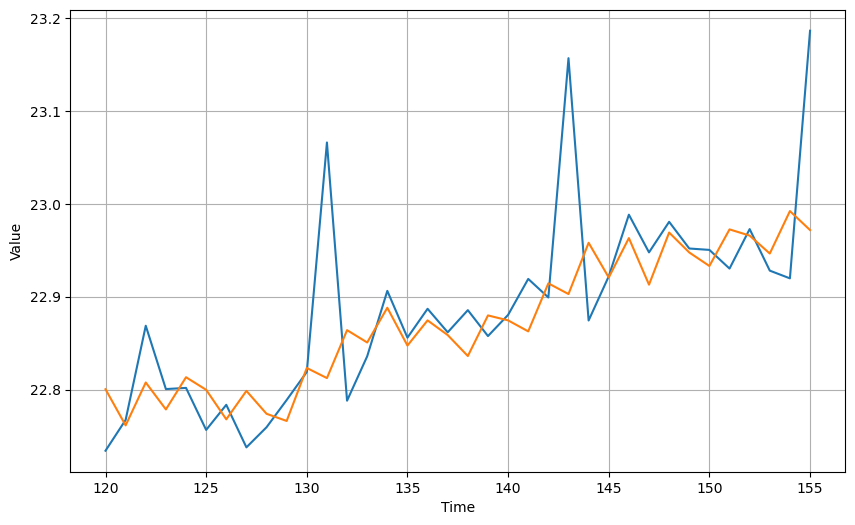

In [53]:
forecast = []
for time in range(156 - window_size):     # 2022年12月のデータが取得できれば168に変更
  forecast.append(model.predict(series[time:time + window_size][np.newaxis]))

forecast = forecast[split_time-window_size:]
results = np.array(forecast)[:, 0, 0]


plt.figure(figsize=(10, 6))

plot_series(time_valid, x_valid)
plot_series(time_valid, results)

In [54]:
print('MAPE:')
print(mean_absolute_percentage_error(x_valid, results))

MAPE:
0.0019951738046799995


In [55]:
from keras_tuner.tuners import RandomSearch 

In [56]:
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

def build_model(hp):
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Dense(units=hp.Int('units', min_value=10, max_value=30, step=2), activation='relu', input_shape=[window_size]))
  model.add(tf.keras.layers.Dense(10, activation='relu'))
  model.add(tf.keras.layers.Dense(1))

  model.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(hp.Choice('momentum', values=[.9, .7, .5, .3]), lr=1e-5))
  return model

tuner = RandomSearch(build_model, objective='loss', max_trials=50, executions_per_trial=3, directory='my_dir', project_name='hello')

tuner.search_space_summary()

tuner.search(dataset, epochs=1000, verbose=0)

/Users/nishiyamashoutou/opt/anaconda3/envs/grad_project/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Search space summary
Default search space size: 2
units (Int)
{'default': None, 'conditions': [], 'min_value': 10, 'max_value': 30, 'step': 2, 'sampling': None}
momentum (Choice)
{'default': 0.9, 'conditions': [], 'values': [0.9, 0.7, 0.5, 0.3], 'ordered': True}
INFO:tensorflow:Oracle triggered exit


In [57]:
tuner.results_summary()

Results summary
Results in my_dir/hello
Showing 10 best trials
Trial summary
Hyperparameters:
units: 24
momentum: 0.5
Score: 0.008171911972264448
Trial summary
Hyperparameters:
units: 16
momentum: 0.3
Score: 0.008759410430987677
Trial summary
Hyperparameters:
units: 24
momentum: 0.9
Score: 0.009824156140287718
Trial summary
Hyperparameters:
units: 14
momentum: 0.5
Score: 0.010007166614135107
Trial summary
Hyperparameters:
units: 20
momentum: 0.7
Score: 0.010141938924789429
Trial summary
Hyperparameters:
units: 18
momentum: 0.5
Score: 0.010154220896462599
Trial summary
Hyperparameters:
units: 12
momentum: 0.7
Score: 0.010242541631062826
Trial summary
Hyperparameters:
units: 30
momentum: 0.7
Score: 0.010326795900861422
Trial summary
Hyperparameters:
units: 14
momentum: 0.9
Score: 0.010361750920613607
Trial summary
Hyperparameters:
units: 28
momentum: 0.3
Score: 0.010960543528199196


In [58]:
models = tuner.get_best_models(num_models=4)
print(models)

[<keras.engine.sequential.Sequential object at 0x7f8d41a931c0>, <keras.engine.sequential.Sequential object at 0x7f8d2517e790>, <keras.engine.sequential.Sequential object at 0x7f8d230b5340>, <keras.engine.sequential.Sequential object at 0x7f8d238d2310>]


In [59]:
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

def build_model(hp):
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Dense(units=hp.Int('units', min_value=10, max_value=30, step=2), activation='relu', input_shape=[window_size]))
  model.add(tf.keras.layers.Dense(units=hp.Int('units', min_value=10, max_value=30, step=2), activation='relu'))
  model.add(tf.keras.layers.Dense(units=hp.Int('units', min_value=10, max_value=30, step=2), activation='relu'))

  model.compile(loss="mape", optimizer=tf.keras.optimizers.SGD(hp.Choice('momentum', values=[.9, .7, .5, .3]), lr=1e-5))
  return model

tuner = RandomSearch(build_model, objective='loss', max_trials=50, executions_per_trial=3, directory='my_dir', project_name='hello')

tuner.search_space_summary()

tuner.search(dataset, epochs=100, verbose=0)

Search space summary
Default search space size: 2
units (Int)
{'default': None, 'conditions': [], 'min_value': 10, 'max_value': 30, 'step': 2, 'sampling': None}
momentum (Choice)
{'default': 0.9, 'conditions': [], 'values': [0.9, 0.7, 0.5, 0.3], 'ordered': True}



KeyboardInterrupt



In [60]:
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)


model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(24, input_shape=[window_size], activation="relu"), 
    tf.keras.layers.Dense(10, activation="relu"), 
    tf.keras.layers.Dense(1)
])

model.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(lr=1e-6, momentum=0.5))
model.fit(dataset,epochs=5000,verbose=1)

Epoch 1/5000
4/4 [==============================] - 0s 6ms/step - loss: 59.7591
Epoch 2/5000
4/4 [==============================] - 0s 2ms/step - loss: 42.1189
Epoch 3/5000
4/4 [==============================] - 0s 2ms/step - loss: 27.7692
Epoch 4/5000
4/4 [==============================] - 0s 3ms/step - loss: 18.0795
Epoch 5/5000
4/4 [==============================] - 0s 2ms/step - loss: 11.7255
Epoch 6/5000
4/4 [==============================] - 0s 2ms/step - loss: 7.5733
Epoch 7/5000
4/4 [==============================] - 0s 3ms/step - loss: 4.8591
Epoch 8/5000
4/4 [==============================] - 0s 2ms/step - loss: 3.1110
Epoch 9/5000
4/4 [==============================] - 0s 3ms/step - loss: 1.9871
Epoch 10/5000
4/4 [==============================] - 0s 2ms/step - loss: 1.2710
Epoch 11/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.8095
Epoch 12/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.5150
Epoch 13/5000
4/4 [=========================

4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 104/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 105/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0218
Epoch 106/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0219
Epoch 107/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0218
Epoch 108/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0219
Epoch 109/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0218
Epoch 110/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 111/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0220
Epoch 112/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0219
Epoch 113/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0219
Epoch 114/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0219
Epoch 115/5000
4/4 [=======================

4/4 [==============================] - 0s 2ms/step - loss: 0.0220
Epoch 205/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0219
Epoch 206/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0219
Epoch 207/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0219
Epoch 208/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0219
Epoch 209/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 210/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0218
Epoch 211/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0219
Epoch 212/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0218
Epoch 213/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0218
Epoch 214/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 215/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0219
Epoch 216/5000
4/4 [=======================

4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 306/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0219
Epoch 307/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 308/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 309/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 310/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 311/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.0218
Epoch 312/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0219
Epoch 313/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 314/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0218
Epoch 315/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0219
Epoch 316/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0220
Epoch 317/5000
4/4 [=======================

4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 407/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0219
Epoch 408/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0219
Epoch 409/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0219
Epoch 410/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0220
Epoch 411/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0220
Epoch 412/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0220
Epoch 413/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 414/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 415/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 416/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0218
Epoch 417/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 418/5000
4/4 [=======================

4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 508/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 509/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 510/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 511/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0219
Epoch 512/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 513/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0218
Epoch 514/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 515/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0218
Epoch 516/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 517/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0218
Epoch 518/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 519/5000
4/4 [=======================

4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 609/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 610/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0219
Epoch 611/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 612/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0218
Epoch 613/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 614/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0219
Epoch 615/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 616/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0218
Epoch 617/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0220
Epoch 618/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0220
Epoch 619/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0219
Epoch 620/5000
4/4 [=======================

4/4 [==============================] - 0s 3ms/step - loss: 0.0219
Epoch 710/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 711/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 712/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 713/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 714/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0218
Epoch 715/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0220
Epoch 716/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0218
Epoch 717/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 718/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 719/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0218
Epoch 720/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 721/5000
4/4 [=======================

4/4 [==============================] - 0s 2ms/step - loss: 0.0221
Epoch 811/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0221
Epoch 812/5000
4/4 [==============================] - 0s 5ms/step - loss: 0.0219
Epoch 813/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 814/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0219
Epoch 815/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.0219
Epoch 816/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 817/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0218
Epoch 818/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 819/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0219
Epoch 820/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 821/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0219
Epoch 822/5000
4/4 [=======================

4/4 [==============================] - 0s 2ms/step - loss: 0.0219
Epoch 912/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0220
Epoch 913/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0219
Epoch 914/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0219
Epoch 915/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 916/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 917/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0219
Epoch 918/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 919/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0218
Epoch 920/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0218
Epoch 921/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0218
Epoch 922/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0218
Epoch 923/5000
4/4 [=======================

4/4 [==============================] - 0s 3ms/step - loss: 0.0219
Epoch 1013/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 1014/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0219
Epoch 1015/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 1016/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0218
Epoch 1017/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0219
Epoch 1018/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0221
Epoch 1019/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0219
Epoch 1020/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0220
Epoch 1021/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0219
Epoch 1022/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0218
Epoch 1023/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 1024/5000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 1113/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.0218
Epoch 1114/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 1115/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0218
Epoch 1116/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 1117/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0218
Epoch 1118/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0218
Epoch 1119/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0220
Epoch 1120/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0218
Epoch 1121/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0218
Epoch 1122/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0219
Epoch 1123/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 1124/5000
4/4 [===========

4/4 [==============================] - 0s 3ms/step - loss: 0.0218
Epoch 1213/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0218
Epoch 1214/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 1215/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 1216/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 1217/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 1218/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0218
Epoch 1219/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0218
Epoch 1220/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0219
Epoch 1221/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0218
Epoch 1222/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0219
Epoch 1223/5000
4/4 [==============================] - 0s 5ms/step - loss: 0.0219
Epoch 1224/5000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 0.0219
Epoch 1313/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0218
Epoch 1314/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 1315/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0218
Epoch 1316/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0219
Epoch 1317/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0219
Epoch 1318/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0218
Epoch 1319/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0218
Epoch 1320/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0219
Epoch 1321/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0218
Epoch 1322/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 1323/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0219
Epoch 1324/5000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 1413/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0218
Epoch 1414/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0218
Epoch 1415/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0218
Epoch 1416/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0218
Epoch 1417/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 1418/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0218
Epoch 1419/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0218
Epoch 1420/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0219
Epoch 1421/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 1422/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 1423/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0218
Epoch 1424/5000
4/4 [===========

4/4 [==============================] - 0s 3ms/step - loss: 0.0218
Epoch 1513/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0219
Epoch 1514/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 1515/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 1516/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 1517/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 1518/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 1519/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0218
Epoch 1520/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 1521/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 1522/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 1523/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0218
Epoch 1524/5000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 1613/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 1614/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 1615/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 1616/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0219
Epoch 1617/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0218
Epoch 1618/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 1619/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 1620/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0219
Epoch 1621/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0219
Epoch 1622/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 1623/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0220
Epoch 1624/5000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 0.0219
Epoch 1713/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 1714/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 1715/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 1716/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 1717/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 1718/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0219
Epoch 1719/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0222
Epoch 1720/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0220
Epoch 1721/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0219
Epoch 1722/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0219
Epoch 1723/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0220
Epoch 1724/5000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 1813/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0219
Epoch 1814/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 1815/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 1816/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 1817/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 1818/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 1819/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 1820/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 1821/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 1822/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 1823/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 1824/5000
4/4 [===========

4/4 [==============================] - 0s 1ms/step - loss: 0.0219
Epoch 1913/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0217
Epoch 1914/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 1915/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0218
Epoch 1916/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0218
Epoch 1917/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 1918/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 1919/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0219
Epoch 1920/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 1921/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 1922/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 1923/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 1924/5000
4/4 [===========

4/4 [==============================] - 0s 3ms/step - loss: 0.0218
Epoch 2013/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 2014/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 2015/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0220
Epoch 2016/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0219
Epoch 2017/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0219
Epoch 2018/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 2019/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 2020/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0218
Epoch 2021/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 2022/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 2023/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 2024/5000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 2113/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0220
Epoch 2114/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0219
Epoch 2115/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 2116/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0217
Epoch 2117/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 2118/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0219
Epoch 2119/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0220
Epoch 2120/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0220
Epoch 2121/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0219
Epoch 2122/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0220
Epoch 2123/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 2124/5000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 0.0219
Epoch 2213/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 2214/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 2215/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0217
Epoch 2216/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 2217/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 2218/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 2219/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 2220/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0217
Epoch 2221/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 2222/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 2223/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 2224/5000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 2313/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 2314/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0217
Epoch 2315/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0218
Epoch 2316/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 2317/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 2318/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 2319/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0218
Epoch 2320/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0218
Epoch 2321/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 2322/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0219
Epoch 2323/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0220
Epoch 2324/5000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 2413/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0217
Epoch 2414/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0218
Epoch 2415/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 2416/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 2417/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 2418/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 2419/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 2420/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 2421/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0217
Epoch 2422/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 2423/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0220
Epoch 2424/5000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 2513/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 2514/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 2515/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 2516/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 2517/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0219
Epoch 2518/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0219
Epoch 2519/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 2520/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 2521/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0218
Epoch 2522/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0217
Epoch 2523/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0217
Epoch 2524/5000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 0.0217
Epoch 2613/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.0219
Epoch 2614/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0219
Epoch 2615/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0219
Epoch 2616/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0219
Epoch 2617/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0220
Epoch 2618/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0220
Epoch 2619/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0220
Epoch 2620/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0219
Epoch 2621/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0220
Epoch 2622/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 2623/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.0217
Epoch 2624/5000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 2713/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 2714/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 2715/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0219
Epoch 2716/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 2717/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 2718/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 2719/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 2720/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 2721/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0217
Epoch 2722/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0218
Epoch 2723/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0217
Epoch 2724/5000
4/4 [===========

4/4 [==============================] - 0s 1ms/step - loss: 0.0218
Epoch 2813/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0218
Epoch 2814/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0217
Epoch 2815/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0218
Epoch 2816/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0218
Epoch 2817/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0218
Epoch 2818/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0217
Epoch 2819/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 2820/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0217
Epoch 2821/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0218
Epoch 2822/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 2823/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.0218
Epoch 2824/5000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 2913/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 2914/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 2915/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0217
Epoch 2916/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 2917/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0218
Epoch 2918/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0217
Epoch 2919/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0218
Epoch 2920/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 2921/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0218
Epoch 2922/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0217
Epoch 2923/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 2924/5000
4/4 [===========

4/4 [==============================] - 0s 1ms/step - loss: 0.0217
Epoch 3013/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0218
Epoch 3014/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0217
Epoch 3015/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0218
Epoch 3016/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0218
Epoch 3017/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0217
Epoch 3018/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0217
Epoch 3019/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0218
Epoch 3020/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0218
Epoch 3021/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0218
Epoch 3022/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0217
Epoch 3023/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0218
Epoch 3024/5000
4/4 [===========

4/4 [==============================] - 0s 1ms/step - loss: 0.0218
Epoch 3113/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0219
Epoch 3114/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0217
Epoch 3115/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0217
Epoch 3116/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0217
Epoch 3117/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0217
Epoch 3118/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0219
Epoch 3119/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0217
Epoch 3120/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0218
Epoch 3121/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0219
Epoch 3122/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0217
Epoch 3123/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0217
Epoch 3124/5000
4/4 [===========

4/4 [==============================] - 0s 1ms/step - loss: 0.0217
Epoch 3213/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0218
Epoch 3214/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0217
Epoch 3215/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0218
Epoch 3216/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0217
Epoch 3217/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0217
Epoch 3218/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0219
Epoch 3219/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0218
Epoch 3220/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 3221/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 3222/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0217
Epoch 3223/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 3224/5000
4/4 [===========

4/4 [==============================] - 0s 1ms/step - loss: 0.0218
Epoch 3313/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0217
Epoch 3314/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0217
Epoch 3315/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0217
Epoch 3316/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 3317/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 3318/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0217
Epoch 3319/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0217
Epoch 3320/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0217
Epoch 3321/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0218
Epoch 3322/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0217
Epoch 3323/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0219
Epoch 3324/5000
4/4 [===========

4/4 [==============================] - 0s 1ms/step - loss: 0.0218
Epoch 3413/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0218
Epoch 3414/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0218
Epoch 3415/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0218
Epoch 3416/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0218
Epoch 3417/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0218
Epoch 3418/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0218
Epoch 3419/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0218
Epoch 3420/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0217
Epoch 3421/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0217
Epoch 3422/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0217
Epoch 3423/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0217
Epoch 3424/5000
4/4 [===========

4/4 [==============================] - 0s 1ms/step - loss: 0.0218
Epoch 3513/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0218
Epoch 3514/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0218
Epoch 3515/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0218
Epoch 3516/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0218
Epoch 3517/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0219
Epoch 3518/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0218
Epoch 3519/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0217
Epoch 3520/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0218
Epoch 3521/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0218
Epoch 3522/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0217
Epoch 3523/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0219
Epoch 3524/5000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 3613/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0217
Epoch 3614/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 3615/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0217
Epoch 3616/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 3617/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 3618/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 3619/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0217
Epoch 3620/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 3621/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 3622/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 3623/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 3624/5000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 0.0217
Epoch 3713/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0217
Epoch 3714/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0217
Epoch 3715/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0217
Epoch 3716/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0218
Epoch 3717/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0217
Epoch 3718/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0217
Epoch 3719/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0218
Epoch 3720/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0217
Epoch 3721/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0217
Epoch 3722/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 3723/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0217
Epoch 3724/5000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 3813/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0217
Epoch 3814/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0217
Epoch 3815/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0217
Epoch 3816/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0217
Epoch 3817/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 3818/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 3819/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0219
Epoch 3820/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0221
Epoch 3821/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0220
Epoch 3822/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0220
Epoch 3823/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0217
Epoch 3824/5000
4/4 [===========

4/4 [==============================] - 0s 1ms/step - loss: 0.0218
Epoch 3913/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0217
Epoch 3914/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0217
Epoch 3915/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0217
Epoch 3916/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0218
Epoch 3917/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0220
Epoch 3918/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0217
Epoch 3919/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0217
Epoch 3920/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0217
Epoch 3921/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0217
Epoch 3922/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0217
Epoch 3923/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0217
Epoch 3924/5000
4/4 [===========

4/4 [==============================] - 0s 1ms/step - loss: 0.0218
Epoch 4013/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0218
Epoch 4014/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0217
Epoch 4015/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0217
Epoch 4016/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0218
Epoch 4017/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0218
Epoch 4018/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0217
Epoch 4019/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0218
Epoch 4020/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0217
Epoch 4021/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0218
Epoch 4022/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0218
Epoch 4023/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0217
Epoch 4024/5000
4/4 [===========

4/4 [==============================] - 0s 1ms/step - loss: 0.0217
Epoch 4113/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0218
Epoch 4114/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0217
Epoch 4115/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0218
Epoch 4116/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0217
Epoch 4117/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0217
Epoch 4118/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 4119/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 4120/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 4121/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 4122/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0217
Epoch 4123/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0217
Epoch 4124/5000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 0.0217
Epoch 4213/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0217
Epoch 4214/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0217
Epoch 4215/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0217
Epoch 4216/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 4217/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0219
Epoch 4218/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0221
Epoch 4219/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0221
Epoch 4220/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0219
Epoch 4221/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0219
Epoch 4222/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 4223/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0217
Epoch 4224/5000
4/4 [===========

4/4 [==============================] - 0s 1ms/step - loss: 0.0217
Epoch 4313/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0217
Epoch 4314/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0217
Epoch 4315/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0218
Epoch 4316/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0218
Epoch 4317/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0217
Epoch 4318/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0217
Epoch 4319/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0217
Epoch 4320/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0217
Epoch 4321/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0218
Epoch 4322/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0217
Epoch 4323/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0217
Epoch 4324/5000
4/4 [===========

4/4 [==============================] - 0s 3ms/step - loss: 0.0218
Epoch 4413/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0218
Epoch 4414/5000
4/4 [==============================] - 0s 6ms/step - loss: 0.0219
Epoch 4415/5000
4/4 [==============================] - 0s 10ms/step - loss: 0.0218
Epoch 4416/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.0217
Epoch 4417/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.0218
Epoch 4418/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 4419/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.0219
Epoch 4420/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0220
Epoch 4421/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0220
Epoch 4422/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0219
Epoch 4423/5000
4/4 [==============================] - 0s 39ms/step - loss: 0.0219
Epoch 4424/5000
4/4 [=========

Epoch 4512/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0217
Epoch 4513/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0217
Epoch 4514/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0217
Epoch 4515/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0217
Epoch 4516/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0217
Epoch 4517/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0218
Epoch 4518/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.0218
Epoch 4519/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0219
Epoch 4520/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.0218
Epoch 4521/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.0217
Epoch 4522/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0217
Epoch 4523/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0217
Epoch 4524/5000


4/4 [==============================] - 0s 1ms/step - loss: 0.0217
Epoch 4612/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 4613/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0217
Epoch 4614/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0217
Epoch 4615/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0217
Epoch 4616/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0217
Epoch 4617/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0217
Epoch 4618/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0217
Epoch 4619/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0217
Epoch 4620/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.0217
Epoch 4621/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0217
Epoch 4622/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0217
Epoch 4623/5000
4/4 [===========

4/4 [==============================] - 0s 3ms/step - loss: 0.0220
Epoch 4712/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0221
Epoch 4713/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0221
Epoch 4714/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0222
Epoch 4715/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0220
Epoch 4716/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0219
Epoch 4717/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0217
Epoch 4718/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0217
Epoch 4719/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0217
Epoch 4720/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0217
Epoch 4721/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0218
Epoch 4722/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0217
Epoch 4723/5000
4/4 [===========

4/4 [==============================] - 0s 1ms/step - loss: 0.0217
Epoch 4812/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0217
Epoch 4813/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0219
Epoch 4814/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0217
Epoch 4815/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0217
Epoch 4816/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0217
Epoch 4817/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0217
Epoch 4818/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0217
Epoch 4819/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 4820/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0217
Epoch 4821/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0217
Epoch 4822/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0217
Epoch 4823/5000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 0.0217
Epoch 4912/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0217
Epoch 4913/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0220
Epoch 4914/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0219
Epoch 4915/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0220
Epoch 4916/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0219
Epoch 4917/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0217
Epoch 4918/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0217
Epoch 4919/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0217
Epoch 4920/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 4921/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0217
Epoch 4922/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0217
Epoch 4923/5000
4/4 [===========

1/1 [==============================] - 0s 15ms/step


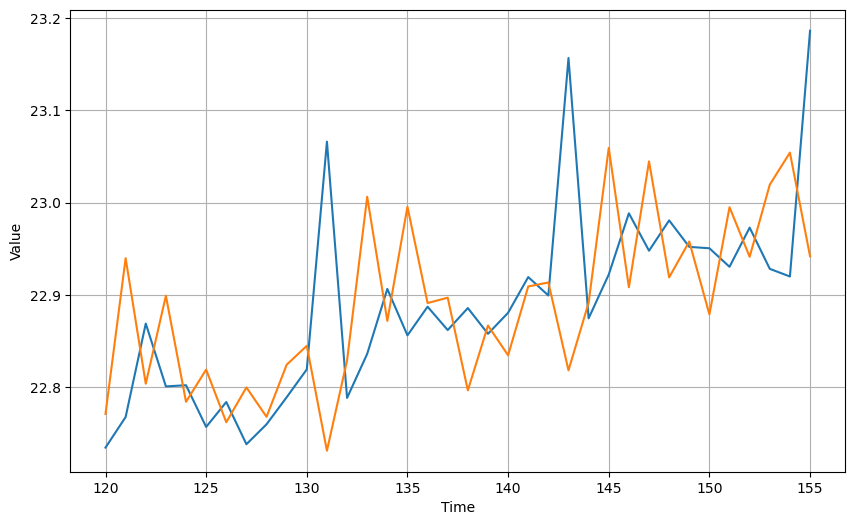

In [61]:
forecast = []
for time in range(156 - window_size):     # 2022年12月のデータが取得できれば168に変更
  forecast.append(model.predict(series[time:time + window_size][np.newaxis]))

forecast = forecast[split_time-window_size:]
results = np.array(forecast)[:, 0, 0]


plt.figure(figsize=(10, 6))

plot_series(time_valid, x_valid)
plot_series(time_valid, results)

In [62]:
print('MAPE:')
print(mean_absolute_percentage_error(x_valid, results))

MAPE:
0.0035223606297426382


In [63]:
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)


model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(24, input_shape=[window_size], activation="relu"), 
    tf.keras.layers.Dense(10, activation="relu"), 
    tf.keras.layers.Dense(1)
])

model.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(lr=1e-6, momentum=0.5))
model.fit(dataset,epochs=1000,verbose=1)

Epoch 1/1000


/Users/nishiyamashoutou/opt/anaconda3/envs/grad_project/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


4/4 [==============================] - 0s 8ms/step - loss: 780.2283
Epoch 2/1000
4/4 [==============================] - 0s 5ms/step - loss: 724.9969
Epoch 3/1000
4/4 [==============================] - 0s 8ms/step - loss: 688.9842
Epoch 4/1000
4/4 [==============================] - 0s 2ms/step - loss: 655.1139
Epoch 5/1000
4/4 [==============================] - 0s 4ms/step - loss: 624.4160
Epoch 6/1000
4/4 [==============================] - 0s 2ms/step - loss: 596.2846
Epoch 7/1000
4/4 [==============================] - 0s 2ms/step - loss: 570.3165
Epoch 8/1000
4/4 [==============================] - 0s 3ms/step - loss: 547.4076
Epoch 9/1000
4/4 [==============================] - 0s 2ms/step - loss: 525.8542
Epoch 10/1000
4/4 [==============================] - 0s 3ms/step - loss: 505.3438
Epoch 11/1000
4/4 [==============================] - 0s 3ms/step - loss: 485.7418
Epoch 12/1000
4/4 [==============================] - 0s 2ms/step - loss: 466.9494
Epoch 13/1000
4/4 [===================

4/4 [==============================] - 0s 1ms/step - loss: 0.0322
Epoch 103/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0292
Epoch 104/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0266
Epoch 105/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0242
Epoch 106/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0221
Epoch 107/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0205
Epoch 108/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0193
Epoch 109/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0180
Epoch 110/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0169
Epoch 111/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0162
Epoch 112/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0155
Epoch 113/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0149
Epoch 114/1000
4/4 [=======================

4/4 [==============================] - 0s 2ms/step - loss: 0.0102
Epoch 204/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0102
Epoch 205/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0102
Epoch 206/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0102
Epoch 207/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0102
Epoch 208/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0102
Epoch 209/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0102
Epoch 210/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0102
Epoch 211/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0102
Epoch 212/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0102
Epoch 213/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0102
Epoch 214/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0102
Epoch 215/1000
4/4 [=======================

4/4 [==============================] - 0s 2ms/step - loss: 0.0102
Epoch 305/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0102
Epoch 306/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0102
Epoch 307/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0102
Epoch 308/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0102
Epoch 309/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0102
Epoch 310/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0102
Epoch 311/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0102
Epoch 312/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0102
Epoch 313/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0102
Epoch 314/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0102
Epoch 315/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0102
Epoch 316/1000
4/4 [=======================

4/4 [==============================] - 0s 3ms/step - loss: 0.0102
Epoch 406/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0102
Epoch 407/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0102
Epoch 408/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0102
Epoch 409/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0102
Epoch 410/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0102
Epoch 411/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0102
Epoch 412/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0102
Epoch 413/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0102
Epoch 414/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0102
Epoch 415/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0102
Epoch 416/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0102
Epoch 417/1000
4/4 [=======================

4/4 [==============================] - 0s 2ms/step - loss: 0.0102
Epoch 507/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0102
Epoch 508/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0102
Epoch 509/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0102
Epoch 510/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0102
Epoch 511/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0102
Epoch 512/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0102
Epoch 513/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0102
Epoch 514/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0102
Epoch 515/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0102
Epoch 516/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0102
Epoch 517/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0102
Epoch 518/1000
4/4 [=======================

4/4 [==============================] - 0s 2ms/step - loss: 0.0102
Epoch 608/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0102
Epoch 609/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0102
Epoch 610/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0102
Epoch 611/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0102
Epoch 612/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0102
Epoch 613/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0102
Epoch 614/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0102
Epoch 615/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0102
Epoch 616/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0102
Epoch 617/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0102
Epoch 618/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0102
Epoch 619/1000
4/4 [=======================

4/4 [==============================] - 0s 3ms/step - loss: 0.0102
Epoch 709/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0102
Epoch 710/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0102
Epoch 711/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0102
Epoch 712/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0102
Epoch 713/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0102
Epoch 714/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0102
Epoch 715/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0102
Epoch 716/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0102
Epoch 717/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0102
Epoch 718/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0102
Epoch 719/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0102
Epoch 720/1000
4/4 [=======================

4/4 [==============================] - 0s 3ms/step - loss: 0.0102
Epoch 810/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0102
Epoch 811/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0102
Epoch 812/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0102
Epoch 813/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0102
Epoch 814/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0102
Epoch 815/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0102
Epoch 816/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0102
Epoch 817/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0102
Epoch 818/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0102
Epoch 819/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0102
Epoch 820/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0102
Epoch 821/1000
4/4 [=======================

4/4 [==============================] - 0s 1ms/step - loss: 0.0102
Epoch 911/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0102
Epoch 912/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0102
Epoch 913/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0102
Epoch 914/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0102
Epoch 915/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0102
Epoch 916/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0102
Epoch 917/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0102
Epoch 918/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0102
Epoch 919/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0102
Epoch 920/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0102
Epoch 921/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0102
Epoch 922/1000
4/4 [=======================

1/1 [==============================] - 0s 23ms/step


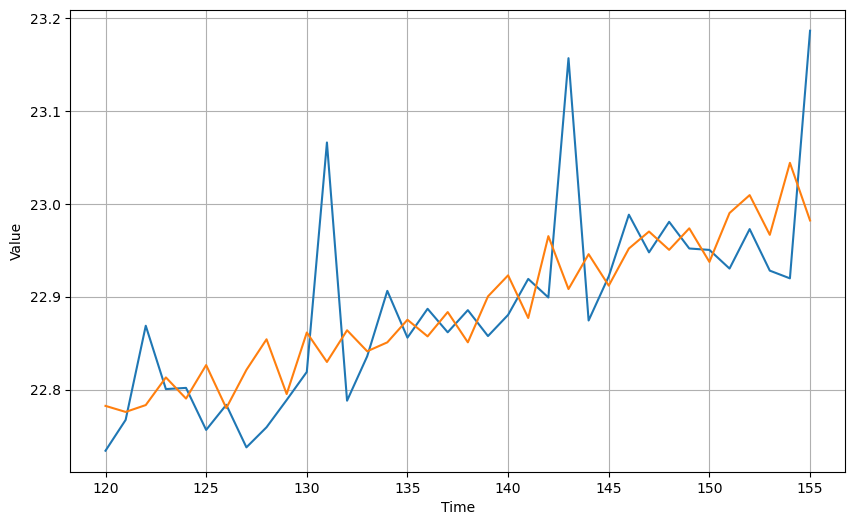

In [81]:
forecast = []
for time in range(156 - window_size):     # 2022年12月のデータが取得できれば168に変更
  forecast.append(model.predict(series[time:time + window_size][np.newaxis]))

# 学習データの期間の予測値
train_pred = np.array(forecast[:split_time-window_size])[:, 0, 0]
test_pred = np.array(forecast[split_time-window_size:])[:, 0, 0]

plt.figure(figsize=(10, 6))

plot_series(time_valid, x_valid)
plot_series(time_valid, test_pred)

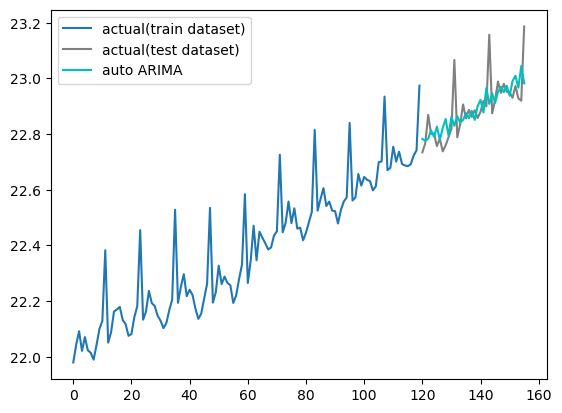

In [88]:
# グラフ化
fig, ax = plt.subplots()
ax.plot(time_train, x_train, label="actual(train dataset)")
ax.plot(time_valid, x_valid, label="actual(test dataset)", color="gray")
# ax.plot(time_train, train_pred, color="c")
ax.plot(time_valid, train_pred, label="auto ARIMA", color="c") 
# ax.fill_between(
#     df_log_test.index,
#     test_pred_ci[:, 0],
#     test_pred_ci[:, 1],
#     color='c',
#     alpha=.2)
ax.legend()